## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
dataset = pd.read_csv('articles.tsv', delimiter = '\t', quoting = 3, on_bad_lines='skip')

In [40]:
# dataset.head()
for index, row in dataset.iterrows():
    print(row["Content"])

China lax on overcapacity controls into 2019. China’s Ministry of Industry and Information Technology recently warned that the steel sector is facing illegal capacity from new unapproved mills and from those that were expected to be shut down in capacity swaps.A trend of growth in crude steelproduction.In the first eight months of 2019, China increased its production by 9.1pc to achieve 665mn mt. China’s crude steel production for August 2019 was 87.3mn mt, up 9.3pc compared to August 2018.The growing production trend continues from the previous yearwhenChina produced 928mn mt in 2018, up 6.6 percent from 2017.August represented a 5pc higher volume than the eight-month average. In annualized terms, without an expected monthly growth rateper remaining month, China’s forecasted crude steel production for 2019is 997mn mt, up 7pc from 2018.With the reasonable anticipated growth, production surpasses the 1bn mt threshold.Private sector growth adding supply side pressure in China.In its stat

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Cleaning the texts

In [9]:
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Content'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [35]:
# print(all_stopwords)

In [10]:
print(corpus)

['china lax overcapac control china ministri industri inform technolog recent warn steel sector face illeg capac new unapprov mill expect shut capac swap trend growth crude steelproduct first eight month china increas product pc achiev mn mt china crude steel product august mn mt pc compar august grow product trend continu previou yearwhenchina produc mn mt percent august repres pc higher volum eight month averag annual term without expect monthli growth ratep remain month china forecast crude steel product mn mt pc reason anticip growth product surpass bn mt threshold privat sector growth ad suppli side pressur china state effort curb excess capac pollut beij move consolid strategi countri top steelmak pc capac accord china iron steel associ cisa member mostli state own firm grew productionat pc non member surg pc china elimin mn mt steel capac small mill mn mt larger mill past four year illeg unmonitor capac could set back suppli side environment reform effort addit capac alreadyresu

In [12]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

In [ ]:
#Give our Rome corpus a variable name
# rome_corpus = df.lemmatized[10]

#Instantiate wordcloud object and use method to feed it our corpus
wc = WordCloud().generate_from_text(corpus)

#Use matplotlib.pyplot to display the fitted wordcloud
#Turn axis off to get rid of axis numbers
plt.imshow(wc)
plt.axis('off')
plt.show()

In [43]:
import collections
import pandas as pd
import matplotlib.pyplot as plt

# Read input file, note the encoding is specified here 
# It may be different in your text file
## file = open('PrideandPrejudice.txt', encoding="utf8")
#a= file.read()

a = 'This is a beautiful book written by some person who stays in pune'
# Stopwords
all_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
wordcount = {}

# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for index, row in dataset.iterrows():
    a = row["Content"]
    for word in a.lower().split():
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        if word not in all_stopwords:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
# Close the file
# file.close()
# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
df = pd.DataFrame(lst, columns = ['Word', 'Count'])
df.plot.bar(x='Word',y='Count')

How many most common words to print: 100000000

OK. The 100000000 most common words are as follows

prices :  45673
steel :  42131
index :  41516
scrap :  39731
cfr :  30040
davis :  25238
production :  24218
hms :  23187
demand :  22700
year :  19576
rose :  18608
domestic :  18254
mt :  18190
market :  18042
week :  17585
increased :  17117
1&2 :  16560
mills :  15340
delivered :  15229
(8020) :  15174
us :  14817
weekly :  14229
settled :  14140
also :  13902
copper :  13732
sales :  13419
2020 :  13105
iron :  13093
ferrous :  13040
prior :  12794
offers :  12393
company :  12154
last :  11527
daily :  11312
compared :  10918
india :  10102
ex-works :  9762
due :  9722
period :  9704
amid :  9549
new :  9468
fell :  9372
china :  8898
2021 :  8602
price :  8585
rebar :  8427
shredded :  8048
declined :  7887
month :  7870
according :  7840
supply :  7803
flat :  7437
2019 :  7433
increase :  7353
dropped :  7309
lme :  7292
export :  7285
imports :  7281
remained :  7247
del :  721

make :  795
six :  794
imposed :  793
africa :  792
nine :  791
aug :  791
corrective :  788
waiting :  788
revised :  787
dross :  787
remaining :  786
completed :  785
cast :  784
signed :  782
significantly :  781
2 :  781
need :  781
31 :  777
concluded :  777
mineral :  777
$1/mt :  777
maintenance :  775
terms :  774
12pc :  772
transaction :  770
release :  770
20pc :  769
tax :  768
q :  768
downward :  767
key :  767
issues :  766
supplies :  766
least :  766
starting :  763
rod :  762
light :  761
transportation :  759
pushed :  758
declining :  757
results :  757
gas :  757
return :  757
inclusive :  757
final :  756
sharp :  756
decided :  755
various :  753
alang :  753
6pc :  752
beginning :  751
downstream :  750
3 :  749
settling :  749
11pc :  748
angeles :  748
preceding :  743
toke :  743
cuts :  742
york :  742
resulted :  741
reduction :  741
ports :  741
keep :  740
ongoing :  738
green :  737
trends :  735
income :  731
pipe :  730
consumers :  730
located :  727

fridaythe :  313
arag :  313
$125/mt :  313
dumping :  312
benefit :  312
private :  312
continuous :  312
wide :  312
posco :  312
go :  312
fines :  312
softening :  311
fully :  311
rods :  311
real :  311
toyota :  311
advanced :  310
strengthening :  310
lowest :  310
flat-rolled :  310
contracted :  310
cycle :  310
france :  310
date :  309
budget :  309
possible :  309
bring :  308
labour :  308
installed :  307
allowed :  307
renewable :  307
2mn :  307
#3 :  307
emission :  306
kong :  306
hopes :  305
mar :  305
strike :  304
particularly :  304
state-owned :  303
larger :  303
intends :  303
capacities :  303
sync :  303
models :  303
capable :  303
run :  302
except :  301
specialty :  301
quarters :  301
levied :  301
doubled :  301
open :  301
fy :  301
4ani :  301
strict :  300
tariff :  299
border :  299
called :  299
alternative :  298
chilean :  298
softened :  298
liquidity :  297
annum :  297
41pc :  297
2017 :  296
$20/gt :  296
hoa :  296
ford :  296
infections :

asean :  173
serious :  173
year-end :  172
corresponding :  172
finalized :  172
automobiles :  172
jv :  172
loading :  172
enable :  172
50000mt :  172
wider :  172
shanghai :  172
73pc :  172
1¢/lb :  172
provides :  171
design :  171
(eaf) :  171
tubular :  171
options :  171
ten :  171
uses :  171
chinathe :  171
pradesh :  171
firm’s :  171
festive :  171
funds :  171
survey :  171
ground :  170
benefits :  170
extrusions :  170
wind :  170
civil :  170
clean :  170
brand :  170
collect :  170
vedanta :  170
sustain :  170
landed :  170
varied :  170
auction :  169
feedstock :  169
developments :  169
toward :  169
clearly :  169
northeast :  169
$16/mt :  169
slabs :  169
replacement :  169
low-carbon :  169
component :  169
$435/mt :  169
08¢/lb :  169
actions :  168
solar :  168
ltd :  168
winning :  168
original :  168
$18/mt :  168
daysthe :  168
nodular :  168
($3/mt) :  168
71pc :  167
besides :  167
paused :  167
cumulative :  167
dhaka :  167
contractthe :  167
struggle

buses :  102
se :  102
rs37000/mt :  102
ft :  101
outages :  101
reductions :  101
ternium :  101
euro :  101
2014 :  101
layoffs :  101
32mn :  101
strips :  101
amidst :  101
widen :  101
baosteel :  101
russia's :  101
x :  101
stocked :  101
a4131 :  101
19¢/lb :  101
mxn50/mt :  101
cny20/mt :  101
payable :  100
alabama :  100
responsible :  100
pulling :  100
200 :  100
users :  100
33mn :  100
112pc :  100
code :  100
injury :  100
1100 :  100
rejected :  100
explore :  100
brands :  100
difference :  100
grupo :  100
330 :  100
409/410 :  100
viable :  100
bounces :  100
january-june :  100
course :  99
accelerate :  99
spend :  99
year's :  99
106pc :  99
expensive :  99
putting :  99
bringing :  99
warehouses :  99
rs35000/mt :  99
technological :  99
ferronickel :  99
weighing :  99
farm :  99
$10-20/gt :  99
$240/mt :  99
recommended :  99
underway :  98
staff :  98
transformation :  98
abundant :  98
+ :  98
productsthe :  98
portion :  98
shot :  98
quantum :  98
concre

panama :  68
investigations :  68
third-largest :  68
respondents :  68
143pc :  68
(april :  68
opposed :  68
worst :  68
fueled :  68
bus :  68
environmentally :  68
2020-21 :  68
scaling :  68
ninth :  68
olympic :  68
126pc :  68
jan-july :  68
upgrading :  68
cap :  68
(rinl) :  68
mega :  68
bluescope :  68
8000mt :  68
boundary :  68
weeka :  68
bulgaria :  68
mmg :  68
outputs :  68
eurofer :  68
leverage :  68
45000mt :  68
($10/mt) :  68
($2/mt) :  68
tolgoi :  68
dealerships :  68
mou :  68
rs21000/mt :  68
scrapping :  68
nearing :  68
pandemic-related :  68
$390/mt :  68
mid-may :  68
fallstrading :  68
rs45000/mt :  68
$545-550/mt :  68
variance :  67
failure :  67
bodies :  67
vital :  67
conclude :  67
amounts :  67
difficulty :  67
mid-october :  67
specifications :  67
involves :  67
austria :  67
rashtriya :  67
105mn :  67
tankers :  67
hardly :  67
$40/gt :  67
123pc :  67
(e3) :  67
busy :  67
(955) :  67
$37/mt :  67
slide :  67
finally :  67
$325-330/mt :  67
$2

bulks :  51
venezuela :  51
tuesday(€1 :  51
diverged :  51
(drc) :  51
$468/mt :  51
inclined :  51
ippi :  51
rs45800/mt :  51
rs45500/mt :  51
1bn :  50
2020according :  50
otherwise :  50
weighted-average :  50
micro :  50
191pc :  50
400000 :  50
engineered :  50
evaluating :  50
stoppages :  50
didn’t :  50
panels :  50
numerous :  50
normalized :  50
materialsthe :  50
arcelormittal’s :  50
comprise :  50
van :  50
generating :  50
appliance :  50
polish :  50
127mn :  50
argentina’s :  50
186pc :  50
52mn :  50
continent :  50
written :  50
organisation :  50
certificate :  50
uk's :  50
106mn :  50
($14/mt) :  50
jpy25000/mt :  50
154pc :  50
covering :  50
grade) :  50
junethe :  50
defence :  50
promoting :  50
shougang :  50
consortium :  50
ensuring :  50
zhejiang :  50
initiate :  50
instruct :  50
lump :  50
173pc :  50
conventional :  50
33000mt :  50
godawari :  50
operator :  50
drives :  50
accumulated :  50
$298/mt :  50
24the :  50
rs2250/mt :  50
151pc :  50
$38/m

181pc :  39
chi :  39
29the :  39
jpy24000/mt :  39
developers :  39
dockin :  39
179mn :  39
respectivelydemand :  39
kakula :  39
14the :  39
$42/mt :  39
storm :  39
weeksouth :  39
sellers’ :  39
17000mt :  39
virtually :  39
shapiro :  39
things :  39
$22/gt :  39
214pc :  39
customized :  39
trains :  39
try80/mt :  39
unloading :  39
rs32800/mt :  39
$43/mt :  39
julythe :  39
onto :  39
e40 :  39
steel-consuming :  39
amara :  39
galvanizer :  39
shipmentthe :  39
qatar :  39
us-sourced :  39
algoma :  39
geely :  39
holidayfor :  39
$393/mt :  39
interpipe :  39
$452/mt :  39
jpy47000/mt :  39
jpy49500/mt :  39
manufacturers' :  38
threatened :  38
document :  38
batches :  38
auctions :  38
continental :  38
(ahmsa) :  38
filling :  38
laws :  38
pradhan :  38
laying :  38
68mn :  38
hudbay :  38
(except :  38
constrained :  38
(wbms) :  38
outputthe :  38
aggregate :  38
flexible :  38
launching :  38
etc :  38
carbon-free :  38
participate :  38
2030the :  38
goes :  38
h :

countered :  31
branch :  31
steel-producing :  31
69mn :  31
high-tech :  31
task :  31
gwangyang :  31
hole :  31
atlas :  31
grants :  31
aligned :  31
subjected :  31
lenders :  31
exercised :  31
2the :  31
alro :  31
zambian :  31
mounting :  31
imbalance :  31
57000mt :  31
jamshedpur :  31
$272/mt :  31
318pc :  31
timelines :  31
surges :  31
211pc :  31
they’re :  31
chance :  31
applying :  31
unexpected :  31
stepping :  31
candy :  31
store :  31
$249/mt :  31
sliding :  31
refractory :  31
firmthe :  31
re-rollable :  31
foils :  31
explored :  31
coatings :  31
chris :  31
31the :  31
$2200/mt :  31
cancellations :  31
($46/mt) :  31
rs33300/mt :  31
coast-origin :  31
bdt1000-1500/mt :  31
220000mt :  31
hazira :  31
gadkari :  31
$875/mt :  31
hyundai’s :  31
cast/tense :  31
$257/mt :  31
papua :  31
weda :  31
28000mt :  31
$160/mt :  31
(dgtr) :  31
hiatus :  31
aa :  31
rs1667/mt :  31
krw2500/mt :  31
motor’s :  31
weekprices :  31
30-40pc :  31
arrivals :  31
cos

rmpi :  26
rs37700/mt :  26
rs37600/mt :  26
twd600/mt :  26
post-diwali :  26
rs36100/mt :  26
$490-500/mt :  26
$476/mt :  26
rs42700/mt :  26
$441/mt :  26
$575-580/mt :  26
ci-gi :  26
chinasubcontinentthe :  26
rs42400/mt :  26
rs43300/mt :  26
$527/mt :  26
saar :  26
cfrspot :  26
brine :  26
coast’s :  26
diameter) :  26
140mn :  25
inquiry :  25
(icsg) :  25
approximate :  25
collapsed :  25
globallythe :  25
snow :  25
blocked :  25
eagle :  25
prospective :  25
executives :  25
$68/mt :  25
forgings :  25
union’s :  25
extruders :  25
160 :  25
taconite :  25
$12mn :  25
violations :  25
provision :  25
columbus :  25
supplement :  25
$240/gt :  25
nameplate :  25
gases :  25
exemptions :  25
think :  25
dues :  25
23000mt :  25
shores :  25
mopani :  25
integrating :  25
vedanta's :  25
manages :  25
all-electric :  25
harmful :  25
glass :  25
italy's :  25
producer's :  25
eyes :  25
$26bn :  25
valuable :  25
honda's :  25
segmentthe :  25
fundamental :  25
269pc :  25
a

delong :  21
rushed :  21
$67/mt :  21
accessible :  21
commencing :  21
earliest :  21
mandates :  21
299mn :  21
instructions :  21
samples :  21
porphyry :  21
connected :  21
rs1500-2000/mt :  21
encounter :  21
apr-dec :  21
december’s :  21
taiyuan :  21
$5mn :  21
rita :  21
january’s :  21
verdict :  21
klang :  21
russiathe :  21
egyptian :  21
mining's :  21
relating :  21
cranes :  21
relining :  21
transparency :  21
expense :  21
shell :  21
copper-silver :  21
drilled :  21
centinela :  21
$329/mt :  21
$131/mt :  21
$129/mt :  21
rs125/mt :  21
birch/cliff :  21
h1h2 :  21
$319/mt :  21
nickelthe :  21
$231/mt :  21
$229/mt :  21
highlighting :  21
rs20200/mt :  21
magnitogorsk :  21
guangzhou :  21
stabilization :  21
crunchthe :  21
rs32100/mt :  21
russia-based :  21
weeklme :  21
weeksecondary :  21
($28/mt) :  21
pricingthe :  21
gauging :  21
72000mt :  21
sizeable :  21
mid-2021 :  21
pine :  21
periodcopper :  21
le :  21
revamping :  21
($35/mt) :  21
376pc :  2

sharing :  18
battery-powered :  18
vertically :  18
award :  18
wrapping :  18
8000 :  18
lives :  18
uninterrupted :  18
drying :  18
tsusho :  18
jobsthe :  18
dramatic :  18
(cbsa) :  18
responses :  18
cooperate :  18
kerala :  18
2003 :  18
rsi :  18
divestment :  18
zenith :  18
shrink :  18
melted :  18
ssangyong :  18
cutsthe :  18
judge :  18
forth :  18
dos :  18
sur :  18
292mn :  18
201mn :  18
publicly :  18
producers' :  18
happy :  18
$10bn :  18
corporation’s :  18
hitachi :  18
jpy30000/mt :  18
brocal :  18
monday’s :  18
non-binding :  18
petrochemical :  18
independence :  18
dragon :  18
425pc :  18
magnetite :  18
elimination :  18
periodindia :  18
(ega) :  18
pieces :  18
periodchina :  18
313mn :  18
auxiliary :  18
252mn :  18
segment’s :  18
jan-dec :  18
294mn :  18
undeveloped :  18
outskirts :  18
rs146000/mt :  18
chromite :  18
ben :  18
2020global :  18
completes :  18
kps :  18
situations :  18
posco's :  18
engaging :  18
kitimat :  18
atalaya :  18


264mn :  16
calculation :  16
$262/lb :  16
sbq :  16
disappointed :  16
ferrosilicon :  16
maybe :  16
289mn :  16
teesside :  16
connections :  16
€100mn :  16
anglo-australian :  16
5-7pc :  16
$84/mt :  16
€210/mt :  16
€218/mt :  16
lion :  16
realize :  16
industries’ :  16
weekus :  16
psm :  16
campaigns :  16
$422/mt :  16
8020 :  16
216000mt :  16
£170/mt :  16
rs75/mt :  16
ruble :  16
rs110000/mt :  16
$1200/mt :  16
$850/mt :  16
full-fledged :  16
aging :  16
useful :  16
137000mt :  16
426pc :  16
2¢ :  16
penetration :  16
yeariron :  16
hierro :  16
jamaica :  16
osaka :  16
$239/gt :  16
galvanising :  16
3d :  16
thompson :  16
baltimore :  16
fukuyama :  16
weekmills :  16
granulated :  16
hpa :  16
2028 :  16
84000mt :  16
allegedly :  16
weakthe :  16
$213/mt :  16
rs85000/mt :  16
koreain :  16
rs20100/mt :  16
yearof :  16
pricesturkish :  16
half-year :  16
seathe :  16
anm :  16
chart :  16
assembling :  16
ann :  16
rs106000/mt :  16
regiona :  16
noticeably 

topalian :  14
sell-off :  14
variables :  14
conversations :  14
$223/gt :  14
fighting :  14
0pc :  14
weektraders :  14
yielded :  14
feralpi :  14
duferco :  14
platosa :  14
garnered :  14
rs25/mt :  14
needing :  14
anecdotal :  14
$900mn :  14
$350-360/mt :  14
causes :  14
northwards :  14
gobingarh :  14
$146/gt :  14
influx :  14
70-80pc :  14
(rsi) :  14
$367/mt :  14
enters :  14
rs22250/mt :  14
$283-285/mt :  14
401pc :  14
151000mt :  14
ministerial :  14
haulage :  14
billiton’s :  14
578pc :  14
salem :  14
austenitic :  14
€203/mt :  14
403pc :  14
conveyed :  14
$116/lb :  14
5200mt :  14
tries :  14
utilising :  14
110 :  14
2019copper :  14
stagnated :  14
20ft :  14
bmw’s :  14
accessing :  14
thb50/mt :  14
revives :  14
€22/mt :  14
406mn :  14
$227/mt :  14
107000mt :  14
restructured :  14
notwithstanding :  14
daniel :  14
kaiser’s :  14
century’s :  14
cherepovets :  14
feeds :  14
caribou :  14
184000mt :  14
e-mobility :  14
411pc :  14
103000mt :  14
baos

kiruna :  13
bdt500/mtthe :  13
warnings :  13
zimbabwe :  13
stalemate :  13
$1950/mt :  13
naveena :  13
schnitzer’s :  13
des :  13
rs91000/mt :  13
tostatistical :  13
ingotthe :  13
post-covid :  13
rs29550/mt :  13
1000/mt :  13
pricesas :  13
refractories :  13
mxn70/mt :  13
$238/gt :  13
bulgarian :  13
rs25150/mt :  13
chattograma :  13
pkr300/mt :  13
rs25850/mt :  13
marketrussian :  13
jpy5000-6000/mt :  13
discrepancy :  13
licensed :  13
alexey :  13
rs30250/mt :  13
1950/60 :  13
province's :  13
rs27450/mt :  13
spirit :  13
conic :  13
goyal :  13
zamak#5 :  13
july’s :  13
q1fy2021 :  13
hiking :  13
jan-apr :  13
usasubscriber :  13
rhi :  13
stahl) :  13
($667/mt) :  13
barges :  13
2030/40 :  13
13800/13900 :  13
14400 :  13
($866/mt) :  13
827¢/lb :  13
fridaydemand :  13
rs120000/mt :  13
pkr300-500/mt :  13
474pc :  13
rs28400/mt :  13
pre-booked :  13
prasad :  13
2020q2 :  13
($671/mt) :  13
apparently :  13
q1fy21 :  13
$293-295/mt :  13
218mn :  13
($350/mt

infectionsthe :  12
2020($1 :  12
millsdemand :  12
$563/mt :  12
406pc :  12
($137/mt) :  12
($410/mt) :  12
($544/mt) :  12
‘as :  12
$1815/mt :  12
rs24300/mt :  12
module :  12
fans :  12
€13/mt :  12
pkr3250/mt :  12
$144/mt :  12
($679/mt) :  12
three-fold :  12
protesting :  12
earth-i :  12
cliff’s :  12
motorized :  12
surfacing :  12
611pc :  12
canyon :  12
$352/mt :  12
severstal's :  12
expectedthe :  12
($477/mt) :  12
subsector :  12
juan :  12
processor’s :  12
813¢/lb :  12
pkr1750/mt :  12
436pc :  12
gathering :  12
warming :  12
jpy34500/mt :  12
five-fold :  12
precipitate :  12
redirect :  12
indexesthe :  12
bdt1000-2000/mt :  12
catarina :  12
late-november :  12
sangan :  12
rub1500/mt :  12
449pc :  12
salta :  12
$376/mt :  12
($1=myr4)indiaimported :  12
$325/gt :  12
82-85pc :  12
pkr2750/mt :  12
$42375/mt :  12
try50-100/mt :  12
€323/mt :  12
tuesdaychinain :  12
$354/gt :  12
($613/mt) :  12
salesdomestic :  12
($41/mt) :  12
monthexports :  12
€330/mt 

buyer’s :  11
$308/lb :  11
consumermill :  11
cny160/mt :  11
streamlined :  11
bekaert :  11
export-grade :  11
everett :  11
iabr :  11
rs164000/mt :  11
($430/mt) :  11
sharethe :  11
guinean :  11
khodro's :  11
824pc :  11
friday's :  11
2020-mar :  11
(imidro)in :  11
rs26400/mt :  11
faded :  11
ex-alangyard :  11
april-sept :  11
2021china :  11
fy21) :  11
$405/lb :  11
marketprices :  11
vendor :  11
re-enter :  11
weekpellet :  11
prior; :  11
(vw) :  11
rcep :  11
differing :  11
$1978/mt :  11
$417/mt :  11
mid-jan :  11
wednesday($1 :  11
assemble :  11
‘recycled :  11
pkr114500-115000/mt :  11
$20455/mt :  11
anglo-swiss :  11
nagle :  11
$571/mt :  11
antwerp :  11
$351/gt :  11
$399/gt :  11
$379/mt :  11
spotted :  11
$650-680/mt :  11
april-nov :  11
parabolic :  11
early-december :  11
dayspellet :  11
bamin :  11
€328/mt :  11
late-december :  11
servicios :  11
mxn8400/mt :  11
post-new :  11
replicate :  11
ex-southern :  11
garden :  11
pkr86000-86500/mt :  11


pricesindian :  10
britain’s :  10
liftin :  10
$187/mt :  10
763¢/lb :  10
$7/mtthe :  10
shipmentin :  10
cool-off :  10
ganesh :  10
kipushi :  10
bengaluru :  10
$088/mt :  10
723¢/lb :  10
7306 :  10
unlocking :  10
non-alloyed :  10
early-august :  10
(lsm) :  10
226000mt :  10
mesa :  10
perceived :  10
monthon :  10
bdt50500-51000/mt :  10
500pc :  10
789pc :  10
journal :  10
rs24100/mt :  10
capsules :  10
renewing :  10
bike :  10
$164/mt :  10
$109/mt :  10
488000mt :  10
164000mt :  10
$382/mt :  10
612pc :  10
try30-50/mt :  10
(usw) :  10
donawitz :  10
ninth-largest :  10
levelin :  10
occupied :  10
chinapakistan :  10
($40/mt) :  10
instrumental :  10
tres :  10
papomono :  10
18500mt :  10
mxn87/mt :  10
cny4300/mt :  10
kolosori :  10
cny4380/mt :  10
($641/mt) :  10
kharif :  10
(trq) :  10
769pc :  10
ecore :  10
$314/lb :  10
townsville :  10
early-april :  10
($34/mt) :  10
outreach :  10
16-month :  10
$274/gt :  10
$1781/mt :  10
(ibge) :  10
855¢/lb :  10
22)

demand($1 :  9
154 :  9
likewise :  9
$177/gt :  9
bonab :  9
cbic :  9
near-zero :  9
corsa :  9
stainless’ :  9
003¢/lb :  9
154000mt :  9
ferndale :  9
non-operating :  9
tertiary :  9
$375-385/mt :  9
1615mn :  9
rollers :  9
4-6 :  9
$25250/mt :  9
12th :  9
14bn :  9
two-tenths :  9
819¢/lb :  9
077pc :  9
escalate :  9
grace :  9
rs917/mt :  9
abilities :  9
293000mt :  9
quad :  9
unfulfilled :  9
£5-8/mt :  9
$043/mt :  9
129¢/lb :  9
2019of :  9
(chalco) :  9
675mn :  9
£500mn :  9
115¢/lb :  9
004¢/lb :  9
segmentsthe :  9
3/y :  9
$59bn :  9
performancein :  9
$132/mt :  9
336000mt :  9
yearas :  9
16500mt :  9
8500mt :  9
533¢/lb :  9
12500/12600 :  9
(hisar) :  9
rs7572) :  9
rs29250/mt :  9
thailand-based :  9
$102mn :  9
country&rsquo;s :  9
(anfia) :  9
ouro :  9
branco :  9
measurement :  9
rid :  9
commended :  9
$3150/mt :  9
$209/gt :  9
springboard :  9
$257/gt :  9
$34/gt :  9
may-end :  9
msa :  9
carval :  9
527mn :  9
broadly :  9
republicans :  9
1997 :  9
qu

996mn :  8
datafinished :  8
nt) :  8
abolition :  8
rs95000/mt :  8
rs29650/mt :  8
nudge :  8
cny2600/mt :  8
rs22750/mt :  8
437mn :  8
sparse :  8
$27250/mt :  8
lee :  8
$123/lb :  8
165¢/lb :  8
tailing :  8
degrussa :  8
639pc :  8
highest-grade :  8
$119/lb :  8
($629/mt) :  8
dedusting :  8
$5-8/mt :  8
$286-287/mt :  8
usaccording :  8
867pc :  8
quartersales :  8
£175/mt :  8
bozymchak :  8
takersthe :  8
advice :  8
bruno :  8
maire :  8
$132mn :  8
377mn :  8
359mn :  8
599pc :  8
190pc :  8
nuagaon :  8
rs22350/mt :  8
friday($1= :  8
try1730/mt :  8
try1620/mt :  8
rub600/mt :  8
weeksmarket :  8
(oesa) :  8
$340mn :  8
province’s :  8
£13/mt :  8
ukthe :  8
vnd6000000/mt :  8
($73/mt) :  8
($420/mt) :  8
$103bn :  8
$145/gt :  8
$118/lb :  8
krakow :  8
january's :  8
regionmarket :  8
3a :  8
construction-grade :  8
arrest :  8
market($1 :  8
regionon :  8
$79bn :  8
weekhyundai :  8
lead-zinc :  8
rs7500/mt :  8
179000 :  8
898mn :  8
$76bn :  8
single-digit :  8
465¢

766¢/lb :  8
mxn46/mt :  8
mxn142/mt :  8
mxn58/mt :  8
demandindian :  8
(q235b) :  8
lygend :  8
$5350/mt :  8
$142/lb :  8
$408/lb :  8
setouchi :  8
jpy10bn :  8
$256/gt :  8
$298/gt :  8
($9-18/mt) :  8
built-up) :  8
098pc :  8
both-well :  8
uptrendthe :  8
€16bn :  8
803¢/lb :  8
(jan-oct :  8
pressurizing :  8
$412/lb :  8
electrify :  8
shevelev :  8
$413/lb :  8
28-month :  8
pkr113000-113500/mt :  8
reverberations :  8
jpy36500/mt :  8
rs1834/mt :  8
bdt2250/mt :  8
content) :  8
materialon :  8
annealed :  8
c$44bn :  8
cleaned :  8
$430-450/ldt :  8
separator :  8
€35/mt :  8
$360-380/gt :  8
$333/gt :  8
jpy38000/mt :  8
bets :  8
agosales :  8
supplyscrap :  8
ex-yardsin :  8
$2054/mt :  8
€313/mt :  8
eleven-month :  8
667¢/lb :  8
($707/mt) :  8
hpal :  8
$371/gt :  8
c$46bn :  8
marketssubcontinentthe :  8
$2240/mt :  8
omanin :  8
sundance :  8
cny4850/mt :  8
pkr6500/mt :  8
riseon :  8
nevada-based :  8
rs47200/mt :  8
(kobelco) :  8
$363/gt :  8
$356/gt :  8
$365

unified :  7
furnace’s :  7
$15-25/gt :  7
economy’s :  7
$102/gt :  7
digesting :  7
2050/70trading :  7
141 :  7
mature :  7
bentley :  7
rs18850/mt :  7
€14/mt :  7
wouldn’t :  7
systematically :  7
4¢ :  7
$1638/mt :  7
126¢/lb :  7
equinox :  7
1550 :  7
226 :  7
mid-term :  7
$1845/mt :  7
$181/mt :  7
828mn :  7
instruction :  7
$1607/mt :  7
compulsory :  7
tagged :  7
periodaluminium :  7
sestao :  7
visits :  7
143000mt :  7
threading :  7
cristian :  7
emergencies :  7
nickel's :  7
($520/mt) :  7
marketcolakoglu :  7
cancelling :  7
segregation :  7
cutifani :  7
roadways :  7
braking :  7
rs197000/mt :  7
rs179000/mt :  7
dockside(€1 :  7
yu :  7
hermosillo :  7
unfortunately :  7
h12020 :  7
(dmf) :  7
554 :  7
073pc :  7
382¢/lb :  7
114 :  7
exceptions :  7
laos :  7
dahej :  7
normalises :  7
pertinent :  7
cashthe :  7
repeal :  7
522pc :  7
$186/mt :  7
correction/reconsolidation :  7
10500/10600 :  7
10000trading :  7
blackouts :  7
pkr67250/mt :  7
renegotiate :  7

pkr112500-113000/mt :  7
khyber :  7
us-asia :  7
chargers :  7
try5000/mt :  7
rs5250/mt :  7
motheo :  7
$657/mt :  7
jpy2250/mt :  7
rejections :  7
563¢/lb :  7
swelled :  7
vp :  7
$430-440/ldt :  7
442mn :  7
bdt59500-60000/mt :  7
pkr2250/mt :  7
(australian :  7
us-headquartered :  7
958¢/lb :  7
rosatom :  7
reefer :  7
($106/mt) :  7
$347/lb :  7
(aisi)citing :  7
$352/gt :  7
2022a :  7
truss :  7
quartertotal :  7
€19/mt :  7
€24/mt :  7
2025in :  7
mxn7800/mt :  7
rs32750/mt :  7
($49659/mt) :  7
$1495/lb :  7
july-december :  7
(jsea) :  7
$044/mt :  7
€343/mt :  7
affiliated :  7
megasteel :  7
previous-year :  7
stausholm :  7
768¢/lb :  7
chromeni :  7
410mn :  7
$46125/mt :  7
chevy :  7
75000ntcompared :  7
twd1000/mt :  7
respectivelyvietnamthe :  7
marketsoffers :  7
$1102/mt :  7
€338/mt :  7
$299/gt :  7
outletsthe :  7
strains :  7
(statcan)residential :  7
kim :  7
pkr4000-5000/mt :  7
rs53500/mt :  7
pkr105000-106000/mt :  7
945 :  7
$100 :  7
bdt66000-67000/m

pricesdavis :  6
retracted :  6
echeng :  6
siltara :  6
mid-marchthe :  6
shevahms :  6
bdt28500/mt :  6
barranquilla :  6
lobby :  6
inclusions :  6
(hpa) :  6
optical :  6
marketable :  6
dingolfing :  6
rolls-royce :  6
rs140000/mt :  6
5in :  6
vulcanization :  6
$2138/mt :  6
548mn :  6
($15bn) :  6
ganua :  6
productionon :  6
producersin :  6
consumera :  6
rs21750/mt :  6
rs31650/mt :  6
320pc :  6
agosouth :  6
€28/mt :  6
computers :  6
phones :  6
device :  6
nondefense :  6
$276/lb :  6
gasthe :  6
$132bn :  6
(sln) :  6
$15tn :  6
drift :  6
blog :  6
feat :  6
$217/lb :  6
$153/gt :  6
$154/gt :  6
643¢/lb :  6
corani :  6
$138bn :  6
$197/mt :  6
topmost :  6
521000mt :  6
15-2mn :  6
cilegon :  6
provincein :  6
modernised :  6
pushthe :  6
ware :  6
€23/mt :  6
€240/mt :  6
(cpec) :  6
reliefs :  6
periodat :  6
reducedthe :  6
218000mt :  6
fortescue's :  6
$259mn :  6
433¢/lb :  6
650000nt :  6
037pc :  6
rs2666/mt :  6
ago($1= :  6
(asml) :  6
mid-2019 :  6
product

favorite :  6
72000nt :  6
6070/90 :  6
1735/55 :  6
aheadzincthe :  6
low-volume :  6
electro-welded :  6
($93/mt) :  6
rs4833/mt :  6
rainsthe :  6
4700mt :  6
locks :  6
ste :  6
millcon :  6
milltrading :  6
chattogramindian :  6
alternativesthe :  6
rs1084/mt :  6
cwhe :  6
deepen :  6
monthwest :  6
domesticus :  6
mediation :  6
rs751) :  6
powerful :  6
609pc :  6
higher-quality :  6
cleveland-cliffs’ :  6
ohiothe :  6
norfolk :  6
498¢/lb :  6
bargain :  6
yearregionally :  6
6630 :  6
6630/6740 :  6
2130/40 :  6
2450leadthe :  6
1690/1710 :  6
rs5400/mt :  6
6-7¢/lb :  6
462mn :  6
rs310000/mt :  6
placein :  6
expansive :  6
074pc :  6
respectivelysales :  6
$163/lb :  6
onboard :  6
$28465/mt :  6
california’s :  6
$750mn :  6
899pc :  6
sequencing :  6
improvementthe :  6
uk/ :  6
divergent :  6
pvt :  6
judicial :  6
productsbrazil’s :  6
023pc :  6
bubble :  6
779mn :  6
parking :  6
twd50/mt :  6
rs2375/mt :  6
(about :  6
745 :  6
$1267/lb :  6
product's :  6
divisiont

($44669/mt) :  6
unsuitable :  6
favoring :  6
fridaybajio :  6
£275/mt :  6
scrapferrous :  6
jpy62500/mt :  6
piracicaba :  6
hd :  6
bdt500/mtfor :  6
($453/mt) :  6
week(€1=$118) :  6
ft5 :  6
$365-395/gt :  6
$391/gt :  6
vw's :  6
57000mtturkish :  6
mxn138/mt :  6
microchips :  6
pohangdemand :  6
(imai) :  6
dike :  6
ffs :  6
bdt250/mtthe :  6
cny6000/mt :  6
krw565000/mt :  6
777s :  6
metalics' :  6
capacitor :  6
€21-23/mt :  6
ast :  6
79000nt :  6
3mm :  6
pathway :  6
dap :  6
sibanye-stillwater :  6
sandouville :  6
($45139/mt) :  6
$46348/mt :  6
under-invoicing :  6
955-965pc :  6
ever-increasing :  6
mxn234/mt :  6
deviated :  6
fmc :  6
(aisi)shipments :  6
$340-365/gt :  6
marketscrap :  6
$19650/mt :  6
(indec)the :  6
coilq235b63300q355b64600wide :  6
$2413/mt :  6
smelter/refined :  6
hombre :  6
productsmost :  6
($1346/mt) :  6
moldova :  6
$54125/mt :  6
krw550000/mt :  6
$45050/mt :  6
group14 :  6
tekna :  6
millennial :  6
wasdown :  6
scrapcanada :  6
$52

abrasion-resistant :  5
129000nt :  5
67000nt :  5
786pc :  5
66000nt :  5
1112mn :  5
expiring :  5
2020other :  5
longyan :  5
dee :  5
$700-720/mt :  5
$347-350/mt :  5
crush :  5
top-tier :  5
madeira :  5
equip :  5
yunhai :  5
hui :  5
2310mt :  5
planks :  5
importsimports :  5
dagang :  5
conditioning :  5
241 :  5
$314-315/mt :  5
cfrno :  5
non-copper :  5
tightenedthe :  5
$223/lb :  5
spiraling :  5
stationsthe :  5
hadeed :  5
minecopper :  5
howeverthe :  5
$1663/mt :  5
($83/mt) :  5
ralph :  5
spencer :  5
$295-296/mt :  5
(based :  5
high-volume :  5
productionincreased :  5
unrelated :  5
rs15000 :  5
respectivelytotal :  5
rs105000/mt :  5
mainstream :  5
nt$50/mt :  5
$2002/mt :  5
braces :  5
$112/gt :  5
breakup :  5
rs725/mt :  5
rs7324) :  5
ltfv :  5
$9/mtthe :  5
28bn :  5
wednesdayfor :  5
outliers :  5
lead’s :  5
tradingsome :  5
$2587/lb :  5
showroom :  5
(germany) :  5
$660-680/mt :  5
rs700-1000/mt :  5
tianzhu :  5
injectors :  5
nucor-jfe :  5
50000t 

pkr500-800/mt :  5
ntd6900/mt :  5
cfrmost :  5
ripe :  5
$1192/lb :  5
17400silvershort- :  5
2040the :  5
rs5000-6000/mt :  5
deepened :  5
jpy2500-3000/mt :  5
jpy500-1500/mt :  5
kyusyu :  5
indexheard :  5
slightlythe :  5
$09/mt :  5
$02/mt :  5
$270-273/mt :  5
valueas :  5
mem :  5
centaurus :  5
carajás :  5
materialdemand :  5
489¢/lb :  5
$1614/mt :  5
racks :  5
(pbt) :  5
(march-june) :  5
95-96pc :  5
2161mn :  5
988pc :  5
3722 :  5
continuedthe :  5
687¢/lb :  5
achieves :  5
embracing :  5
mannerthe :  5
japanon :  5
jpy6000/mt :  5
nifty :  5
bagging :  5
pkr71000-71300/mt :  5
taiwanfeng :  5
tarapur :  5
fridayone :  5
mxn115/mt :  5
627000mt :  5
574000mt :  5
‘atmanirbhar :  5
blowing :  5
fundamentalsthe :  5
€3500 :  5
rub15200/mt :  5
reusing :  5
499 :  5
2000/10 :  5
$650mn :  5
673pc :  5
2019h1 :  5
785pc :  5
renove :  5
394000mt :  5
frontier :  5
$2048/mt :  5
pallets :  5
$176/gt :  5
$670mn :  5
argon :  5
offloading :  5
rs7502) :  5
($555/mt) :  5
pk

peru-based :  5
10) :  5
day’ :  5
jakob :  5
$78485/mt :  5
sub-brands :  5
$384/lb :  5
434mn :  5
rate) :  5
($13-16/mt) :  5
portadc :  5
supplysteel :  5
75000 :  5
worker’s :  5
mxn8100/mt :  5
mxn8175/mt :  5
serena :  5
sanmenxia :  5
($899/mt) :  5
up' :  5
($966/mt) :  5
rs198000/mt :  5
ao :  5
try5630-5680/mt :  5
144¢/lb :  5
tristan :  5
defaulted :  5
872pc :  5
containers’ :  5
($458/mt) :  5
bdt53000-54000/mt :  5
$1475/lb :  5
$336/gt :  5
(smmt)in :  5
($578/mt) :  5
692¢/lb :  5
gonvarri :  5
233¢/lb :  5
912¢/lb :  5
$492/lb :  5
mxn10000/mt :  5
mxn212/mt :  5
celsius :  5
large-volume :  5
tradesdomestic :  5
pkr81500-82000/mt :  5
$585-595/mt :  5
indiasubcontinentthe :  5
2021although :  5
($4-8/mt) :  5
romeo :  5
blockages :  5
labeled :  5
$47625/mt :  5
$485-500/mt :  5
cflp :  5
488 :  5
november's :  5
rebardomestic :  5
pkr125500/mt :  5
pkr86500/mt :  5
phd :  5
$430-450/mt :  5
rs7305) :  5
$1038/lb :  5
$365/lb :  5
mxn8600/mt :  5
mxn8650/mt :  5
hol

waigaoqiao :  4
shenanda :  4
haigang :  4
452559mt :  4
108103mt :  4
2017-18 :  4
rs10 :  4
rishi :  4
lays :  4
groupis :  4
(us$ :  4
350000 :  4
furnish :  4
101489mt :  4
971mn :  4
kong’s :  4
884pc :  4
844pc :  4
575000mt :  4
pim :  4
1821mn :  4
6am :  4
demandfew :  4
karnataka's :  4
chitradurga :  4
($131bn) :  4
contender :  4
minister's :  4
2303mn :  4
81000 :  4
chinaas :  4
questionnaire :  4
cbsa’s :  4
yeargermany :  4
fuselage :  4
2021these :  4
senator :  4
april- :  4
spinning :  4
jpy7000-8000/mt :  4
kokkola :  4
three-day :  4
002pc :  4
truecore :  4
co-products :  4
shijiazhuang :  4
bureauin :  4
three-tier :  4
6balco :  4
$1749/mt :  4
$17555/mt :  4
mayindia :  4
c02 :  4
modelthe :  4
environmentin :  4
china-bound :  4
indiaindia :  4
restated :  4
saleshowever :  4
($94mn) :  4
fangyuan :  4
1855mn :  4
762mn :  4
775mn :  4
indexus :  4
accusations :  4
story :  4
cfrfor :  4
austriathe :  4
orb :  4
henrik :  4
gesture :  4
demonstrations :  4
$47

electroplating :  4
$1015/mt :  4
($138/mt) :  4
acerinox's :  4
377000mt :  4
$12250/mt :  4
banner :  4
2020hrc :  4
economy” :  4
limping :  4
102bn :  4
67bn :  4
oal :  4
carsales :  4
rabi :  4
changemaruti :  4
rand :  4
505000mt :  4
rs166/mt :  4
rs2875/mt :  4
fridaylme :  4
rs177500/mt :  4
ghana's :  4
rs114000/mt :  4
associationsteel :  4
semi-finish :  4
yardsin :  4
crippled :  4
speth :  4
respectivelypurchase :  4
$275-277/mt :  4
management’s :  4
february's :  4
reservesthe :  4
themthe :  4
014pc :  4
raging :  4
ind-ra’s :  4
loaders :  4
3200mt :  4
6900mt :  4
uncertainthe :  4
$818/mt :  4
exportssouth :  4
$394bn :  4
jagdalpur :  4
($1367/mt) :  4
indemnity :  4
treasury’s :  4
mm’s :  4
subduedin :  4
rs20050/mt :  4
liquor :  4
heeding :  4
darren :  4
assignments :  4
nascent :  4
ayear :  4
284¢/lb :  4
$218/lb :  4
aura :  4
agreement’s :  4
(punjab) :  4
steel($1 :  4
rs475/mt :  4
vietnama :  4
tendering :  4
cole :  4
24-hour :  4
intrinsic :  4
quinl

demise :  4
($485-529/mt) :  4
€68mn :  4
manageable :  4
upa :  4
non-metallurgical :  4
suburbs :  4
interestdemand :  4
marginallythe :  4
recyclex’s :  4
rudow :  4
thursdayafter :  4
nueva :  4
presidente :  4
gavin :  4
newsom :  4
€21bn :  4
$243/mtfas :  4
11600/11700trading :  4
undeterred :  4
656000mt :  4
onslaught :  4
ugly :  4
anyone’s :  4
902mn :  4
homebuyers :  4
ignition :  4
monthmills :  4
upmills :  4
€3-10/mt :  4
spainthe :  4
139mt :  4
action” :  4
374 :  4
3191the :  4
reserve's :  4
mxn5275/mt :  4
rationalize :  4
importsapr-20apr-19% :  4
eleven’s :  4
rs18600/mt :  4
122000 :  4
competitionthe :  4
733000mt :  4
108862mt :  4
pandemicmoreover :  4
themcolakoglu :  4
try1745/mt :  4
frtp :  4
$003/mt :  4
terracom :  4
539¢/lb :  4
€800mn :  4
flsmidth :  4
long-lasting :  4
527pc :  4
basetrading :  4
economyaccording :  4
901pc :  4
marketfor :  4
seenthe :  4
($45075/mt) :  4
rs7565) :  4
($231/mt) :  4
inoperative :  4
rs17150/mt :  4
rs17800/mt :  4


torches :  4
66500mt :  4
$2299/mt :  4
55200mt :  4
119)us :  4
donkuk :  4
fridaypakistanimported :  4
$9-10/mt :  4
countryturkish :  4
cfrusthe :  4
contenders :  4
yoyq1 :  4
mommaruti :  4
rs21bn :  4
($141bn) :  4
tonnagethe :  4
binzhou :  4
wu'an :  4
indiaa :  4
twd14200/mt :  4
petrol-powered :  4
incomethe :  4
rub525/mt :  4
1284mn :  4
two-phase :  4
isolated :  4
vikas :  4
q2fy2020 :  4
rs1950/mt :  4
rs8750/mt :  4
rs11800/mt :  4
830mn :  4
cny69; :  4
myr42 :  4
rs700 :  4
$1100/mt :  4
rs36950/mt :  4
index($1= :  4
try80-90/mt :  4
(aas) :  4
comparisonon :  4
493¢/lb :  4
164¢/lb :  4
settlementssome :  4
$1303/lb :  4
millshigher :  4
$1870/mt :  4
aozhan :  4
ropes :  4
3567pc :  4
coat :  4
non-coil :  4
486 :  4
alava :  4
30km :  4
multi-pollutant :  4
tangsteel :  4
flouting :  4
non-conforming :  4
ex-alangshortage :  4
ex-alangas :  4
strongin :  4
qasimdemand :  4
garner :  4
quicken :  4
copper-rich :  4
capricorn :  4
949217mt :  4
€600mn :  4
non-compe

rulings :  4
millschina :  4
three-folds :  4
799pc :  4
rs3800/mt :  4
ascent :  4
game-changer :  4
(acarom)in :  4
uptrendin :  4
112200mt :  4
$1494/lb :  4
rub15bn :  4
agglomerate :  4
958mn :  4
primobius :  4
flatter :  4
2019nickelglobal :  4
deliverable :  4
attitude :  4
078pc :  4
878¢/lb :  4
$357/lb :  4
$200-1000/container :  4
weeklarge :  4
bdt42500-43000/mt :  4
year-end($1= :  4
962¢/lb :  4
less-than-fair :  4
miralga :  4
walking-beam :  4
7400 :  4
$119)uk :  4
deliveriesoffers :  4
sanabad :  4
exploratory :  4
four-day :  4
pico :  4
cobalt-free :  4
myr70/mt :  4
23some :  4
$1488/lb :  4
usagethe :  4
dumps :  4
$255-260/gt :  4
$3625/mt :  4
$365-367/mt :  4
portmexico :  4
622¢/lb :  4
949¢/lb :  4
lengthen :  4
mxn7250/mt :  4
guido :  4
offersoffer :  4
buyersindonesiaindonesian :  4
salespellet :  4
$34995/mt :  4
binh :  4
vtpl :  4
chile-origin :  4
$2107/mt :  4
routesin :  4
recruit :  4
turkstat :  4
$119)us :  4
2499mn :  4
ikco's :  4
janet :  4
ye

$970-980/mt :  4
pkr115500-116000/mt :  4
rs7411) :  4
rs166250/mt :  4
2400/mt :  4
post-labour :  4
$158/lb :  4
eating :  4
deliveredsan :  4
$99595/mt :  4
bdt62000-62500/mt :  4
taiwanwith :  4
sheikh :  4
datatotal :  4
normalthe :  4
$162bn :  4
spanish-bound :  4
c$2bn :  4
c$63bn :  4
c$47bn :  4
bureau's :  4
$122bn :  4
ttsi :  4
$2476/mt :  4
trid :  4
psc :  4
weekfrom :  4
$975-980/mt :  4
1251 :  4
haniel :  4
levelus :  4
try7000/mt :  4
coastlines :  4
celebrationsin :  4
rub750/mt :  4
jpy48830/mt :  4
$5373/mt :  4
$550/ldt :  4
raipuron :  4
($50/mt) :  4
vnd500000/mt :  4
basis(£1=$141) :  4
€367/mt :  4
€372/mt :  4
belize :  4
jpy70bn :  4
try7140/mt :  4
fy2020its :  4
$14-18/mt :  4
bdt5000-6000/mt :  4
jpy4250/mt :  4
2021compared :  4
toulouse :  4
$456/lb :  4
racking :  4
$505mn :  4
yoysouth :  4
10km :  4
$10546/mt :  4
$515-$520/mt :  4
€37-43/mt :  4
vladivostok :  4
arco :  4
bbrg :  4
947pc :  4
$652/mt :  4
99% :  4
domicile :  4
mxn61/mt :  4
317 : 

020mn :  3
018mn :  3
co-generation :  3
auto-grade :  3
quadricycle :  3
407mn :  3
90-100 :  3
$101mn :  3
spokeswoman :  3
stressors :  3
135bn :  3
report's :  3
reinforces :  3
minimized :  3
polls :  3
polled :  3
project—which :  3
garcia :  3
hidalgo :  3
879000mt :  3
chiho :  3
170000nt; :  3
59000nt; :  3
39000nt :  3
maimón :  3
2007the :  3
falconbridge :  3
$749mn :  3
syncline :  3
conductors :  3
secret :  3
grosvenor :  3
$584mn :  3
typhoons :  3
(75mn :  3
productsus :  3
long-delayed :  3
mandal :  3
asbestos :  3
flammable :  3
ecopro :  3
manufacturersauto :  3
mahindramahindra :  3
($488/mt) :  3
$17495/mt :  3
2234 :  3
1094pc :  3
conarc :  3
yearother :  3
27a :  3
disturbance :  3
reintroduce :  3
alacero’s :  3
inferring :  3
respectivelyrecently :  3
single-site :  3
steelcrude :  3
saldhana :  3
jobsin :  3
five-week :  3
turbulent :  3
incidentthe :  3
pence :  3
(165mn :  3
arabia’s :  3
mt- :  3
laranjeiras :  3
dam’s :  3
149000t :  3
122000t :  3
doze

a413 :  3
$272/lb :  3
santi :  3
(ztz) :  3
processors’ :  3
$12760/mt :  3
bowen :  3
771pc :  3
non-steel :  3
sarda's :  3
19100mt :  3
scrapchina’s :  3
hiroshima :  3
rs4100/mt :  3
rs5850/mt :  3
pricesalloy :  3
odisha's :  3
10755pc :  3
rs10250/mt :  3
rs10400/mt :  3
term($1 :  3
$237bn :  3
long- :  3
chlorine :  3
try25/mt :  3
mondaymarkets :  3
$26750/mt :  3
cfr; :  3
orizaba :  3
resigning :  3
(118mn :  3
$12850/mt :  3
1878mn :  3
877mn :  3
talent :  3
atthe :  3
innorth :  3
tolower :  3
energyin :  3
uaein :  3
productionindia’s :  3
hubei’s :  3
diagnosed :  3
£172/mt :  3
rs130000 :  3
nt$7400/mt :  3
krw257500/mt :  3
($258/mt) :  3
cny2575/mt :  3
nationals :  3
rs21775/mt :  3
rs7124) :  3
russia) :  3
kazzinc :  3
48-day :  3
productioncar :  3
$412bn :  3
4pcthe :  3
$404bn :  3
$12800/mt :  3
$2585/lb :  3
respectivelyzinc :  3
outbreak’s :  3
$2212/mt :  3
indio :  3
developmentthis :  3
pauw :  3
countrydespite :  3
extenuating :  3
4a :  3
basket :  3
c

raffmetal :  3
emails :  3
mtcopper :  3
1317pc :  3
404¢/lb :  3
377¢/lb :  3
houston’s :  3
chiapa :  3
resolute :  3
above-average :  3
49000t :  3
$273bn :  3
speaker :  3
818mn :  3
asma :  3
829 :  3
boarding :  3
sends :  3
near-full :  3
pulse :  3
diplomatic :  3
$1415/mt :  3
stabilisethe :  3
rs7506) :  3
gobindgarhall :  3
1986pc :  3
2386mt :  3
1952 :  3
necessitate :  3
monthsome :  3
receivedthe :  3
wsp :  3
contractors’ :  3
658 :  3
458 :  3
738 :  3
areaat :  3
thursdayprocessor :  3
($37bn) :  3
2019all :  3
449000mt :  3
freed :  3
pci :  3
1169mn :  3
bratsk :  3
oilfield :  3
251 :  3
$1463/lb :  3
goldstein :  3
workin :  3
homeland :  3
breath :  3
beingzincintermediate- :  3
1440/60 :  3
1379mn :  3
274000mt :  3
($065/mt) :  3
rub13750/mt :  3
activity($1 :  3
instituting :  3
marcos :  3
faraco :  3
apparatus :  3
1433mn :  3
decline) :  3
peruin :  3
831pc :  3
864pc :  3
respectively; :  3
ebtida :  3
4350/70 :  3
covid-19a :  3
5450 :  3
earlierprices : 

(and :  3
occupancy :  3
15% :  3
step-by-step :  3
70% :  3
mindset :  3
40% :  3
daytime :  3
&amp;amp; :  3
democrats :  3
($183/mt) :  3
try1740/mt :  3
$059/mt :  3
mondaysteel :  3
55700 :  3
carscarmakers :  3
goncalveschairman :  3
jpy120bn :  3
by$59/mtfrom :  3
7market :  3
polyethylene :  3
$709mn :  3
aprila :  3
94000nt :  3
monthsmarket :  3
tells :  3
2019nexa :  3
1046pc :  3
corus :  3
8039pc :  3
37400mt :  3
1599mn :  3
465mt :  3
diu :  3
fridaytraders :  3
chargesin :  3
£3-5/mt :  3
firms’ :  3
exhausting :  3
($1525/mt) :  3
speak :  3
economy($1= :  3
£188/mt :  3
raska :  3
€13mn :  3
to€200/mtdelivered :  3
graduallythe :  3
eurobattery :  3
nickel-cobalt-copper :  3
finlandunder :  3
fab :  3
409¢/lb :  3
$12275/mt :  3
€110mn :  3
yeardue :  3
€76mn :  3
projectionsthe :  3
year(c$1 :  3
$2275/lb :  3
surrounds :  3
400mm :  3
rub12bn :  3
1913mn :  3
1466mn :  3
194 :  3
042mn :  3
stirring :  3
($201/mt) :  3
rs272000/mt :  3
categorization :  3
(alacero)r

prosser :  3
iai’s :  3
$2067/mt :  3
248¢/lb :  3
186¢/lb :  3
westcompared :  3
pricesdock :  3
$131/gt :  3
(8020)on :  3
overhung :  3
buyingaluminiumunderlying :  3
rangetinoverall :  3
50-90pc :  3
($154mn) :  3
hesteel :  3
934mn :  3
(jspml) :  3
oman) :  3
deleverage :  3
(ifs) :  3
pricesmumbai :  3
pricesmajor :  3
rs756) :  3
$60435/mt :  3
demandduring :  3
raisedthe :  3
lmedavis :  3
$1345/mt :  3
1new :  3
“more :  3
skewing :  3
dasgupta :  3
2728pc :  3
$25342/mt :  3
1704 :  3
shenyan :  3
manakin :  3
industryimports :  3
$232/gt :  3
2020consolidated :  3
$403mn :  3
casts :  3
68040mt :  3
£30mn :  3
($37mn) :  3
processor's :  3
1096 :  3
indexaccording :  3
semis-finished :  3
e-conference :  3
escorts’ :  3
q4fy2021 :  3
(mt)pc :  3
rs140661/mt :  3
late-jan :  3
(road :  3
pearl :  3
quarteron :  3
rs18100/mt :  3
pricesmany :  3
$270-274/mt :  3
(inei)copper :  3
300106 :  3
marketlocal :  3
($23bn) :  3
(one :  3
finlandthe :  3
returnthe :  3
$1244/lb :  3


$2469/mt :  3
128mt :  3
6mt :  3
67mt :  3
62400mt :  3
287¢/lb :  3
gantry :  3
jpy52bn :  3
kadi :  3
stir :  3
chambishi :  3
ht :  3
hospet :  3
tenderoffers :  3
($1202/mt) :  3
rs323000/mt :  3
rs2467/mt :  3
priordespite :  3
yunan :  3
$312-315//mt :  3
risesin :  3
smeltersaccording :  3
numbersthe :  3
316700mt :  3
4-6¢/lb :  3
participantthe :  3
commissions :  3
favorably :  3
packagethe :  3
$44/gt :  3
2610mt :  3
trendsiron :  3
($177mn) :  3
$178350/mt :  3
officialin :  3
vassella :  3
usages :  3
portray :  3
($798/mt) :  3
ex-alangmill :  3
pao's :  3
bawal :  3
harley :  3
($97/mt) :  3
($4738/mt) :  3
bi- :  3
lahorethe :  3
rs477000/mt :  3
rs462333/mt :  3
rs148471/mt :  3
rs149250/mt :  3
rs151336/mt :  3
importerthe :  3
gazettethe :  3
rodrigues :  3
addedbrazil’s :  3
2019(€1=$118) :  3
by$39/mtfrom :  3
contractlme :  3
$10650/mt :  3
283000mt :  3
monthbuilding :  3
nicolas :  3
miluo :  3
081pc :  3
sanshui :  3
764pc :  3
$1173/mt :  3
ownerthe :  3
aus

tradersthailandthe :  3
($1=myr415)indiaindian :  3
sectorauto :  3
re-investigation :  3
re-ignited :  3
supplier's :  3
gandhinagar :  3
15balco :  3
2010the :  3
fontana :  3
etiwanda :  3
brl6bn :  3
hard-pressed :  3
$20-40/nt :  3
shortness :  3
gfg's :  3
formosaferrous :  3
“full :  3
myr1175/mt :  3
$1304/mt :  3
rs7346) :  3
($43596/mt) :  3
rs104750/mt :  3
timesin :  3
scrapprimary :  3
septembereast :  3
41559mt :  3
pioneering :  3
867mn :  3
ultra-thin :  3
2019brazilian :  3
756000mt :  3
$1337/lb :  3
$1415/lb :  3
c$109bn :  3
demandasian :  3
periodauto :  3
thailandin :  3
veliki :  3
407 :  3
kay2 :  3
$919/mt :  3
mehdiabad :  3
($2715/mt) :  3
$1826/mt :  3
wednesdayscrap :  3
200gwh :  3
pkr1613 :  3
ulma :  3
forja :  3
sinterizados :  3
almacenes :  3
farina :  3
friedrich :  3
geldbach :  3
cunado :  3
transglory :  3
1189mn :  3
comparisonchinese :  3
improveon :  3
masa :  3
valverde :  3
€14mn :  3
447000mt :  3
reasonsthe :  3
17300mt :  3
çolakoğlu :  3


72092690 :  3
72092710 :  3
72092790 :  3
72092810 :  3
sinomine :  3
sumatra :  3
‘no :  3
rs336000/mt :  3
bengaluru-based :  3
rs7375) :  3
al2o3 :  3
jpy42750/mt :  3
jpy3458/mt :  3
$485-488/mt :  3
jpy44750/mt :  3
countryadditionally :  3
$45393/mt :  3
e-powertrain :  3
e-motors :  3
$3250/mt :  3
$16691/mt :  3
$829/mt :  3
weeksmills :  3
mxn475/mt :  3
mxn8450/mt :  3
mxn800/mt :  3
82pc; :  3
40pc; :  3
mid-dec :  3
20-days :  3
1273pc :  3
$77845/mt :  3
(scrap :  3
72044100 :  3
2021global :  3
policybuyers :  3
scrapsevere :  3
pkr4250/mt :  3
pkr5750/mt :  3
bdt63000-65000/mt :  3
distributionthe :  3
c$64bn :  3
c$3bn :  3
hoi :  3
(mhi) :  3
ex-vizag :  3
$14/mtthe :  3
($601-612/mt) :  3
rs194000/mt :  3
authority’s :  3
rakia :  3
monoxide :  3
try3655/mt :  3
plane :  3
cariacica :  3
210900mt :  3
17400mt :  3
842000mt :  3
$47225/mt :  3
fridayspot :  3
$17013/mt :  3
(125pc) :  3
steelbased :  3
(145mn :  3
787mn :  3
try25-55/mt :  3
krw427500/mt :  3
($3908/mt

first-of-its-kind :  3
dais :  3
bdt63500-64000/mt :  3
$22025/mt :  3
1168pc :  3
695 :  3
$45250/mt :  3
turkeytrading :  3
rub2325/mt :  3
rub25850/mt :  3
try434/mt :  3
try440/mt :  3
try5530/mt :  3
$18675/mt :  3
(159mn :  3
624000nt :  3
181000nt :  3
232000nt :  3
electrolytically :  3
nas :  3
volumesoverall :  3
$360mn :  3
units)typefeb-21feb-20yoy :  3
cny4280/mt :  3
portsdomestic :  3
$2287/mt :  3
314 :  3
($591/mt) :  3
1300/mt :  3
krw13750/mt :  3
twd11500/mt :  3
($87/mt) :  3
weeklow :  3
demandmalaysiathe :  3
myr1470/mt :  3
$21545/mt :  3
pkr14000/mt :  3
£268/mt :  3
£265/mt :  3
$1198/mt :  3
$682/mt :  3
$1015/lb :  3
$2847/mt :  3
$5875/mt :  3
respectivelyof :  3
pierce :  3
(r-naval) :  3
tradersoffers :  3
$91635/mt :  3
$763/mt :  3
$5500/mt :  3
tariff-quota :  3
comfer :  3
colors :  3
c$71bn :  3
eastin :  3
levelssales :  3
koreahyundai’s :  3
1493mn :  3
$4645/mt :  3
bhd's :  3
kendrapara :  3
457100mt :  3
460100mt :  3
spence’s :  3
24800mt :  3


rub24475/mt :  3
saha :  3
1773mt :  3
118mt :  3
787000nt :  3
$472/gt :  3
$511/gt :  3
shekou :  3
($2306/mt) :  3
twd2770; :  3
ftai :  3
tuesdaykardemir :  3
sellersmarket :  3
12769mt :  3
cahaya :  3
c$37bn :  3
tuesdaycomex :  3
242¢/lb :  3
jpy345/mt :  3
($315) :  3
($4495) :  3
tenderon :  3
amalgamation :  3
$5145/mt :  3
ex-jalna :  3
qinghai :  3
punjipathra :  3
twd2777 :  3
try7290/mt :  3
yearbillet :  3
1429mt :  3
5559mt :  3
followingthe :  3
bidsrevised :  3
rs680333/mt :  3
84-85pc :  3
$2459/mt :  3
979927mt :  3
$17783/mt :  3
rosie :  3
laverton :  3
pkr117250/mt :  3
pkr95500/mt :  3
$442/mt; :  3
976pc :  3
$2363/mt :  3
rinn :  3
jetti :  3
availabilityspot :  3
marketclimbed :  3
alussa :  3
$1363/lb :  3
mxn11500/mt :  3
($1=bdt847)metallicsus/cisthe :  3
$980-1000/mt :  3
monsoon's :  3
hou :  3
4) :  3
try4340/mt :  3
try4205/mt :  3
relined :  3
overturn :  3
20-22¢/lb :  3
£305/mt :  3
£335/mt :  3
jul-apr :  3
demandvietnam’s :  3
scrapcopper :  3
acc

(five :  3
$49339/mt :  3
2020basic :  3
($10bn) :  3
mxn11441/mt :  3
monthlykanto :  3
831653 :  3
235456 :  3
51874mt :  3
septemberimporterssept :  3
accommodating :  3
7375mn :  3
moderatethe :  3
$31775/mt :  3
displacing :  3
septemberexporterssept :  3
$534/mt :  3
try350/mt :  3
try8200-8230/mt :  3
açobrasil :  3
249-259mn :  3
sierra’s :  3
c$124) :  3
$19960/mt :  3
344¢/lb :  3
jpy126000/mt :  3
jpy56150/mt :  3
takamatsutokyo :  3
deliveriesa :  3
vnd12100000/mt :  3
myr1940/mt :  3
productsmarket :  3
$6500/mt :  3
$3180/mt :  3
ridge's :  3
writes :  3
vietnamimported :  3
yarda :  3
chromate-free :  3
ezp :  3
high-silica :  3
$907 :  3
tahararevised :  3
jpy66000/mt :  3
mtapparent :  3
2021finished :  3
pkr17353 :  3
jpy67500/mt :  3
$101815/mt :  3
$20530/mt :  3
interpipe's :  3
($51776/mt) :  3
pkr11000/mt :  3
($6678/mt) :  3
(indec)indec :  3
prestige :  3
daniele :  3
sogefi :  3
mxn7883/mt :  3
14on :  3
ifo :  3
kemerton :  3
wam :  3
$20320/mt :  3
gradefor 

steelindustry :  2
carscar :  2
10659 :  2
unitsbetween :  2
blocksthe :  2
powerplus :  2
16-17 :  2
exchange's :  2
6this :  2
rs446772/mt :  2
10as :  2
tuticorintamil :  2
ars :  2
arvind :  2
bhatia :  2
dilovası :  2
120000/mt :  2
(hong :  2
kong) :  2
$206bn :  2
2018flat :  2
yearprices :  2
value-chain :  2
subsoil :  2
profit-sharing :  2
€84mn :  2
fangyuang :  2
748000mt :  2
($229bn) :  2
agoiran :  2
1355mn :  2
1742mn :  2
8304mn :  2
markettotal :  2
vietnamsteel :  2
liguo :  2
773mn :  2
boutique :  2
122bn :  2
126bn :  2
chainon :  2
intimation :  2
buneskartellamt :  2
supplements :  2
quarto :  2
practiced :  2
düsseldorf :  2
inr21000-21500/mt :  2
25-5pc :  2
(25000mt) :  2
carson :  2
2021about :  2
bureaucracy :  2
higher-value :  2
(samuel) :  2
periodhrc :  2
1553mn :  2
(24mn :  2
($973mn) :  2
92kt :  2
agoalloy :  2
custody :  2
1487mn :  2
matta :  2
mtnorth :  2
($30-51/mt) :  2
rs7000 :  2
hector :  2
outputindia’s :  2
041mn :  2
quarterjindal :  2
p

july-dec :  2
qianjiang :  2
huangshi :  2
($50636/mt) :  2
respondedthe :  2
($40635/mt) :  2
rs767/mt :  2
rs146688/mt :  2
rs147250/mt :  2
rs1300 :  2
rs1525/mt :  2
rs7146) :  2
ferromanganese :  2
elit :  2
utama :  2
banten :  2
jaya :  2
nusa :  2
rs113500/mt :  2
rs139000- :  2
sellerssellers :  2
cheney :  2
bedrock :  2
rub13850/mt :  2
millshowever :  2
pricesprice :  2
rostov-on-donus$1 :  2
try1660/mt :  2
try1645/mt :  2
try1905/mt :  2
enva :  2
sar :  2
dick :  2
enva’s :  2
draining :  2
3300-3600mt :  2
2019it :  2
$300000 :  2
ledger :  2
531000mt :  2
suvsthe :  2
61¢/lbthe :  2
productionnorth :  2
(35pc) :  2
85000nt :  2
epidemicthe :  2
financialsthe :  2
retrofitted :  2
(ai) :  2
2437mn :  2
2354mn :  2
1825mn :  2
(1242mn :  2
2019annual :  2
edb :  2
($149mn) :  2
agofollowing :  2
russellville :  2
jw's :  2
rs92000/mt :  2
rs7134) :  2
rs19100-19200/mt :  2
rs200/mt($1= :  2
nt$25/mt :  2
slidejapanese :  2
thb9000/mt :  2
rs617/mt :  2
l-beam :  2
weekfi

try1895/mt :  2
saidthat :  2
explicit :  2
suitability :  2
governanceaccording :  2
reconciled :  2
borrowed :  2
purchaseof :  2
affiliation :  2
£077) :  2
55222mt :  2
bioleaching :  2
12845mt :  2
€3104mn :  2
€32mn :  2
€815mn :  2
290200mt :  2
abstain :  2
censure :  2
(dexin) :  2
quarantines :  2
$12450/mt :  2
productioncompared :  2
semi-conductor-related :  2
bottled :  2
2019$1 :  2
priorhowever :  2
2019citing :  2
158) :  2
dilution :  2
($102bn) :  2
(anm)in :  2
119106mt :  2
32422mt :  2
2019hudbay’s :  2
$291mn :  2
16000km :  2
rajhara :  2
64700mt :  2
accra :  2
impactin :  2
222000 :  2
77000 :  2
cauvery :  2
myr8986mn :  2
marketann :  2
foreign-owned :  2
myr423) :  2
cny21bn :  2
(spv) :  2
singal :  2
myr33493mn :  2
4438mn :  2
46bn :  2
pricessupply :  2
romania-based :  2
ron235mn :  2
($525mn) :  2
920mt :  2
1970mt :  2
$1808/mt :  2
portmarket :  2
marchindia’s :  2
$863/mt :  2
($51/mt) :  2
rs85500/mt :  2
updatealuminium :  2
8-15 :  2
lift($1 :  

self-isolation :  2
6000-7000mt :  2
sections) :  2
egyptturkish :  2
try3070-3140/mt :  2
slow($1 :  2
shutdownsmarket :  2
noticea :  2
jewett :  2
$160-170/gt :  2
$125/gt :  2
homein :  2
reopensthe :  2
662 :  2
596 :  2
zone’s :  2
636 :  2
3326mn :  2
2528mn :  2
1417mn :  2
736000mt :  2
548000mt :  2
salessome :  2
gcal :  2
customersin :  2
trickles :  2
722 :  2
664 :  2
$1561/lb :  2
catholic :  2
there's :  2
reboundcopper :  2
membersthe :  2
shelter-in-place :  2
‘essential’ :  2
bouncesnickelintermediate- :  2
re-establishinggoldshort- :  2
sidesilverintermediate- :  2
1700000 :  2
goodyear :  2
meltable :  2
4400mt :  2
dagongshan :  2
1213mn :  2
agonorth :  2
taiwancsc :  2
electro-galvanised :  2
cny50-70/mt :  2
cny3700/mt :  2
hpb300 :  2
($2648/mt) :  2
rs500000-1000000 :  2
rs761 :  2
rs7516 :  2
inquirieszinc :  2
rs4442/mt :  2
restrictions($1 :  2
rs7618) :  2
region—by :  2
fobferrous :  2
($1250/mt) :  2
rub7985) :  2
grade; :  2
try660) :  2
$23086/mt :  2

producersgerman :  2
€27-37/mt :  2
€182-198/mt :  2
€25-34/mt :  2
€190-215/mt :  2
€23-37/mt :  2
$25740/mt :  2
(9010)collection :  2
(weee) :  2
indicatedroyalty :  2
spain; :  2
arnaud :  2
weert :  2
366¢/lb :  2
297¢/lb :  2
319¢/lb :  2
$198/lb :  2
peruon :  2
(97pc) :  2
2019/20 :  2
write-offs :  2
8300 :  2
670000 :  2
worldwidevolkswagen :  2
nosovice :  2
brussels-based :  2
underperformed :  2
steels’ :  2
(tsukh) :  2
tsukh :  2
downscrap :  2
capacitysouth :  2
robotic :  2
pavlodar :  2
lb)q1 :  2
(lcs) :  2
end-buyer :  2
ministrydavis :  2
(kingdom :  2
2425 :  2
500000mn :  2
sangang :  2
963mn :  2
2555pc :  2
socio-economic :  2
practising :  2
$4992/mt :  2
$4866/mt :  2
$116/mtthe :  2
(aisma) :  2
aisma :  2
(nlmk :  2
association) :  2
559mt :  2
279mt :  2
soldproduction :  2
($26211/mt) :  2
$10-15/mtoffers :  2
occasionthe :  2
$1/mtmills :  2
nt$3009; :  2
q3fy2020 :  2
q3fy2019 :  2
cfrto :  2
try3340/mt :  2
sluggish($1 :  2
try694) :  2
interpret :  2


249408mt :  2
223014mt :  2
173651mt :  2
phat&rsquo;s :  2
1-15 :  2
continueddemand :  2
restartmay :  2
(pla2) :  2
sheet/plate :  2
(tna2) :  2
weeksmay :  2
shipmentsmay :  2
genova :  2
legnaro :  2
marghera :  2
paderno :  2
dugnano :  2
racconigi :  2
salerno :  2
gheorghe :  2
buitureanuvice :  2
siderurgistul :  2
non-mettalic :  2
498083mt :  2
4252mt :  2
$349bn :  2
818000 :  2
$216bn :  2
($2222bn) :  2
€245bn :  2
€508mn :  2
398000t :  2
224000t :  2
mxn191bn :  2
($786mn) :  2
mxn425mn :  2
mxn12bn :  2
($1=mxn2445) :  2
11-18 :  2
€240mn :  2
($2599mn) :  2
€3322mn :  2
teräsvasara :  2
€2852mn :  2
€2456mn :  2
-€59mn :  2
-€18mn :  2
324¢/lb :  2
30-80pc :  2
thessaloniki :  2
nikos :  2
mariou :  2
seventy :  2
be—a :  2
long-dated :  2
(563362mt) :  2
shipped; :  2
$124/nt :  2
$32/nt :  2
2019—when :  2
tariffs—to :  2
quandary :  2
july—way :  2
testament :  2
$2464/gt :  2
$12273/mt :  2
by$394/mt :  2
try325090/mt :  2
run’s :  2
pyatt :  2
executive-level :  

(wbms)china’s :  2
usageglobal :  2
policiesaccording :  2
applicationsthe :  2
ballistic :  2
$248/lb :  2
sx/ew :  2
$674mn :  2
(sufi) :  2
28302012 :  2
toyotathe :  2
batteriesthese :  2
vending :  2
dhawal :  2
consolidates :  2
zijin’s :  2
widodo’s :  2
wire) :  2
tube) :  2
$5522/mt :  2
kaosiung :  2
taiwandeals :  2
idr5050/kg :  2
rs7556) :  2
millssponge :  2
labourthe :  2
oxy :  2
regionsales :  2
£15mn :  2
ward’s :  2
possess :  2
214080mt :  2
211802mt :  2
restorative :  2
reportssteel :  2
cifuentes :  2
$704mn :  2
2020overall :  2
stabilizedthe :  2
successthe :  2
$1561/mt :  2
28buyers :  2
hardest-hit :  2
economiesworldsteel :  2
economysteel :  2
equalized :  2
$193/mtfas :  2
$245/mtfas :  2
2018-march :  2
1250mt :  2
cny800mn :  2
661mt :  2
9100 :  2
psm’s :  2
(ecc) :  2
chattogram's :  2
limitsthe :  2
kostmayer :  2
lockdownschina :  2
australiario :  2
(33/mt) :  2
(46759/mt) :  2
tradeshowever :  2
rs362/mt :  2
rs234/mt :  2
($12-18/mt) :  2
$1285/m

erin :  2
633 :  2
industriall :  2
$320bn :  2
3850/mt :  2
1under :  2
vehiclesthat :  2
scheme’s :  2
francois :  2
vehicleswhile :  2
(max) :  2
head-hardened :  2
rs242/mt :  2
-alangthe :  2
rs82214/mt :  2
rs80617/mt :  2
rs138783/mt :  2
$2508/mt :  2
consumedthe :  2
$27205/mt :  2
outputcrude :  2
1350mn :  2
(mem) :  2
bough :  2
liansheng :  2
pandemicrevenues :  2
$429mn :  2
2019average :  2
assists :  2
loophole :  2
sale-purchase :  2
200m :  2
14-inch :  2
265 :  2
observer :  2
coattails :  2
$177350 :  2
304/316 :  2
$580mn :  2
levelsat :  2
492489 :  2
813 :  2
toranagallu :  2
possessing :  2
slightest :  2
tarapaca :  2
freshwater :  2
312020 :  2
peruse :  2
non-electric :  2
railing :  2
storagein :  2
rs2160/mt :  2
indiaimpact :  2
7pcduring :  2
jan-apr'2020productsjan-apr :  2
mt)jan-apr :  2
seaisisteel :  2
$332bn :  2
mohanty :  2
76599 :  2
450744 :  2
mm's :  2
($4131/mt) :  2
sourcessouth :  2
heardsuppliers :  2
20-21 :  2
238311mt :  2
26earlier :  

9949mt :  2
8121mt :  2
rs62/mt :  2
weekindustry :  2
($1292/mt) :  2
rs144636/mt :  2
rs141338/mt :  2
rs147260/mt :  2
$233/ldt :  2
($90mn) :  2
rs7478) :  2
10pakistanpakistani :  2
exportstrades :  2
$27375/mt :  2
pkr16688; :  2
malanjkhand :  2
(mcp) :  2
taxpayer-funded :  2
arkhangelsk) :  2
try1968/mt :  2
try2025/mt :  2
try1935/mt :  2
controversy :  2
alaska's :  2
habitat :  2
trendsaccording :  2
32701 :  2
2475 :  2
unitssaryarkaavtoprom :  2
713 :  2
escaped :  2
water-cooled :  2
girders :  2
$13773/mt :  2
gwozdz :  2
pecem :  2
castelein :  2
(twenty-foot :  2
cost-savings :  2
616pc :  2
524000nt :  2
$763mn :  2
(126mn :  2
863mn :  2
wetterbest :  2
violators :  2
non-hkc :  2
eussr-based :  2
jpy3136mn :  2
tackling :  2
rulesin :  2
wellaccording :  2
change% :  2
changeoperating :  2
2019north :  2
yearwest :  2
922000mt :  2
periodafrica :  2
($2377/mt) :  2
krw245000-250000/mt :  2
timehyundai :  2
weektaiwana :  2
twd7000/mt :  2
fridaymalaysiaprices :  2


jpy1109bn :  2
jpy604bn :  2
jpy27bn :  2
xiang :  2
lowa :  2
dmci’s :  2
zambales :  2
berong :  2
rs38500-39000/mt :  2
(mtm) :  2
thereafterthis :  2
foreign-based :  2
alangmarkets :  2
$220/ldt :  2
tides :  2
destock :  2
marketwith :  2
krw17500 :  2
wednesdayvietnamese :  2
krw1184) :  2
35625 :  2
($4767/mt) :  2
($46189/mt) :  2
rs95667/mt :  2
pricemill :  2
pmay :  2
(u) :  2
mt)countryjuly :  2
productionsouth :  2
shevasome :  2
heardoffers :  2
$29857/mt :  2
$085/mt :  2
€203/mtdelivered :  2
thinks :  2
nico :  2
“demand :  2
countriesfor :  2
outlookglobal :  2
72091601 :  2
azr’s :  2
brasil)brazil :  2
changejuly :  2
2000-2500/mt :  2
($716mn) :  2
779 :  2
1077 :  2
by$54/mtfrom :  2
$1315/lb :  2
135mt :  2
181100mt :  2
91400mt :  2
8400mt :  2
13100mt :  2
$836mn :  2
516¢/lb :  2
aboard :  2
34-year :  2
converging :  2
levels—indicative :  2
balanceeast :  2
requirementsome :  2
low-60pc :  2
jpy544bn :  2
jpy550bn :  2
offersportland :  2
dealsafter :  2
fr

8140mt :  2
3365mt :  2
79242mt :  2
esmailiiran :  2
post-expansion :  2
islam :  2
($1177mn) :  2
$310-320/mt :  2
millmeanwhile :  2
($45027/mt) :  2
($4495/mt) :  2
rs30500 :  2
1703 :  2
27pc; :  2
102pcfrom :  2
taiwanhigher :  2
$3024/mt :  2
scrapsteelmakers :  2
cfrshortage :  2
thursdayexport :  2
(imidro)iran :  2
rs465333/mt :  2
rs469000/mt :  2
rs457500/mt :  2
£225/mt :  2
£228-235/mt :  2
£900mn :  2
assertive :  2
mtbhp :  2
36500mt :  2
3domestic :  2
$301bn :  2
junín :  2
burners :  2
158545mt :  2
10798mt :  2
6424mt :  2
$14748/mt :  2
by$73/mtfrom :  2
436973mt :  2
8110mt :  2
3715mt :  2
8922mt :  2
6824mt :  2
61703mt :  2
($527mn) :  2
1745pc :  2
projects($1= :  2
shipmentsus :  2
€273mn :  2
812mn :  2
4723mn :  2
ntcompared :  2
vacillated :  2
andps :  2
782 :  2
feb-apr :  2
1098 :  2
578 :  2
1446 :  2
carval's :  2
capitalist :  2
sittard :  2
cny53bn :  2
mass-production :  2
$5-10/mtsince :  2
pandemic-impacted :  2
sri-lanka :  2
limerick :  2
grade

imagery :  2
footage :  2
firethe :  2
uncommon :  2
combust :  2
aco :  2
rs2000/mt($/mt) :  2
rs145805/mt :  2
holidayswith :  2
purposestaiwanrebar :  2
fluctuationprices :  2
jpy1057; :  2
thb313; :  2
krw1157) :  2
($47275/mt) :  2
400-500/mt :  2
rs30000 :  2
($41036/mt) :  2
($170/mt) :  2
34750/mt :  2
rs7318) :  2
chattogramuk :  2
gradesdemand :  2
rs8725 :  2
lic :  2
amortizing :  2
482000mt :  2
periodhbi :  2
caglar :  2
erdil :  2
dortel :  2
metalworks’ :  2
301426 :  2
318906 :  2
centerra :  2
gold’s :  2
sentimentdutch :  2
slowlythe :  2
moments :  2
limbo :  2
(itz) :  2
10-28mm :  2
145036 :  2
16992 :  2
79837 :  2
anheuser-busch :  2
brewery :  2
michelob :  2
brighten :  2
$10573/lb :  2
€750mn :  2
stators :  2
reportedc$1 :  2
scrapdockprice :  2
$157/gt :  2
lelouma :  2
2316pc :  2
two-shift :  2
briskly :  2
(kaida) :  2
septemberdomestic :  2
21839 :  2
spat :  2
planaccording :  2
862 :  2
2020-21in :  2
rs7500-8000/mt :  2
8046 :  2
lockdownduring :  2


jac's :  2
prevailsthe :  2
575740mt :  2
197533mt :  2
$1427mn :  2
$1098mn :  2
228 :  2
($38289/mt) :  2
unseasonal :  2
lake's :  2
caved :  2
$330-333/mt :  2
mondaybillet :  2
gällivare :  2
$6445/mt :  2
$67315/mt :  2
$738/mt :  2
mark-to-market :  2
rs433000/mt :  2
$33043/mt :  2
changejan-sep :  2
(q2)in :  2
4854mt :  2
3232mt :  2
45000mt-50000mt :  2
in-mine :  2
trinh :  2
1834mn :  2
chinese-invested :  2
2020both :  2
5100 :  2
unitsfor :  2
igo’s :  2
three-fourth :  2
$179550/mt :  2
brl122bn :  2
141000t :  2
199000t :  2
$864mn :  2
$1432mn :  2
$7703mn :  2
578000mt :  2
405000mt :  2
$838mn :  2
amag's :  2
110500mt :  2
313000 :  2
($3399/mt) :  2
($3265mt) :  2
arabiaindia :  2
fromdomestic :  2
piped :  2
afew :  2
og :  2
exports) :  2
2481mn :  2
emissions-related :  2
annahütte :  2
(red :  2
indurating :  2
$17955/mt :  2
weekdubai-origin :  2
concernsdomestic :  2
pkr89500/mt :  2
pky500-1000/mt :  2
pkr16062 :  2
rs153250/mt :  2
rs157810/mt :  2
produce

1888 :  2
$2195/lb :  2
yearhigher :  2
$19815/mt :  2
first-year :  2
$5230 :  2
2japanese :  2
026pc :  2
07mt :  2
716¢/lb :  2
seaprice :  2
novemberthese :  2
$408-409/mt :  2
transactedthe :  2
$3058/lb :  2
leastin :  2
mxn297/mt :  2
mxn7575/mt :  2
aufdemkamp :  2
pandemicnippon :  2
yearhot-rolled :  2
23-24mn :  2
kfw :  2
ipex-bank :  2
periodrussia's :  2
monthnon-ferrous :  2
productionoct :  2
bdt36500/mt :  2
yearamid :  2
$365-368/mt :  2
$35146/mt :  2
carsproduction :  2
rs1960/mt :  2
cfrfeng :  2
squeezedus-based :  2
$72575/mt :  2
steelworkers’ :  2
rs165505/mt :  2
26balco :  2
rs167750/mt :  2
rs1775/mt :  2
rs165288/mt :  2
giuseppe :  2
mazanova :  2
redesign :  2
(mhbc) :  2
678300mt :  2
baptista :  2
productsaround :  2
brands' :  2
machinery's :  2
ria :  2
(jsw :  2
vtpl) :  2
13237227 :  2
shortlythe :  2
missionjtl :  2
buyerssponge :  2
chattogrambillets :  2
bdt46000-47000/mt :  2
27bids :  2
$4181/mt :  2
26while :  2
($49634/mt) :  2
($54503/mt) : 

$46536/mt :  2
offersto :  2
fahad :  2
razak :  2
dawood :  2
48-hour :  2
reportsthere :  2
rs65000/mt :  2
minimal-volume :  2
$1357/mt :  2
$435-450/mt :  2
pkr5500-6000/mt :  2
($760-767/mt) :  2
$1387/mt :  2
ratesbillet :  2
thicknesschinese :  2
2021commerce :  2
$778/mt :  2
$47071/mt :  2
phoenix-based :  2
jasperoide :  2
low-energy :  2
productionhydro :  2
yearshowever :  2
cuatro :  2
caminos :  2
fabricaciones :  2
estructuras :  2
yearlatin :  2
$200650/mt :  2
abates :  2
$2822/mt :  2
$146/lb :  2
$1548/lb :  2
vibrant :  2
(issf)in :  2
($243mn) :  2
noted($1 :  2
$327/gt :  2
$876bn :  2
autorickshaws :  2
(ice) :  2
iesa :  2
e2w :  2
e-busses :  2
e-bus :  2
2023as :  2
ktm :  2
country($1 :  2
rs7373) :  2
72112330 :  2
deal’ :  2
$7777/mt :  2
federationin :  2
bauxitethe :  2
januaryglobal :  2
$44071/mt :  2
pkr2000/mtin :  2
($595-598/mt) :  2
gamechanger :  2
jpy47000-48000/mt :  2
jpy44000-46000/mt :  2
jpy43875/mt :  2
requirementstaiwanthe :  2
$46714/mt 

momnov-19change :  2
jpy1992/mt :  2
jpy1667/mt :  2
wednesdaybuyers :  2
dockyards :  2
rs358000/mt :  2
2023around :  2
deepest :  2
rs172060/mt :  2
guidancecopper :  2
738500mt :  2
€87/mt :  2
€67-96/mt :  2
basiseast :  2
€86-95/mt :  2
€75-95/mt :  2
€80-98/mt :  2
basis(€1 :  2
indicatedsales :  2
311394 :  2
utahthe :  2
inlet :  2
$203250/mt :  2
pricesfreight :  2
$2565/lb :  2
$5151/gt :  2
(licb) :  2
1896mn :  2
2177mn :  2
2297mn :  2
(vms) :  2
riley :  2
2020eu :  2
intra-eu :  2
27-28mn :  2
$243bn :  2
$361mn :  2
230781mt :  2
142744mt :  2
4909mt :  2
661900mt :  2
agotaiwan's :  2
3173 :  2
211811 :  2
694 :  2
707 :  2
-july :  2
42000-45000mt :  2
surubim :  2
spacesuppliers :  2
pkr132000-133000/mt :  2
($1234/mt) :  2
rs7297) :  2
caseshigher :  2
asian-origin :  2
jpy2000mt :  2
rs171893/mt :  2
(por)commerce :  2
24215pc :  2
changzou :  2
aoda :  2
pennsylvania-headquartered :  2
(ebt) :  2
€270-330mn :  2
($328-401mn) :  2
(tppm) :  2
pactual :  2
315- :  

$556/mt :  2
$1566/mt :  2
rs35500-35600/mt :  2
($4761-6666/mt) :  2
taharaat :  2
jpy39005/mt :  2
krw365000/mt :  2
($3656/mt) :  2
sectorsalso :  2
thb12400-12800/mt :  2
$44375/mt :  2
$40375/mt :  2
($9-19/mt) :  2
$44969/mt :  2
tuesdaytraders :  2
pricesship :  2
217945mt :  2
383896mt :  2
56931mt :  2
151493mt :  2
38363mt :  2
mt)exporting :  2
countryjan'21dec'20change :  2
m-o-mjan'20change :  2
januarycompared :  2
(78pc) :  2
$1705/mt :  2
growthimports :  2
co-owners :  2
rocklea :  2
2019(€1=$121) :  2
c$92bn :  2
lease-to-buy :  2
$12787/lb :  2
dilovasi :  2
78613mt :  2
$22-23/gt :  2
docksincoming :  2
$315-335/gt :  2
tuesdayshredder :  2
$215-255/gt :  2
2020higher :  2
$519bn :  2
$2077/mt :  2
vietnamasia’s :  2
7313mn :  2
1313pc :  2
high; :  2
(imo) :  2
silos :  2
(hrap) :  2
rs381538/mt :  2
8373mt :  2
ramu’s :  2
payability :  2
$3078mn :  2
rostec :  2
rub1462bn :  2
($1979mn :  2
ex-president :  2
($1=rs7278) :  2
loudi :  2
($504/mt) :  2
monthspellet

rs100/mt; :  2
rs608333/mt :  2
rs632333/mt :  2
$28/mthindalco :  2
rs2250-2500/mt :  2
rs182155/mt :  2
headwall :  2
fundsthe :  2
mgojo :  2
891000mt :  2
interference :  2
740000nt :  2
periodeurope’s :  2
shortagevolvo :  2
marketweekly :  2
8-10¢/lb :  2
engold :  2
aluminum-air :  2
$5250/mt :  2
concernscontainerized :  2
$12-18/mt :  2
011 :  2
013 :  2
033 :  2
034 :  2
031 :  2
astrazeneca :  2
ifw :  2
kiel :  2
projectsasking :  2
pkr134500/mt :  2
pkr86000-87000/mt :  2
goatrading :  2
2694mn :  2
rs80bn :  2
conditionssecondary :  2
cab-hailing :  2
aluminium-scandium :  2
internationalthe :  2
sorel-tracy :  2
neededthe :  2
al) :  2
cny17700 :  2
(rvsf) :  2
lmv’s :  2
€5/mtshortsea :  2
marchgerman :  2
€35-40/mt :  2
ratesas :  2
€20-41/mt :  2
€366/mt :  2
€34-37/mt :  2
basissouth :  2
€21-33/mt :  2
€3-40/mt :  2
shutdownaccording :  2
directionmarkets :  2
purchasesparticipants :  2
transpiring :  2
needsmarket :  2
unitsmeanwhile :  2
materialdeals :  2
1-16 : 

nickelproduction :  2
jpy107000/mt :  2
marchafter :  2
(irna)the :  2
seasonalitythe :  2
bookingsa :  2
tradeslong :  2
($1331/mt) :  2
eke :  2
shipmentjapantokyo :  2
vnd19500/mt :  2
thb13500/mt :  2
thb13500/mtmany :  2
thb14000/mt :  2
myr1650/mt :  2
cny50/mt($77/mt) :  2
15324 :  2
tuesday(€1=$120) :  2
zonia :  2
(544311mt) :  2
450ka :  2
firstthe :  2
$548mn :  2
lin :  2
recoverrebar :  2
shanghai’s :  2
raúl :  2
hallmark :  2
statement$1 :  2
formerthe :  2
sek93bn :  2
sek36bn :  2
sek27bn :  2
basis$1 :  2
consumercopper :  2
softenedeast :  2
gradesome :  2
pricesthailand :  2
153-166mn :  2
391400mt :  2
9-month :  2
lowerzinc :  2
reportsseveral :  2
shut-downs :  2
$930-940/mt :  2
$100-150/mt :  2
$457-458/mt :  2
pkr88700-89000/mt :  2
pkr90500-90800/mt :  2
$4755/mt :  2
878997mt :  2
responds :  2
$9398/mt :  2
rs408000/mt :  2
$20495/mt :  2
ex-alangmost :  2
respectively($1=rs753) :  2
jpy1833/mt :  2
chinaoffers :  2
jpy47250/mt :  2
jpy48750/mt :  2
($4005/

$10138/mt :  2
$9121/mt :  2
$5804/mt :  2
$5905/mt :  2
$520-$530/mtindonesian :  2
gravita's :  2
busbars :  2
windings :  2
woodmac :  2
(concor) :  2
bureau; :  2
1049mn :  2
shipments' :  2
20still :  2
103249mt :  2
(amcu) :  2
recompression :  2
$296250/mt :  2
$530/lb :  2
$462/lb :  2
line-upthe :  2
millswest :  2
$20-25/m :  2
countriesjapanese :  2
queued :  2
buyerschina’s :  2
timelinesimporters :  2
momentary :  2
$443/mtseattle’s :  2
(hsm2) :  2
hsm1 :  2
dri-based :  2
week($1=pkr15343) :  2
($788/mt) :  2
$2108/mt :  2
($92) :  2
saidrevised :  2
54000/mt :  2
bout :  2
rs500/mtin :  2
$2419/mt :  2
2294mn :  2
3591mn :  2
aluminumchina :  2
20-fold :  2
488900mt :  2
854000mt :  2
$865mn :  2
€15-17/mt :  2
unsuccessfully :  2
unfurla :  2
spanish-offered :  2
€380-395/mt :  2
vishakapatnam :  2
conduction :  2
2525mn :  2
productsspot :  2
shortagemedia :  2
€20-35/mt :  2
€30/t :  2
€25/t :  2
pricesnorth :  2
€23-27/mt :  2
(s8) :  2
€26-24/mt :  2
€5-29/mt :  2


soin :  2
$431/gt :  2
coast's :  2
$598 :  2
moveiron :  2
(tra) :  2
2020changey-o-ychina :  2
canals :  2
asia-us :  2
ex-alang($1=rs7418) :  2
$530-532/mt :  2
$527-530/mt :  2
cny4820/mt :  2
$193/mt; :  2
$2173/mt :  2
$9217/mt :  2
vat($1=try865) :  2
s60 :  2
47-year :  2
liepāja :  2
1¢/lbto :  2
$17867/mt :  2
reportthis :  2
oil-film :  2
$2416/mt :  2
29-30¢/lb :  2
levelschina :  2
harjavalta's :  2
1178mn :  2
$52925/mt :  2
$02/mt; :  2
corporacion :  2
stakein :  2
slatina :  2
weaktaiwanthe :  2
countryvietnamthe :  2
$506/mtthe :  2
jpy1000-jpy2000/mt :  2
($9-$18/mt) :  2
$9071/mt :  2
$5429/mt :  2
605-615pc :  2
rs201588/mt :  2
($2022/mt) :  2
try724520/mt :  2
sellerreelsmixed :  2
(overall) :  2
(fe) :  2
sellerthe :  2
lugs :  2
“outthrows” :  2
“prohibitive :  2
specifiedb :  2
chakraborty :  2
publicon :  2
hails :  2
territory’s :  2
darwin :  2
frances :  2
belousov :  2
rub50bn :  2
pennex :  2
belier :  2
$432 :  2
(senaat) :  2
$49691/t :  2
pkr149250/mt

$620-670/gt :  2
$1158/mt :  2
hrcmarket :  2
27us :  2
29on :  2
2020arcelormittal’s :  2
$19900/mt :  2
$634/lb :  2
$580/lb :  2
$457/lb :  2
($356mn) :  2
philadelphia-based :  2
mxn24bn :  2
€765mn :  2
indicatedsouth :  2
jonathan :  2
thursdayagainst :  2
mutuca :  2
chrysler-parent :  2
coated) :  2
unitsdown :  2
periodsproduction :  2
$10/mtfollowing :  2
$375/mtto :  2
controldomestic :  2
cny5280/mt :  2
fridayhrc :  2
pkr16259 :  2
pkr163500/mt :  2
pkr228750/mt :  2
pkr237350/mt :  2
australia/us-origin :  2
normalize($1=bdt8479) :  2
$25455/mt :  2
$2162/mt :  2
routessome :  2
negotiationstwo :  2
$638-640/mt :  2
whichthe :  2
$652-653/mt :  2
€630/mt :  2
ofsemi-nodular :  2
at€645/mt :  2
belarusa :  2
diffusion-annealed :  2
transalta :  2
107mw :  2
operationsbhp’s :  2
(klaipeda :  2
29a :  2
try7370/mt :  2
751000mt :  2
mineszinc :  2
c$177bn :  2
c$400mn :  2
(74mn :  2
$503bn :  2
unveiling :  2
yesterdaysupply :  2
outputfrom :  2
481000t :  2
376000t :  2
47

dockssupply :  2
$330-360/gt :  2
bothexport :  2
welllos :  2
septemberus-based :  2
disburseddomestic :  2
mid-$150/mt :  2
balanced-priced :  2
tradessan :  2
yarddock :  2
2152mn :  2
silvery :  2
dalu :  2
213355mt :  2
$80-180/mt :  2
disk :  2
742 :  2
rs102090/mt :  2
8889pc :  2
1673 :  2
pkr175000-176000/mt :  2
($2719/mt) :  2
twd2775 :  2
biosphere :  2
rs456500/mt :  2
lmefor :  2
$94575/mt :  2
470262mt :  2
mt)jan-jul :  2
2020jan-jul :  2
purchasesaccording :  2
sahamitr :  2
manbarrum :  2
mef :  2
($343mn) :  2
spearmint :  2
$2923/lb :  2
$7915/gt :  2
$19541/mt :  2
ldps :  2
characterizations :  2
mswi :  2
early-sep :  2
$870-880/mt :  2
$14355/dmt :  2
(trqs) :  2
207 :  2
countryjun-21may-21% :  2
2195 :  2
$48350/mt :  2
stock-building :  2
takamatsujapan :  2
and$485/mt :  2
$7/mtvietnamthe :  2
bali :  2
bandung :  2
2769 :  2
deteriorations :  2
$5679/mt :  2
$8961/mt :  2
rs669667/mt :  2
rs3333/mt($1= :  2
rs4000/mt($5476/mt) :  2
(esg) :  2
coas :  2
nitr

try4410/mt :  2
try4275/mt :  2
try4300/mt :  2
commtrex :  2
5000-10000 :  2
$447-449/mt :  2
aerospace’s :  2
5708mt :  2
guben :  2
623000 :  2
jpy53291/mt :  2
indiaformosavietnamese :  2
$1900/nt :  2
agotractor :  2
13944 :  2
64307 :  2
1769mn :  2
regions; :  2
septemberchangechange :  2
unitstwo-wheeler :  2
rs54000/mt :  2
lahore($1=pkr17118) :  2
milltaiwandomestic :  2
basismalaysiathe :  2
myr20 :  2
firmmarket :  2
10298mt :  2
2687mt :  2
868mt :  2
septemberexporters :  2
(mt)sept :  2
2296 :  2
439 :  2
376 :  2
283 :  2
1337mt :  2
928mt :  2
1261mn :  2
481mn :  2
conscious :  2
reportas :  2
timeframeaccording :  2
araucaria :  2
kogan :  2
namibia’s :  2
amerigo’s :  2
shortageas :  2
as' :  2
2022domestic :  2
intrinsically :  2
$19375/mt :  2
$2499/mt :  2
$2731/mt :  2
14current :  2
$325-365/gt :  2
$6/gtfor :  2
feedstockssan :  2
$10-13/gt :  2
$2783/mt :  2
short-run :  2
groundhog :  2
fed] :  2
subduednew :  2
852mn :  2
1322mn :  2
rs58000-58500/mt :  2
(

14196mt :  2
1738mt :  2
1973mt :  2
$2660/mt :  2
aleastur :  2
nolanext :  2
catacora :  2
$49987/mt :  2
usaturkish :  2
karabukmost :  2
1599mt :  2
€23bn :  2
monthlythe :  2
894¢/lb :  2
$19950/mt :  2
mxn149/mt :  2
($073/mt) :  2
boardalthough :  2
zonesome :  2
mxn7110/mt :  2
22pcsteel :  2
($1=rs744)shipbreakingshipbreaking :  2
yeargeneral :  2
agobasic :  2
ibrahim :  2
500000mtthe :  2
mt($1 :  2
diecast’s :  2
rs6312/mt :  2
19002mt :  2
countrysep-21aug-21changem-o-msep-20change :  2
try178/mt :  2
try5105/mt :  2
try4730/mt :  2
try5235/mt :  2
buyerscollection :  2
381615mt :  2
79672mt :  2
basisbangladesh :  2
332559mt :  2
112350mt :  2
841767mt :  2
200142mt :  2
123898mt :  2
(lce)according :  2
inpost :  2
revolt :  2
indigo :  2
88103mt :  2
23302mt :  2
comparisoncopper :  2
29945mt :  2
6386mt :  2
timeframemanufacturing :  2
agmet :  2
gibbons :  2
(bgl) :  2
waterhouse :  2
(aisi)moreover :  2
5912mn :  2
vancouver’s :  2
jpy57200/mt :  2
milltaiwantaiwan's

($325266/mt) :  2
q3fy2022 :  2
respectively($1=rs7430) :  2
27860mt :  2
8791mt :  2
2832mt :  2
359 :  2
try77/mt :  2
requirementsturkish :  2
try6205/mt :  2
try5585/mt :  2
try5400/mt :  2
timeframecolombian :  2
$367bn :  2
10export :  2
disclosed; :  2
3608pc :  2
lindemann :  2
monthsproducers :  2
$650/ldt :  2
cny4240/mt :  2
($44597/mt) :  2
vnd160000/mt :  2
($46183/mt) :  2
($46615/mt) :  2
($43133/mt) :  2
krw119682 :  2
twd2758) :  2
bdt8595) :  2
knight :  2
thursdaypellet :  2
rs7457) :  2
showedduring :  2
framein :  2
(7525)negotiations :  2
rowan :  2
yamamah :  2
380kv :  2
47789 :  2
ntmk's :  2
$1277/lb :  2
$1978/lb :  2
7east :  2
earlierindustry :  2
deliveredportland's :  2
rs63000/mt :  2
$760-770/mt :  2
twd2760) :  2
respectively($1=rs7433) :  2
chattogramsoutheast :  2
$9768/mt :  2
$625152/mt :  2
vande :  2
($324789/mt) :  2
$28155/mt :  2
rs243486/mt :  2
wednesdaygained :  2
timeframeduring :  2
615000mt :  2
allegiant :  2
$45744/mt :  2
platforme : 

structureindicating :  1
ipos :  1
world-widethe :  1
2030greensteel :  1
technologiesliberty’s :  1
(362873 :  1
annuallyliberty :  1
$15bnliberty :  1
standardpipe :  1
20-30000 :  1
(idb) :  1
hoover :  1
idb :  1
forwardus :  1
(41730 :  1
(64410 :  1
178000 :  1
(161478 :  1
192000 :  1
(174179 :  1
mt)demand :  1
trendsdemand :  1
(1071mn :  1
(1079mn :  1
(1252mn :  1
e-bike :  1
uninterruptable :  1
2020mixed :  1
signalslead :  1
(431mn :  1
(1067mn :  1
(1085mn :  1
palpala :  1
italyzinc :  1
(1180mn :  1
(1237mn :  1
autralian :  1
1349mn :  1
(1269mn :  1
concentratesmexican :  1
120kt :  1
penoles’ :  1
torreon :  1
inteligencia :  1
secretaríade :  1
hacienda :  1
ancira's :  1
$50mnjorge :  1
$6079mn :  1
$9231mn :  1
2285pc :  1
us$445mnlower :  1
3057mn :  1
904000 :  1
9594mn :  1
2659mn :  1
$7853mn :  1
$543mnternium :  1
clients$1= :  1
(jun :  1
05-2pc :  1
025-1pc :  1
$875mnthe :  1
varun :  1
laroyia :  1
thoughtfully :  1
wholesaler :  1
2018dominick :  1
60-

55074 :  1
2931 :  1
4469 :  1
2209 :  1
3419 :  1
($204865/mt) :  1
rs18980/mt :  1
rs17929/mt :  1
rs3250/mt($4534/mt) :  1
rs133550/mt :  1
rs132700/mt :  1
(conversion :  1
$1=rs7175) :  1
post-relocationchina :  1
(sars)scrap :  1
78684 :  1
37571 :  1
octoberarcelormittal :  1
latterdavis :  1
saldanha’s :  1
ordersindia :  1
49976 :  1
673 :  1
8365 :  1
8247 :  1
steelearly :  1
theindiana :  1
continueemployees :  1
againcustomers :  1
eventa :  1
argentinapresident :  1
usbrazil :  1
oftotal :  1
thirty-nine :  1
tointernal :  1
affectng :  1
perplexingbrazil :  1
reactbrazil's :  1
retaliatorythe :  1
bsi :  1
millsargentina’s :  1
180000t :  1
highadded :  1
517mt :  1
405mt :  1
2018codelco :  1
2028direct :  1
$2/lbthe :  1
districtmoreover :  1
insurmountable :  1
recentlyfernando :  1
compensatewhile :  1
centers’ :  1
moreeu :  1
importsarcelormittal :  1
reneged :  1
(inegi)about :  1
13pchowever :  1
plaster :  1
baharin :  1
marketalba :  1
t-ingots :  1
properzi : 

producersmexico’s :  1
mexicos :  1
palace :  1
jared :  1
kushner :  1
projectmammoet :  1
rs30000-30500 :  1
424-430 :  1
(us$4938/mt) :  1
rs34100/mt(us$4811/mt) :  1
novemberdomestic :  1
rs1500/mtindian :  1
5753mn :  1
5077mn :  1
24mw :  1
gas-battery :  1
fujairah :  1
emissionsunited :  1
needfor :  1
emissionsaggreko :  1
52370mt :  1
6126pc :  1
60945mt :  1
3633pc :  1
44226mt :  1
32439mt :  1
3311pc :  1
47481mt :  1
35669mt :  1
12821pc :  1
22650mt :  1
9925mt :  1
11172pc :  1
11129mt :  1
4610pc :  1
jpy1497/mt :  1
jpy26100/mt :  1
jpy1640/mt :  1
jpy25760/mt :  1
yearusually :  1
jpy1500/mtmarket :  1
sectorwith :  1
267201mt :  1
studyof :  1
apr-sepperiod :  1
1120403 :  1
315000mt/yr :  1
capacityworkers :  1
12boliden's :  1
electrician :  1
eur10mn :  1
boliden(eur1 :  1
$110899) :  1
2194mn :  1
vehiclesa :  1
quadricycledomestic :  1
2212pc :  1
3528pc :  1
383pcthree-wheeler :  1
734pctwo-wheeler :  1
1574pc; :  1
2525pcexports :  1
improvetotal :  1
1023pc 

$1430mn :  1
rmt’s :  1
l-saw :  1
rmt :  1
chhatral :  1
indrad :  1
2019taiwan’s :  1
nt$29383mn :  1
nt$50022mn :  1
9406762mt :  1
nt$27653mn :  1
($916mn)2 :  1
capacity3 :  1
‘fm800’ :  1
hardenability :  1
compressibility :  1
pre-alloyed :  1
carburization :  1
cny3970/mt :  1
cny3930/mt :  1
flowkure :  1
marketmerchant :  1
150-160mm :  1
billetmescier :  1
11-12million :  1
countriestrump :  1
brazil'a :  1
unclearbolsonaro :  1
agoseasonally :  1
$321bnprimary :  1
$2516bn :  1
business—that :  1
months—by :  1
$03bn :  1
upholstery :  1
20gt :  1
20000gt :  1
six-alarm :  1
milesfire :  1
thatwas :  1
hydrants :  1
saidmany :  1
weekdennis :  1
muilenburg :  1
kellner :  1
features-related :  1
cuts—even :  1
productionbeijing :  1
population’s :  1
needsbeginning :  1
120000mtaccording :  1
tía :  1
metals-rich :  1
(progenitor :  1
abtiti :  1
destor-porcupine :  1
larder-cadillac :  1
calc-alkaline :  1
rouyn-norandaval-d’or :  1
worthy :  1
explorationval-d’or :  1
534

gazetteturkish :  1
insulate :  1
demandpig :  1
agencyit :  1
circulate :  1
sheetsexcelsior :  1
statementstephen :  1
twyerould :  1
excelsior’s :  1
flatshagang :  1
rmb60/mt :  1
rmb3890/mt :  1
rmb3990/mt :  1
(vat)zenith :  1
rmb80/mt :  1
rmb3850/mt :  1
rmb3940/mt :  1
rmb2780/mt :  1
rmb2700/mt :  1
888000mt :  1
egp353bn :  1
($2201mn)a :  1
cent; :  1
268bn :  1
egp8bn :  1
saleslong :  1
2018ezz :  1
($1395-2093/mt) :  1
($45545/mt) :  1
rs31250/mt($43586/mt)on :  1
highersteel :  1
2019-20prices :  1
rs750-1000/mtnational :  1
64pc10mm :  1
rs2560/mt :  1
2019($1=rs7166) :  1
435521 :  1
128% :  1
93880mtthis :  1
68751mt; :  1
50794mt; :  1
49597; :  1
46800 :  1
40109 :  1
39981 :  1
35749 :  1
83625 :  1
11% :  1
11182mt; :  1
8418mt; :  1
8221; :  1
8058 :  1
4519 :  1
rulesus :  1
treatedextruded :  1
(tai-ao) :  1
mistakenly :  1
occurredin :  1
re-determination :  1
analysisturkey’s :  1
480225mtpa :  1
314707mtpa :  1
categoriesapl :  1
(vts) :  1
(aluminij)—which

095 :  1
sulphide-rich :  1
1105 :  1
zinc-focused :  1
jaworski :  1
ballinalackin :  1
(gcc)these :  1
regiondubai :  1
173-day :  1
deposit-5 :  1
nmz :  1
54005 :  1
30934 :  1
32236 :  1
5067 :  1
6487mt :  1
7448mt :  1
thailand-bangladesh :  1
tradeas :  1
bangladeshannual :  1
pakistanthailand :  1
$5924mnin :  1
2006-2019 :  1
periodproposal :  1
(jtc) :  1
ranong :  1
andaman :  1
7-12days :  1
autlan's :  1
extendedmexican :  1
tamos :  1
plantspollution :  1
portcargo :  1
reductionmeasures :  1
containersnovelis' :  1
delayedus-based :  1
quasi-judicial :  1
ministery :  1
steelnational :  1
lawsin :  1
planfinancial :  1
rs19350 :  1
rs350 :  1
planjsw :  1
rs4025cr :  1
mondayctl :  1
2018belgiumctl :  1
54-5178pc :  1
1614pc :  1
1352pcitalyctl :  1
608pc-2219pc :  1
at144pc :  1
157pcsouth :  1
koreaexporters :  1
tendersa :  1
three-judge :  1
portvedanta's :  1
niyamgiri :  1
228mt :  1
italythese :  1
coalition; :  1
sonsthe :  1
27833mt :  1
10812mt :  1
10843mt : 

2%923906 :  1
2%centinela19551555 :  1
26%387568 :  1
-32%antucoya719722 :  1
0%157187 :  1
-16%zaldivar581473 :  1
23%161145 :  1
11%the :  1
plannedprogress :  1
363400 :  1
($50266/mt) :  1
($43948/mt) :  1
mumbairebar :  1
($46335/mt) :  1
($40789/mt) :  1
gobindgarhprimary :  1
$15/mtrespectively($1=rs7122) :  1
budgetdomestic :  1
duties($1= :  1
rs7123) :  1
millsjapanthe :  1
jpy25650/mt :  1
jpy1017/mt :  1
jpy25917/mt :  1
jpy26182/mt :  1
jpy28650/mt :  1
holidaystokyo :  1
mid-octoberbids :  1
articleit :  1
($1=krw115826; :  1
furnacemmk :  1
2614mn :  1
demandoutlookmmk :  1
saleslead :  1
9¢/lbpersistently :  1
improvedespite :  1
$1964/mt :  1
(622329mt) :  1
(aisi)great :  1
mills—mainly :  1
mills—produced :  1
9000nt :  1
prioroutput :  1
6000nt :  1
269kt :  1
(269000mt) :  1
275kt :  1
statisticsreported :  1
228kt :  1
641kt :  1
stockworld :  1
2145mn :  1
2018regionally :  1
202kt :  1
year-before :  1
20736kt :  1
21459kt :  1
344kt :  1
(344000mt) :  1
243kt :

$12740/mt :  1
upby$90/mtfrom :  1
selloffspreads :  1
earliermexican :  1
deliveredthere :  1
unlawfulcisc :  1
proferred :  1
steeled :  1
cisc :  1
trifling :  1
369500mt :  1
158800mt :  1
183500 :  1
27300mt :  1
ovejería :  1
tórtolas :  1
pendingturkish :  1
holidayon :  1
$220-227/mt :  1
boucau :  1
tornos :  1
600000mtcelsa :  1
russula :  1
1370mt :  1
yearsandfire's :  1
70000- :  1
63000-67000mt :  1
34988mt :  1
34813mt :  1
77087mt :  1
69805mt :  1
2018future :  1
costsenvironmental :  1
progressactive :  1
underwayexploration :  1
asmany :  1
2019-2020in :  1
rs187bn :  1
con-call :  1
404978mt :  1
430238mt :  1
310551mt :  1
341909mt :  1
753005mt :  1
32172mt :  1
21357mt :  1
19661mt :  1
9346mt :  1
8671mtcopper :  1
2108mt :  1
1928mt :  1
305mt :  1
1330mt :  1
1662mtbrass :  1
24921mt :  1
115998mt :  1
28659mt :  1
111500mtprominent :  1
102479mt :  1
110111mt :  1
6810mt :  1
5887mt :  1
changecopper109289115998-6%2865929483-3%prominent :  1
26845mt :  1
chan

55779mt :  1
409107mt :  1
$7778/mt :  1
33467mt :  1
53904mt :  1
391047mt :  1
$7886/mt :  1
109683mt :  1
800154mtnickel :  1
10755mt :  1
$1411mn :  1
of$600-650/lb :  1
reportati’s :  1
divestituresin :  1
decreasedin :  1
marginsalthough :  1
$12875/mt :  1
upby$50/mtfrom :  1
$12750/mtmarket :  1
54¢/lbspreads :  1
32¢/lbtransactions :  1
7706¢/lb :  1
7850¢/lb :  1
$239/lb :  1
$244 :  1
higherspreads :  1
consumerwith :  1
cashprices :  1
to$117/lb :  1
$10401/lb :  1
$10058/lb :  1
supplierschinese :  1
codelco—the :  1
producer—are :  1
productionchuquicamatathe :  1
codelcothe :  1
macroblocks :  1
spires :  1
featuresrajo :  1
incathe :  1
2021división :  1
yearsdivisión :  1
tenientethe :  1
086%el :  1
2018el :  1
recursos :  1
nortecodelco’s :  1
idledin :  1
furnaceseventy :  1
lowerat :  1
$251-261/mt :  1
coronavirusin :  1
to$241/gt :  1
to$216/gt :  1
at$126/gt :  1
$16/gtto$174/gt :  1
to$119/gt :  1
ashorter :  1
januaryand :  1
pricingmarket :  1
withcut :  1
sc

cogeneración’s :  1
cogeneración :  1
publicationautlán :  1
metallorum :  1
divisions—its :  1
$8509mn :  1
$4135mn :  1
$592mn :  1
143pcnet :  1
$555mnthe :  1
non-steel-related :  1
by2¢ :  1
$64 :  1
$214785/mt :  1
$2221/mt :  1
$239 :  1
tuesdayspreads :  1
2017walls :  1
son’s :  1
301972mt :  1
werepartially :  1
reportednickel :  1
41794mt :  1
$2-5/gt :  1
emerging—depending :  1
location—as :  1
$190-195/gt :  1
$195-200/gt :  1
$40-50/gtfrom :  1
+/- :  1
15956 :  1
corpnorthern :  1
c$1412mn :  1
($1062mn) :  1
c$212000 :  1
non-refundable :  1
c$150000 :  1
closingthrough :  1
eaglehead’s :  1
foxthe :  1
porhyry :  1
americaus$1 :  1
c$132 :  1
deallast :  1
steelahmsa :  1
$185-195/mt :  1
cfrus :  1
worst-case :  1
scenarioin :  1
$112/gtthe :  1
$142/gtthe :  1
$116/gthouston :  1
600000mtin :  1
kioclincurred :  1
profitsupcoming :  1
projectskiocl's :  1
projectfor :  1
recordedat :  1
jpy3690/mt :  1
jpy22650/mt :  1
baykanto :  1
jpy1000-1500/mtthe :  1
jpy1751/m

useconomic :  1
outlookit :  1
calming :  1
uncertainties—particularly :  1
gdp) :  1
implicationsin :  1
cognizant :  1
(annualized) :  1
post-strike :  1
motorsagainst :  1
underpinning :  1
u-6 :  1
unemployment—which :  1
time—is :  1
olds :  1
work) :  1
consumerbased :  1
exes :  1
trendspotential :  1
growthexpected :  1
essays :  1
demographics :  1
policyit :  1
(sep) :  1
economiesthis :  1
kaplan :  1
analysishttps//wwwdallasfedorg/research/economics/2020/0218 :  1
trio's :  1
hoosier :  1
952mn :  1
nationallydespite :  1
yearsnorthwest :  1
crawfordsville :  1
supply—especially :  1
outbreak—is :  1
$13185/mt :  1
$243 :  1
$2606/lbthe :  1
$6-14/gt :  1
mosthms :  1
$205-220/gt :  1
locationafter :  1
minean :  1
259¢/lbthe :  1
weekconsumers :  1
$1721/mt :  1
$1689/mt :  1
goldmining :  1
$579mnthe :  1
of100000 :  1
pachapaqui :  1
$117mnthe :  1
manufacturing’s :  1
depreciable :  1
lifebtd’s :  1
1289mn—slightly :  1
$1283mn :  1
$6885bn :  1
2019—marking :  1
$564bn

outwardly :  1
fatherin :  1
invoicesft :  1
related-party :  1
that£60mn :  1
dignitary :  1
aquestion :  1
parliamentabout :  1
plantsgfg :  1
openness :  1
long-time :  1
sources($1= :  1
sotkamowhich :  1
sulphate—a :  1
27469mt :  1
27377mt :  1
61608mt :  1
6418mt :  1
7710mt :  1
15974mt :  1
($3369mn) :  1
€3258mn :  1
€668mn :  1
€700000mn :  1
€1306mn :  1
us$109 :  1
207100mt :  1
releaed :  1
120200mt :  1
(mpca) :  1
mpca’s :  1
firenorthern :  1
nownorthern :  1
residentsinvestigators :  1
firefighting :  1
factory—among :  1
batulicini :  1
2025—caters :  1
indonesiadexin :  1
facilityconstruction :  1
wisdri :  1
jiangsu's :  1
banksthe :  1
$1699/mt :  1
(1725mn :  1
814-818pc :  1
weeksproduction :  1
0229mn :  1
ntoutput :  1
0688mn :  1
0203mn :  1
0712mn :  1
0069mn :  1
078mn :  1
0100mn :  1
14476mn :  1
14311mn :  1
yearaisi :  1
incomemmc :  1
forecastin :  1
mmc’s :  1
to¥3896bn :  1
¥4353bn :  1
automotive- :  1
¥531bn :  1
¥19914bn :  1
¥584bn :  1
¥12733bn 

spce :  1
gradespakistan’s :  1
furnacespakistan's :  1
makersheavy :  1
complexplans :  1
millalso :  1
gradehmc :  1
(ccp) :  1
lineit :  1
ccp :  1
61624mt :  1
75549mt :  1
64101mt :  1
2018jinchuan :  1
ruashi :  1
chibuluma :  1
zambiathrough :  1
$3705mn :  1
priorfrom :  1
$7815mn :  1
(poscal) :  1
(upi)as :  1
1910 :  1
10-k :  1
approximately229000mt :  1
(casc)mt :  1
form-10k :  1
cooper) :  1
cost-of-service :  1
salescompanies :  1
outbreakmaruti :  1
147110 :  1
148682 :  1
136849 :  1
10261 :  1
40634 :  1
60151units :  1
38002 :  1
normsmahindra :  1
mahindrathe :  1
52915 :  1
21877 :  1
outputindian :  1
februaryparticularsfeb :  1
2020feb :  1
147710 :  1
148682-1%tata :  1
4063460151-32%mahindra :  1
52915-42% :  1
2020nkomati :  1
africaarm :  1
r2155mn :  1
($13811mn) :  1
r2201mn($14106mn) :  1
2895mt :  1
3222mt :  1
5386mt :  1
6624mt :  1
year($1=r1560) :  1
(quality :  1
control) :  1
2019major :  1
yearonly :  1
90000/tn :  1
(ofac) :  1
2019rusal :  1
alu

boos :  1
terniumthe :  1
alacerocolombia :  1
82nd :  1
belgrade :  1
1-3the :  1
stilted :  1
frazzled :  1
recessionconference :  1
demand—in :  1
covid-19—has :  1
persistedthe :  1
faseast :  1
belated :  1
firmcargo :  1
$6/m :  1
offcps :  1
$597000 :  1
$901000 :  1
$369000 :  1
$209000 :  1
profitcanadian :  1
minersat :  1
zero-emission-vehicle :  1
gratton :  1
vehiclestree :  1
148pctree :  1
$223743 :  1
island’s :  1
reportcar :  1
38545mt :  1
r$254bn :  1
($55bn) :  1
r$81bn :  1
-ag :  1
rs120000mn :  1
2019but :  1
mtstate-owned :  1
velgapudi :  1
(afdb) :  1
mahamudu :  1
bawumia :  1
960mn :  1
reserves; :  1
guineathis :  1
australiaminingnickel :  1
2010-2019 :  1
banat :  1
2009-2019 :  1
providedsimilarly :  1
471216mt :  1
140132 :  1
91428mt; :  1
55260mt; :  1
54555; :  1
50162 :  1
45505 :  1
199674mt :  1
novemberindonesia :  1
44929mt :  1
101535mt :  1
36594mt :  1
56606mt :  1
21642mt :  1
102079mt :  1
37602mt :  1
20320mt :  1
13294mt :  1
17501mt :  

portsdemand :  1
volumesalthough :  1
(snmpe)copper :  1
$263/lbsixty-seven :  1
japanperuvian :  1
virusbpi :  1
weekwere :  1
nolacis-origin :  1
comparativelythe :  1
locationsdomestic :  1
1-35¢ :  1
32¢ :  1
22¢ :  1
595¢/lblme :  1
$11900/mt :  1
$11855/mt :  1
downby$580/mtfrom :  1
(anm)the :  1
cop25bn :  1
($687mn) :  1
cop24bn :  1
cop22bn :  1
cop405828) :  1
(scpa) :  1
portshowever :  1
newsome :  1
52’ :  1
hugh :  1
leatherman :  1
1400’ :  1
neo-panamax :  1
wando :  1
welch :  1
february—a :  1
priorscpa :  1
scpathe :  1
149000 :  1
terminalscpa :  1
fiscal-2020 :  1
priorscpa's :  1
greer :  1
99920 :  1
dillon :  1
ports’ :  1
turkeyexports :  1
866518mt :  1
365904mt :  1
57130mt :  1
2019bulk :  1
containerizedcontainer :  1
2019container :  1
437835mt :  1
2262pc :  1
134239mt :  1
221415mt :  1
252201mt :  1
earlierferrous :  1
243607mt :  1
7178mt :  1
102562mt :  1
69267mt :  1
62773mt :  1
49496mt :  1
34096mt :  1
65862mt :  1
malaysia-bound :  1
15610mt : 

operationsauriana :  1
opsaurania :  1
cordillera :  1
ecuasolidus :  1
letter… :  1
papermaking :  1
materialsclick :  1
(nbs)pig :  1
13233mn :  1
electrolyzed :  1
smeltingchina’s :  1
46696mt :  1
18ega :  1
fuelthe :  1
ukuk’s :  1
1mnn :  1
6automotive :  1
cutsbritain :  1
$3024mn :  1
productsbluescope :  1
us$700mn :  1
105403mt :  1
analysisaluminium :  1
3047668mt :  1
3049107mt :  1
238509mt :  1
235945mt :  1
113226mt :  1
106889 :  1
92919 :  1
targetbahrain-based :  1
cost-improvements :  1
ensuringhubei :  1
recovers; :  1
7629 :  1
3611mn :  1
2765mn :  1
3771mn :  1
egang :  1
hubeichilean :  1
countrychile’s :  1
inventorydomestic :  1
continuespakistan’s :  1
manufacturersamreli :  1
dayspakistan-based :  1
amereli :  1
320000mtthe :  1
amreli’s :  1
$4799/mt :  1
$654/mt :  1
$4295/mt :  1
rs093 :  1
$4677/mt :  1
single-session :  1
($44818/mt) :  1
($38814/mt) :  1
rs300/mt($399/mt) :  1
($35086/mt) :  1
rs16800-16900/mt :  1
($39147/mt) :  1
ex-works($1=7518) : 

$2377/gt :  1
$11251/mt :  1
$11175/mt :  1
ovenden :  1
anticipateda :  1
establishedtoyota :  1
riskskia :  1
6-10bmw :  1
carolinainitally :  1
brazilian-owned :  1
pandemicacerías :  1
producted :  1
workforceciting :  1
theweser-metall :  1
gmbh’s :  1
postponedthere :  1
interestscentury :  1
spendingrussian :  1
(ert) :  1
ert :  1
nornickel’s—which :  1
palladium—production :  1
$50-300mn :  1
gazetted :  1
servicesmike :  1
contagiongallacher :  1
reconsideration :  1
junctures :  1
storesthe :  1
timetransactional :  1
$193/lb :  1
prayut :  1
chan-o-cha :  1
foreigners :  1
operatesince :  1
unclearthe :  1
steelexporters :  1
limbosome :  1
limbobangkok :  1
2008transportation :  1
marketscountries :  1
distancingthe :  1
marketnovelis :  1
marketsall-india :  1
operationshindalco :  1
(jharkhand)hindalco’s :  1
(karnataka) :  1
belur :  1
bengal) :  1
(maharashtra)foil :  1
kollur :  1
(telangana) :  1
(kerala)hindalco's :  1
mahan :  1
(madhya :  1
pradesh) :  1
hindialco

construction—including :  1
25c/lb :  1
565¢/lbus :  1
090¢/lb :  1
$2091/gt :  1
$11220/mt :  1
by$15/mtfrom :  1
peak-season :  1
expectationshowever :  1
$170250/mt :  1
$955/mt :  1
employer-employee :  1
forgoing :  1
fiscalssab :  1
uncertainthese :  1
statementto :  1
borlänge :  1
hämeenlinna :  1
1005) :  1
februarynew :  1
februaryat :  1
indextimothy :  1
panel’s :  1
lopez-gatell :  1
ramirez :  1
31following :  1
indexmexico's :  1
commissionoverall :  1
saidmanufacturing :  1
05¢ :  1
362¢/lb :  1
31¢/lbtransactional :  1
$1999/lb :  1
$2005/lb :  1
$1859/lb :  1
$2078/lb :  1
$2083/lb :  1
reversedcopperthe :  1
zoneanticipated :  1
4460/80trading :  1
betterdemand :  1
glencore-merafe :  1
restartsglencore’s :  1
mtsamancor :  1
cutstharisa :  1
contractsjubilee :  1
contractssouth :  1
suppliesglobal :  1
09pcin :  1
plantindia :  1
ferro-silicon :  1
ferro-molybdenum :  1
re-openamara :  1
authoritiesamara :  1
othersexide :  1
stageexide :  1
rs210000mn :  1
arnab : 

bookingdeals :  1
cargoesavailability :  1
tuesdaylocal :  1
try3220-3260/mt :  1
4117pc :  1
cvdhowever :  1
daksh :  1
21172pc :  1
junyue :  1
6681pc :  1
zhongjiang :  1
3102pcthe :  1
friedens :  1
employeesak :  1
middleton :  1
perisco :  1
impactfor :  1
requiredaccording :  1
share—17pc—of :  1
saidfinished :  1
warnedsteel :  1
partynovelis :  1
facilityat :  1
($337mn)aleris' :  1
arbitrationaleris :  1
furloughedthe :  1
coasted :  1
$400mnnovelis :  1
industies :  1
biria :  1
1orders :  1
trygetting :  1
end-aprilthe :  1
irreversible :  1
gazettesteelmakers :  1
train—an :  1
ángeles :  1
(aifa) :  1
zumpango :  1
trans-isthmus :  1
tehuantepecsteelmakers :  1
announcedmexico's :  1
mobility—specifically :  1
chain—led :  1
majeurealthough :  1
provincealthough :  1
nac :  1
guidelinesnac :  1
213229mt :  1
(gtt) :  1
76050mt :  1
(89384mt) :  1
(49940mt) :  1
(29138mt) :  1
(20911mt) :  1
(6804mt)overall :  1
920462mt :  1
asiatransactional :  1
51¢/lbthe :  1
90¢/lbthe

facilitiessouth :  1
mtc’s :  1
handlingmrt :  1
erg’s :  1
priceserg’s :  1
torgai :  1
(549mt) :  1
capacitycopper :  1
changeproduction12081301-7%delivered11881292-8%in :  1
1188mn :  1
filingmvc :  1
outbreakamerigo :  1
1808172lb :  1
(820mt) :  1
mexicoproduction :  1
q1fy2019 :  1
262238 :  1
skeleton :  1
authoritiesavino :  1
tradersusually :  1
portssince :  1
upmaterial :  1
rs60000mn :  1
($78523mn) :  1
lc-based :  1
credits” :  1
graduallywelspun :  1
saudia :  1
gujarat; :  1
karnataka; :  1
damman :  1
arabiait :  1
(hsaw) :  1
(hfiw) :  1
jointing :  1
facilitiesyet :  1
23-29 :  1
finalisedsouth :  1
334024mt :  1
137160mt :  1
96249mt :  1
lockdownsmg :  1
plantsangang :  1
cny43148bn :  1
2439bnin :  1
103075mn :  1
87582mn :  1
108636 :  1
sangang’s :  1
cny45511bn :  1
3607pc :  1
3675bn($1=cny708) :  1
exempts :  1
$4463/ :  1
lockdownchina’s :  1
$4882/mt :  1
rs7659) :  1
16hammad :  1
poonawala :  1
depressionthe :  1
shortfallhence :  1
reformspoonawala :  1


week—in :  1
hours—houston :  1
pricesoccurred :  1
$109/gtdeliveredsan :  1
theindexfor :  1
$124/gtdeliveredus :  1
forbulk :  1
$260-280/mt :  1
weekscontainer :  1
breachedcoppermedium- :  1
scaleamara :  1
fully-equipped :  1
exemptionsamara :  1
mcmthe :  1
forwardcopper :  1
dipafter :  1
$502950/mt :  1
$5190/mt :  1
structuralprakash :  1
champaearlier :  1
operationsalmost :  1
30000mtbonab :  1
16600mt :  1
mtnortheast :  1
21amid :  1
upload :  1
custom's :  1
e-sanchit :  1
ingotstyre :  1
sheathing :  1
cny70bn :  1
($988bn) :  1
mediaother :  1
shuitang :  1
hezhang :  1
zincequivalent :  1
80800mt :  1
22100 :  1
cny167/mt :  1
345400 :  1
aluminathe :  1
releaseguangxi :  1
guangtou :  1
yinhai :  1
provinces' :  1
($706mn) :  1
($354mn)in :  1
cny558bn :  1
($7877mn) :  1
-baosteel :  1
xinxing :  1
yilithe :  1
2015-17 :  1
producersuntil :  1
beingincreased :  1
marketshit :  1
downstreamdemand :  1
destinationaluminium :  1
to8476386917-25italy1741514527199austria1

february) :  1
83996nt; :  1
42801nt; :  1
to66601nt; :  1
67869nt; :  1
57623nt; :  1
54269ntmost :  1
buck :  1
172777nt :  1
199372nt :  1
407951nt :  1
194248nt :  1
covid-19-relatedthe :  1
counterpartsglobally :  1
926000mt :  1
resultscrude :  1
outagesssab’s :  1
2019europe :  1
478000mtssab’s :  1
2019ssab :  1
sid :  1
755000-805000mtthe :  1
136969mt :  1
56240mt :  1
cruces :  1
329000dmt :  1
80280mt :  1
indicatedfirst :  1
130262mt :  1
periodfirst :  1
60¢/lbthe :  1
$12320/mt :  1
by$183/mtfrom :  1
19263mtthe :  1
$253bn :  1
$5357mn :  1
1250mn :  1
policiesadjusted :  1
28850mn :  1
31449mn :  1
38263mn :  1
437000nt :  1
501000nt :  1
53000ntcompared :  1
sentimentmany :  1
regionsprimes :  1
strongmill :  1
freightmills :  1
southeaf :  1
julyalso :  1
$180/nt :  1
profithrc :  1
($270/nt)some :  1
weekautomaker :  1
junedepending :  1
sixthsheet :  1
marchlast :  1
weeksterling :  1
tradegerdau :  1
ablephiladelphia :  1
may;some :  1
unmistakable :  1
inquiriess

memaand :  1
julie :  1
fream :  1
manufacturersthey :  1
governor’s :  1
statemichigan :  1
year’sthe :  1
749kt :  1
(74900mt) :  1
70kt :  1
809kt :  1
9kt :  1
quartergroup :  1
summarymineraloutput :  1
kt)q1 :  1
output74970809- :  1
aktogay333367343- :  1
bozshakol29823831- :  1
bozymchak11895156zinc :  1
concentrate96294the :  1
554koz :  1
434koz :  1
30production :  1
bay’s :  1
countryeramet :  1
minnesotaout :  1
pendingtalon :  1
unknownall :  1
2015evraz :  1
100mts :  1
reevaluated :  1
uncertaintyoperating :  1
cutnon-critical :  1
asset-based :  1
facilityhowever :  1
ohio- :  1
timeolympic's :  1
(238689mt) :  1
273171nt :  1
35784nt :  1
2019olympic :  1
$593000 :  1
olympic's :  1
24sales :  1
maintenancefocusing :  1
quarterstelcowill :  1
workssteel :  1
insteadstelco’s :  1
526¢/lblme :  1
$11916/mt :  1
$11853/mt :  1
$1609/lb :  1
$1989lb :  1
$232/lb :  1
afarak’s :  1
76405mt :  1
133217mt :  1
mecklenburg :  1
stellite :  1
latterafarak :  1
49237mt :  1
108

1150 :  1
plantconstellium :  1
fabthe :  1
gardena :  1
multiservice :  1
announcementoperating :  1
fields' :  1
infrastructurejay :  1
entityalameda :  1
sectorjd :  1
04pcshipments :  1
nt20202019changemarch78021928327990-63pcfebruary77716567744304+04pcjanuary85357558079757+56pc :  1
(amg) :  1
muddled :  1
operationaldr :  1
schimmelbusch :  1
amg’schief :  1
industry—conditions :  1
futureamg's :  1
$2351mn :  1
$2794mn :  1
amg’s :  1
$2783mn—the :  1
prices—from :  1
2019lower :  1
ferrovanadium :  1
$504mn :  1
(78471mt) :  1
2020tredegar :  1
bonnell’s :  1
newnan :  1
aprilbonnell’s :  1
niles :  1
elkhart :  1
$137mnin :  1
47317lb :  1
53616lb :  1
$117887 :  1
$139047 :  1
$11677 :  1
$16166 :  1
$12332/mt :  1
by$87/mtfrom :  1
thyssenkruppwarned :  1
quarter—q3 :  1
2020—due :  1
yearmartina :  1
steel-focused :  1
strategythyssenkrupp’s :  1
performancethyssenkrupp’s :  1
€159billion :  1
179-204mn :  1
unchangedliorc :  1
rainsmoreover :  1
lior :  1
output(cfs :  1
2

mt13%steel370mn :  1
mt-02% :  1
($4485/mt) :  1
demandmonnet :  1
rs7603) :  1
rs475/mt($625/mt) :  1
($2658/mt) :  1
rs21760/mt :  1
rs759) :  1
(fridays) :  1
289544 :  1
unitsjapan :  1
rs109250/mt :  1
rs118000 :  1
workforcealuminium :  1
betweenmanufacturers :  1
$1380 :  1
-1400/mt :  1
chinaunchanged :  1
backlogfollowing :  1
vnd85000-95000bn :  1
vnd9000-10000bn :  1
hrcby :  1
yearhpg's :  1
($8359mn) :  1
vnđ23 :  1
trduring :  1
periodpublic :  1
vnd700000bn :  1
attackcopperthe :  1
shortsaluminiumwhile :  1
arealeadwhile :  1
(aqmd) :  1
included- :  1
butadiene :  1
limits- :  1
premisesjill :  1
whynot :  1
14201 :  1
governs :  1
“prevent :  1
emissions” :  1
whynotthe :  1
bernandino :  1
countiesquemetco’s :  1
theappointment :  1
mondaykahlon :  1
2008-2019 :  1
pperating :  1
locationsin :  1
tahmoor :  1
chairmanliberty :  1
reportlower :  1
statedlower :  1
vehiclespressure :  1
liquiditythese :  1
statedchanging :  1
province—home :  1
carmakers—had :  1
clust

firmcodelco :  1
reportschuquicamata :  1
lifecodelco :  1
saidchile :  1
o’neal :  1
missourioperations :  1
armstrongthe :  1
18aluminum :  1
$12124/mt :  1
by$638/mtfrom :  1
mxn4800/mt :  1
mxn5533/mt :  1
mxn4667/mt :  1
mxn5667/mt :  1
mxn5433/mt :  1
mxn4425/mt :  1
mxn227) :  1
tariffschinese :  1
(npc) :  1
targetli :  1
6-65pc :  1
rangeinstead :  1
announcementssteel :  1
participantscovid-19 :  1
rmb12 :  1
3560/mt :  1
13/mt :  1
rmb3547/mt :  1
day($1=rmb713) :  1
004/lb :  1
15producers :  1
$1955/mt :  1
sourcesdavis :  1
publicationcelsa :  1
profilesits :  1
fire-damaged :  1
bilbaocelsa :  1
profilescelsa :  1
(9 :  1
cargoes)daily :  1
try681)the :  1
try681)ukdavis :  1
€112)spaindavis :  1
fridaybenchmark :  1
outagecisthe :  1
rub7192)usa :  1
asiaeast :  1
docksideusa :  1
fasexport :  1
$204/mtupward :  1
mxn227)taiwanimported :  1
limitedvietnamvietnamese :  1
krw10000/mtchina :  1
thailandthailand's :  1
thailandmalaysia :  1
holidaysbangladeshtrades :  1
act

otherscrude :  1
729000 :  1
2010some :  1
22pricing :  1
volumesheadquartered :  1
paltova :  1
purchasessince :  1
fridayother :  1
try683)europethe :  1
$110)spaindavis :  1
periodfurthermore :  1
barcelonaukdavis :  1
mondayone :  1
houstonus :  1
dockjapanese :  1
weaksellers :  1
weekupward :  1
approachesmexicodomestic :  1
mxn2229)japanjapanese :  1
optimisticsouth :  1
jpy1000-1500/mtjapan’s :  1
scraptaiwanthe :  1
salestaiwanese :  1
haiphongformosa :  1
suppliersindonesiaindonesian :  1
jakartasouth :  1
easingsouth :  1
krw5000/mtchinachinese :  1
(below :  1
cny3220-3260/mt :  1
thailandwith :  1
thb50/mta :  1
chabangmalaysia :  1
availabilitybangladeshtrades :  1
costsindiaindian :  1
clearedstill :  1
fridayhyderabad :  1
ratesmetallicscisthe :  1
purchasesusthe :  1
monthsindiathe :  1
yearslike :  1
415pcearlier :  1
mandiri :  1
rodother :  1
salessteelmaker :  1
(spindo) :  1
sampurna :  1
22pcconstruction :  1
segmentsamid :  1
resuscitate :  1
(zisco) :  1
mining

usus :  1
163263mt :  1
197mt :  1
582848mt :  1
from619868mt :  1
14735mt :  1
53112mt :  1
44466mt :  1
159595mt :  1
64708mt :  1
4159mt :  1
11553mt :  1
3661mt :  1
1523mt :  1
1378mt :  1
16406mtus :  1
931mt :  1
683mt :  1
8531m5 :  1
10855mt :  1
8553mt :  1
periodstainless :  1
65mt :  1
monthsof :  1
201173 :  1
102mt :  1
108404mt :  1
408887mt :  1
144472mt :  1
125464mt :  1
526549mt :  1
503732mt :  1
hit279107mtin :  1
coastnorth :  1
208803mt :  1
830107mt :  1
15814mt :  1
250782mt :  1
160326mt :  1
743832mt :  1
29slower-than-expected :  1
($2776/mt) :  1
5950/mt :  1
mxn216) :  1
29pricing :  1
worldwideindia :  1
35-70pc :  1
forumduring :  1
(pmr) :  1
schilberg :  1
533¢/lblme :  1
$12857/mt :  1
$12785/mt :  1
by$177/mtfrom :  1
injonquière :  1
québecthe :  1
pre-cooked :  1
deliveredvery :  1
materialsoutheastern :  1
$300-320/gt :  1
($5-15/nt) :  1
deliveredjuly :  1
davisindexcomturkeythe :  1
try677)europethe :  1
turkeyhowever :  1
$112)cisthe :  1
mid-w

six-tenths :  1
328¢/lbthe :  1
sidingas :  1
snail’s :  1
(aasa) :  1
yearpaul :  1
$2657/lb :  1
5770/90 :  1
nowzincmedium- :  1
weaknesstrading :  1
toremain :  1
steeladditionally :  1
rain-related :  1
cny38-45/mt :  1
droppedregional :  1
nangang :  1
(10-20mm) :  1
xingcheng :  1
wugang’s :  1
cny2710/mt :  1
cny2310/mt :  1
cny2530/mtin :  1
kunshan :  1
cny2540/mt :  1
furnaceposco :  1
exportingadding :  1
unchecked :  1
websiteprior :  1
180-190mn :  1
related-global :  1
technologyindia's :  1
assessedministry :  1
prioritization :  1
low-hanging :  1
cny150-260/mt :  1
($21-37/mt) :  1
stunning :  1
zonessales :  1
calibrate :  1
behave :  1
rajasince :  1
pants :  1
scrapcapexthe :  1
annuallyannual :  1
volumesamara :  1
6pcexportsamara :  1
shipmentsinventorieswith :  1
stocksmost :  1
weeksfinancial :  1
rs2430mn :  1
($3206mn) :  1
rs2420mn :  1
rs1370mn :  1
1512pc :  1
rs1190mn :  1
rs4830mn($1=7579) :  1
srilanka :  1
odishadavis :  1
dealbesides :  1
asreported :

defy :  1
mmeasures :  1
9226mn :  1
7731mn :  1
4101mn :  1
($424bn) :  1
initiativesprime :  1
mid-2021spain’s :  1
vehiclesduring :  1
decisionspain’s :  1
zero-or-low :  1
samefor :  1
716000 :  1
points($1= :  1
marketsindiaindian :  1
demandanticipating :  1
taiwanpakistanpakistan :  1
situationtransportation :  1
$251-$255/mt :  1
cfrjapanese :  1
jpy26500/mt($247/mt) :  1
term($1=jpy10734;nt$2965) :  1
£146/mt :  1
tuesdayyard :  1
periodlooking :  1
longer(£1 :  1
at€200/mt($226/mt) :  1
junedockside :  1
normalizednegotiations :  1
dutch-origin :  1
purchasesbusiness :  1
millsrebar :  1
try3460-3480/mt :  1
913 :  1
earlier—which :  1
respectively—but :  1
165pcconstruction :  1
$7468mn :  1
$1433mn :  1
$1472mn :  1
$5049mn :  1
aprilperuvian :  1
schoene :  1
statementreplying :  1
processweser-metall :  1
ceded :  1
independentlyweser-metall :  1
koen :  1
workforceeighty :  1
sandviken :  1
hallstahammar :  1
2020goran :  1
bjorkmanpresident :  1
efficienciessweden-based

reportsv :  1
ravikumar :  1
bdcci :  1
1086 :  1
awaitedhe :  1
employmentballari :  1
($9262m) :  1
exchequerthe :  1
sanjeevani :  1
multi-specialty :  1
op :  1
vocational :  1
755) :  1
(imidro)mobarakeh :  1
companyheld :  1
mediasecond :  1
mianeh :  1
142790mt :  1
113784mt :  1
315pcdri :  1
21)company :  1
productionkhuzestan :  1
(ksc)893869mtchadormalu :  1
company276836mtsouth :  1
company276368mtgolgohar511578mtsaba :  1
complex256475mthormozgan :  1
company254677mtsirjan :  1
(sjsc)170051mtpersian :  1
steel163003mtkhorasan :  1
company147895mtshadegan :  1
complex119333mtneyriz :  1
complex142841mtsabzevar :  1
company132607mtghadir :  1
company120492mtsefiddasht :  1
company142558mtarfa :  1
company143326mtmiddle :  1
company115950mt :  1
rs123925/mt :  1
rs1075/mt($1421/mt) :  1
($1322/mt)prices :  1
mumbaiutensil :  1
rs92833/mt :  1
consumer($1=rs7562) :  1
($26179/mt) :  1
gobindgarhinfrastructure :  1
20000/mt :  1
rs7562)​ :  1
marketsbangladeshwith :  1
tuesdayt

terrorists :  1
price($1=rs7549; :  1
pkr16818;bdt8486) :  1
25effective :  1
jpy2500/mtbids :  1
jpy24300/mt :  1
jpy24600/mt :  1
jpy25460/mt :  1
(8020)with :  1
$2515/mt :  1
prices($1=jpy10724) :  1
proximitythe :  1
8100 :  1
morbidities :  1
($3972/mt) :  1
rs2750/mt($3641/mt) :  1
rs1100/mt($1456) :  1
25balco :  1
friday(rs1=rs7551) :  1
($36622/mt) :  1
rs31300-500/mt :  1
($36821/mt) :  1
rs150/mt(198/mt) :  1
($5850/mt) :  1
fridayauto :  1
employeesadc :  1
rs1000/mt($1324/mt) :  1
17350silvershort :  1
fraseras :  1
manganesewayne :  1
imc’s :  1
presidenteconomidis :  1
orica :  1
australiagraham :  1
possiblesouth32 :  1
contravenes :  1
haltsthese :  1
reclassifies :  1
recyclablesscrap :  1
confusionchina :  1
resourcescopper :  1
early—in :  1
change—to :  1
minehub :  1
28minehub :  1
participant’s :  1
ledgerminehub :  1
(mpt) :  1
mpt :  1
facilityitabira :  1
valeother :  1
ecomill :  1
industryposco :  1
05-25mm :  1
800-1650mm :  1
koreagiga :  1
ultra-advanced

19201mt :  1
shutdownstaiwan :  1
16268mt :  1
5750mt :  1
chattogramdavis :  1
bdt1000/mtaround :  1
transportleading :  1
lossesdomestic :  1
bdt26250/mt :  1
week($1=bdt8514) :  1
($41114/mt) :  1
rs30300-30500/mtas :  1
capacityproducers :  1
koreahowever :  1
alloysjune :  1
yeartowards :  1
disturbancesgalvanizer’s :  1
rs146950 :  1
goodsgoing :  1
delhigalvanizers :  1
ingotsdemand :  1
recoveredsmall :  1
quarterbrass :  1
junelack :  1
rs154950 :  1
rs6700/mt :  1
mumbaigoing :  1
tricky :  1
rs24792/mt :  1
priceshipowners :  1
breakertwelve :  1
6ani8ani :  1
£30mnthe :  1
folding :  1
countrypreviously :  1
£080) :  1
labour-oriented :  1
relationsin :  1
$27590/mt :  1
($5-13/mt) :  1
takamatsueffective :  1
jpy5000/mta :  1
drop-inbids :  1
hyundaiand :  1
mill($1=jpy10752; :  1
americathis :  1
rules-based :  1
addedmid-downstream :  1
yearjustin :  1
scarcities :  1
2019-2020according :  1
mid-fy2021 :  1
fy2021according :  1
10-15pcthe :  1
93400mt :  1
98900mt :  1
6

$221/mtfasthe :  1
$220/mtfasthe :  1
$220/mtfas :  1
areascoppershort- :  1
6350/70 :  1
koran :  1
krw25bn :  1
statementafter :  1
100000- :  1
linesdongkuk :  1
20pcdongkuk :  1
platescolor-coated :  1
housesin :  1
krw12082bn :  1
krw7299mn :  1
maytata :  1
juneparticulars :  1
fy21q4 :  1
fy20q1 :  1
fy20y-o-yq-o-qcrude :  1
1121000 :  1
1122000-41%-41%sales :  1
694000 :  1
980000 :  1
863000-20%-29% :  1
edilmac :  1
zonepian :  1
thatdrilling :  1
e-auctioning :  1
codesbq :  1
lenderssbq :  1
coke-to-steel :  1
250cubic :  1
50t :  1
40t :  1
sectorssbq :  1
rs435bn :  1
($57846mn) :  1
rs218bn :  1
($2908mn) :  1
auction($1=rs7520) :  1
4933pc :  1
quarterred :  1
stablered :  1
4544mt :  1
9057mt :  1
3369mt :  1
periodproductionjune :  1
changemarch :  1
changecopper2697mt1806mt4933pc2310 :  1
mt1675pczinc4544mt9057mt-4982pc4310mt542pclead1133mt3369mt-6636pc1117mt143pc :  1
myingyanmyingyan :  1
mandalay :  1
thiha :  1
(ag) :  1
myingyan :  1
2020myanmar’s :  1
sheetmyan

easilypre :  1
post-covid-19around :  1
467750mtafter :  1
467750mt :  1
bouba :  1
gaoul :  1
(512 :  1
saidjorc :  1
reservescube :  1
874 :  1
fine-grained :  1
quartz :  1
losslindian :  1
mamaya :  1
373401mt :  1
us-supplied :  1
juneduring :  1
347371 :  1
export-reliant :  1
countryindian :  1
1640mn :  1
levelsvietnam :  1
24002 :  1
12623 :  1
soldmeanwhile :  1
rs28650/mtyards :  1
ex-alangover :  1
alangadding :  1
$6412/mt :  1
$275/mtsale :  1
$620-$630/mt :  1
($41716/mt) :  1
rs30800-31000/mt :  1
rs16300-400/mt :  1
($40919/mt) :  1
($37132/mt) :  1
rs27900/mtin :  1
ex-worksaround :  1
($2658mn) :  1
26153mt :  1
mports :  1
japanaluminium :  1
85316mt :  1
66205mt :  1
dutiessouth :  1
37817mt :  1
18987mt :  1
29570mt :  1
26181mt :  1
757mt :  1
19920mt :  1
importsjun-20jun-19% :  1
scrap2265926153-13%us5794478021%mexico2101495324%japan2019899125%aluminium :  1
scrap853166620529%us245541842133%japan11578735058%thailand86769431-8% :  1
refurbishmentaccording :  1
p

$26531/mt :  1
shevabangladeshprices :  1
pulleddomestic :  1
($265-271/mt)major :  1
bythese :  1
at$29688/mt :  1
$28536/mt :  1
chattogram($1=rs7479; :  1
pkr16821; :  1
$64105/mt :  1
chile- :  1
weeksale :  1
($3742/mt) :  1
rs440200/mt :  1
contractdavis :  1
ratestraders :  1
rs6500/mt($8688/mt) :  1
458500/mt :  1
r15000/mt :  1
comparisonmauro :  1
2020various :  1
150-1 :  1
hhp :  1
namik :  1
5mm :  1
220mmekinciler :  1
reportkardemir :  1
ba318 :  1
africakardemir :  1
ba004 :  1
$157bnfor :  1
$364bn :  1
$569bn :  1
comparisonother :  1
$441bn :  1
ytdmanufacturing :  1
goodsjun-20h1 :  1
jun-20h1 :  1
steel(ferrous)34323336153-19302non-ferrous :  1
1611156262-166156metals :  1
unspecified944411269-62-116 :  1
cfrof :  1
availablesome :  1
section's :  1
notednonresidential :  1
yeartons :  1
17pcto :  1
$995bnin :  1
$1199bnin :  1
yearnucor’s :  1
$1292mn :  1
$8883mn :  1
$1089mn :  1
$3865mn :  1
authoritiesexports :  1
$63bnin :  1
year(in :  1
steel2316834142-1983

cfrsuppliers :  1
weekdock :  1
725000–770000mt :  1
364344mt :  1
305368mt :  1
169059mt :  1
168399mt :  1
349897mt :  1
279595mt :  1
159944mt :  1
149333mt :  1
$939mn :  1
$9mncomparative :  1
$744mn :  1
$376mnin :  1
compensationhigher :  1
ascontainerprices :  1
(rok) :  1
0-4208pcmiti :  1
assenting :  1
2250mm :  1
outputtisco :  1
20000mttisco :  1
4300mm :  1
reportsnew :  1
operatortowards :  1
60-days :  1
45-daysnew :  1
goro’s :  1
septembernew :  1
sen’s :  1
interfered :  1
newsbin :  1
saudi-arabia :  1
41000mtindian :  1
14700km :  1
gridunder :  1
fy2020-2025 :  1
businessus :  1
(hsaw :  1
hfiw) :  1
hfiw :  1
ratesaudi :  1
arabiasaudi :  1
americasthe :  1
weekdonkuk :  1
expectationsother :  1
cuts($1=jpy10497; :  1
krw119295) :  1
($27969/mt) :  1
mill($1=rs7472) :  1
pricelaborers :  1
ex-alang14ani :  1
japan-affiliated :  1
tradeindia's :  1
chinajetro :  1
japanese-affiliated :  1
productsraising :  1
990 :  1
prockets :  1
condenser :  1
inductors :  1
fi

concludethe :  1
$30514/mt :  1
$29643/mt :  1
$28667/mt :  1
millindiaprices :  1
$30257/mt :  1
$300-302/mtthe :  1
$28388/mt :  1
$175mt :  1
$29688/mt :  1
viablemarket :  1
twd14400/mt :  1
salesjapanese :  1
monday($1=twd2939; :  1
bdt8472; :  1
pkr16737) :  1
178983 :  1
schemeparticipants :  1
consumption(€1=$117) :  1
117929 :  1
dataanfac's :  1
[government’s] :  1
(plan :  1
renove)navas :  1
85pcplan :  1
vehicles(€1=$117) :  1
arkhangelsk-based :  1
iskenderunno :  1
indexcollection :  1
rub7368) :  1
341238mt :  1
317744mt :  1
155581mt :  1
148777mt :  1
230438mt :  1
253152mt :  1
105741mt :  1
124057mt :  1
pandemicbefesa's :  1
79255mt :  1
93995mt :  1
31336mt :  1
€3012mn :  1
($35402mn) :  1
€349mn :  1
€1222mn :  1
€1699mn :  1
pricesbroken :  1
€1755mn :  1
€743mn :  1
€379mn :  1
pricesreduced :  1
€1052mn :  1
sameperiods :  1
€553mn :  1
€217mn :  1
year(1$ :  1
€117) :  1
1699mn :  1
tosteeldata :  1
(000mt)h1 :  1
2020changeusa1624196621pcnetherlands12501360

gradeshinting :  1
arnd :  1
köfler :  1
“technological :  1
steel”the :  1
“mid-double-digit :  1
millions” :  1
soonautomotive :  1
shutdownssteel :  1
5gerdau's :  1
967000mt :  1
2019gerdau's :  1
($33bn) :  1
brl201bn :  1
brl537mn :  1
brl825mn :  1
brl31bn :  1
globallyscrap :  1
66486mt :  1
4166mt :  1
2149mt :  1
1265mtcompared :  1
4670mt :  1
5589mt :  1
8394mt :  1
62289mtrefined :  1
5413mt :  1
54879mtimports :  1
1759mt :  1
3654mt :  1
regionsglobal :  1
$2390 :  1
154081mt :  1
931339mt :  1
2247mt :  1
34430mt :  1
21169mt :  1
20278mt :  1
1015mt :  1
6988mt :  1
$14433/mt :  1
$2966/lb :  1
pandemicjohn :  1
quarterhowmet’s :  1
$835mn :  1
61952mt :  1
199136mt :  1
62907mt :  1
6761mt :  1
13659mt :  1
5168mt :  1
1888mt :  1
1036mt :  1
418mt :  1
8485mt :  1
6064mt :  1
6283mt :  1
tacora :  1
directorsmartel :  1
statementbased :  1
scully :  1
inactiveelevated :  1
orleansdeals :  1
primesthroughout :  1
$10/gthowever :  1
varianceexports :  1
$20-30/gteast :

steelhow :  1
business?the :  1
industryour :  1
firmswhat :  1
market?rebar :  1
oneswhat :  1
sites?the :  1
miningalta :  1
operationwhat :  1
pandemic?kyoei :  1
companyfinally :  1
challengesalthough :  1
well-organized :  1
altawhat :  1
eaf?china :  1
concernsmoreover :  1
toowhat :  1
america?kyoei’s :  1
team’s :  1
steelwe :  1
60-100pc :  1
$14185/mt :  1
$14153/mt :  1
by$7/mtfrom :  1
718/lb :  1
656¢/lbextruders :  1
$174850/mt :  1
21¢/lbthe :  1
$2538/lbconsumers :  1
danieliaccording :  1
55-14mm-diameter :  1
efficiencyjiri :  1
zboril :  1
speedin :  1
(ukrautoprom)compared :  1
units—of :  1
84pc—from :  1
111pcon :  1
ukrautoprom :  1
8392 :  1
7617 :  1
1165 :  1
760 :  1
tuesdayhigher :  1
indexstood :  1
895 :  1
347 :  1
mayinfrastructure :  1
mayearlier :  1
2018-level :  1
boschthe :  1
($1617mn) :  1
($377mn) :  1
rs992bn :  1
powersports’ :  1
-4 :  1
-6pc :  1
casein :  1
virusamid :  1
motorised :  1
releaseoutlookiron :  1
paritylower :  1
capative :  1


(ceo)duggal :  1
hzlduggal :  1
cementmisra :  1
bhubhaneshwarvedanta :  1
reasonq1 :  1
(india)total :  1
(mt)291000326000-11%value :  1
(mt)3500077000-57%sales :  1
(mt)303000320000-5%revenue :  1
bn)44365490-19%coppercathode :  1
(mt)4100076000-46%cathode :  1
(mt)2600066000-60%sales :  1
(mt)5800082000-29%revenue :  1
bn)30314593-34%the :  1
rs25283bn :  1
($338bn) :  1
rs29972bn :  1
rs2813bn :  1
rs3730bn :  1
comparison($1=rs7476) :  1
philipp :  1
chiemsee :  1
acp’s :  1
operationsgerald :  1
economyacp :  1
phillip :  1
sectoramag :  1
off-cuts :  1
of€176mn :  1
($2088mn) :  1
(cocex) :  1
rebarsmexico :  1
publicationexports :  1
bureaumexican :  1
comparisonmexico’s :  1
16-17¢/lb :  1
tariffsas :  1
crisisconstruction :  1
(ineg) :  1
monthmexico’s :  1
dinal :  1
chairmanpeiris :  1
comcraft :  1
aluminumunder :  1
kenyapeiris :  1
merbok :  1
comark :  1
almecolanka :  1
53c/lb :  1
729¢/lb :  1
$14548/mt :  1
by$313/mtfrom :  1
activityconversely :  1
2020daily :  1
to

councilchinese :  1
chongquig :  1
southwestpost :  1
counterpartstisco’s :  1
steel($1=cny69) :  1
$1/mtfrom :  1
$5/mtfinished :  1
daysinfrastructure :  1
minimummajor :  1
$330-335/ldt :  1
$320-325/ldt :  1
markets($1=bdt8453) :  1
decemberhegang's :  1
cny385bn :  1
hbis' :  1
2000m² :  1
3200m² :  1
1810 :  1
3200m3 :  1
governmentwill :  1
vardocube :  1
africavardocube :  1
peakceo :  1
'shovel-ready' :  1
zar450mn :  1
zar54bn :  1
zar40bn :  1
1724) :  1
($31098/mt) :  1
millhistorically :  1
unchanged($1=rs7492) :  1
($1001/mt) :  1
($39652/mt) :  1
(39786/mt) :  1
($45126/mt) :  1
mumbaimeanwhile :  1
augustpost :  1
($39252/mt) :  1
($26168/mt) :  1
($44058/mt) :  1
salesiron :  1
($8001/mt) :  1
($10947/mt) :  1
($28704/mt) :  1
($26301/mt) :  1
normalin :  1
($43457/mt) :  1
($50734/mt) :  1
marketseconomic :  1
dmeand :  1
($66934/mt) :  1
costs($1=pkr1680) :  1
(trona) :  1
$1082/mt :  1
$1530/mtup :  1
stocked-up :  1
re-rollersthe :  1
(ars) :  1
“quality” :  1
plas

2800km :  1
areal :  1
190km :  1
geophysicscabaçal :  1
06g/mt :  1
2009meridian :  1
espigao :  1
mirante :  1
ariquemes :  1
rondônia :  1
early-augustchina's :  1
mid-augustproductionmid-augearly-augchangechange :  1
steel21610202153448035%515%pig :  1
iron19062971917042-056%470%steel20678551998977345%556%key :  1
at4313mn :  1
3823mn :  1
4066mn :  1
estimateschina’s :  1
867pcsteel :  1
13725mn :  1
266600mn :  1
ex-alangindiayard :  1
tradersdeals :  1
cargo/container :  1
$325ldt :  1
recyclingpakistanpakistan's :  1
destinationa :  1
hamoudi :  1
3581ldt :  1
$300ldt :  1
demolitionbangladeshbangladeshi :  1
weekturkeyturkish :  1
licensesearlier :  1
effectivean :  1
prcthe :  1
violatorssome :  1
re-classified :  1
$268-270 :  1
leveljapanese :  1
$295-300feng :  1
sluggishvietnamin :  1
$303/mtin :  1
infectionshong :  1
$297-300/mtshortage :  1
infectionindonesiaindonesian :  1
cfr($1=nt$2943) :  1
($45934/mt) :  1
($39498/mt) :  1
($43902/mt) :  1
($25880mt) :  1
($50135/

(16007/mt) :  1
augustrupee :  1
millseaf :  1
rs7309 :  1
rs7309)india's :  1
2020hms :  1
301--pellet-sponge-- :  1
20100billet :  1
29050 :  1
30900 :  1
28500 :  1
3000012mm :  1
32200 :  1
33800 :  1
31800 :  1
($30796/mt) :  1
days($1=rs7306) :  1
($244-251/mt) :  1
$295 :  1
$315-320/mtmost :  1
jpy28750 :  1
jpy30000/mtthe :  1
jpy750 :  1
jpy775/mt :  1
$292/mtdomestic :  1
jpy50/mt :  1
jpy28500-29000/mtsuppliers :  1
week($1=jpy106) :  1
bookeddomesticheavy :  1
krw330000-335000/mtdel :  1
plantto :  1
materialmills :  1
24300/mt :  1
ex-alangsince :  1
material($1=rs731) :  1
clarkson's :  1
(cisa)global :  1
shipyards’ :  1
2848 :  1
7055mn :  1
2958 :  1
7289mn :  1
18these :  1
1376 :  1
25775474cgt :  1
4831pc :  1
3653pc :  1
globalorders :  1
1966pc :  1
9397440cgt :  1
18981578cgt :  1
1408pc :  1
2690pcin :  1
6252245dwt :  1
10813591dwt :  1
4218pc :  1
4577pc :  1
3174pcin :  1
740761cgt :  1
888052cgt :  1
handy-type :  1
(176000-180000dwt) :  1
(75000-77000dwt) 

$338/ldtbangladeshbangladeshi :  1
'as :  1
sriracha :  1
15629/ldt :  1
jag :  1
leela :  1
15082/ldt :  1
$27850/ldt :  1
fireturkeyturkish :  1
psvs :  1
123769 :  1
90746 :  1
89556 :  1
six-and-a-half-year :  1
($729mn) :  1
aud15mn :  1
contractors($1 :  1
aud137110) :  1
137517 :  1
880198 :  1
(aeb) :  1
aebavtovaz :  1
11400 :  1
17462 :  1
prior-yeargovernment :  1
capacitysponge :  1
osima's :  1
orewhat :  1
happened?the :  1
excuses :  1
done?osima :  1
(clo) :  1
idcol :  1
$6710/mt :  1
termcopper :  1
non-structural :  1
7216690000 :  1
7216990000 :  1
7228700000the :  1
manufacturas :  1
annuallyearlier :  1
september/october :  1
$1070/mt :  1
($41412/mt) :  1
($45953/mt) :  1
($45004/mt) :  1
($27382/mt) :  1
($45275/mt) :  1
rs38550/mt :  1
($52257/mt) :  1
sluggisha :  1
($427/mt)in :  1
($4148/mt) :  1
($46224/mt) :  1
($42361/mt) :  1
($45682/mt) :  1
prices($1=rs7377) :  1
jpy27000-27050/mt :  1
jpy29000-30000/mt :  1
domesticscrapsouth :  1
jpy32000/mtthe :  1


stuffed :  1
$350-$380/ldt :  1
vessels; :  1
4360ldt :  1
attempt; :  1
nazlican :  1
3898ldt :  1
$353/ldt :  1
2990ldt :  1
transocean :  1
$351/ldt :  1
basisturkeyin :  1
debugging :  1
smoothlyphase :  1
low-temperature :  1
($842mn) :  1
rs2428bn :  1
rs3594bn :  1
netherlands' :  1
ironically :  1
casesfew :  1
tors27800/mt :  1
respectively($1=rs7352) :  1
millsjapanjapan’s :  1
vietnamtaiwanthe :  1
participantssustained :  1
tradersfeng :  1
$nt13500/mt :  1
$nt15000/mt :  1
heard($1=jpy1062;twd2926) :  1
($213664/mt) :  1
rs9613/mt :  1
rs6403/mt :  1
dopped :  1
2pcdomestic :  1
rs164200/mt :  1
rs8800/mt :  1
rs166200/mt :  1
debilitated :  1
rs201000-202000/mt :  1
report($1=rs7348) :  1
14balco :  1
rs148736/mt :  1
rs145738/mt :  1
($3197/mt) :  1
mondaythere :  1
arrests :  1
picked-upmills :  1
participant($1= :  1
$32313/ :  1
offeredcontainerized :  1
hanyang :  1
33600mt :  1
rs400-700/mt :  1
$30013/mt :  1
friday($1=rs7356) :  1
rs1333/mt($1813/mt) :  1
manufact

available] :  1
levelscar :  1
676 :  1
nfib :  1
averageeven :  1
“reality :  1
[my :  1
word] :  1
economy”even :  1
julychina :  1
5pcmetal :  1
very-low :  1
futures; :  1
augustfor :  1
insightful :  1
“95pc :  1
lose”shapiro :  1
odds“better :  1
fool :  1
doubt” :  1
-abraham :  1
lincolnbe :  1
orecopper :  1
saidinei :  1
pandemicalso :  1
monthsrise :  1
271871mt :  1
114835mt :  1
millsjapanese :  1
quarterhrc :  1
$525‑535/mt :  1
$535‑540/mt :  1
internationallyiron :  1
plungelate :  1
six-and-half :  1
$100-130/mt :  1
demand($1=krw1161) :  1
1416pc :  1
3pcmills :  1
projectsrebar :  1
inmid-augusthelped :  1
15some :  1
mid-scale :  1
datemanufacturers :  1
$046 :  1
$050 :  1
$069 :  1
strengthenedbased :  1
possibletotal :  1
pickup-truck :  1
308140 :  1
by48pc :  1
117235 :  1
by29pc :  1
68883 :  1
448006 :  1
316pcthe :  1
periodproductaugust :  1
yearjan-aug :  1
productionpc :  1
yearten :  1
metals529mn :  1
mt69pc3989mn :  1
mt33pcprimary :  1
aluminium317mn 

cut-and-benders :  1
persistjens :  1
upwardsuncertainty :  1
$29489/mt :  1
denmarknegotiations :  1
weekexchange :  1
try4060-4120/mt :  1
alverde :  1
futurezinc :  1
continue?the :  1
prices—an :  1
year? :  1
challenges?there :  1
skims :  1
recoveryou :  1
plant? :  1
progressing?the :  1
mannerconstruction :  1
concrete; :  1
medium-term?we :  1
thursdayjeff :  1
osisko’s :  1
notedcanadian-based :  1
brunswickthe :  1
yearweser-metall :  1
procedure—looking :  1
assetsaccording :  1
welladditionally :  1
reviewmoreover :  1
2019articles :  1
$789mn :  1
$437bn :  1
$148bnin :  1
periodores :  1
$1603mn :  1
category's :  1
$1082bn :  1
(ccs)ccs :  1
projectscsn :  1
offeringhowever :  1
2033csn :  1
pandemiccsn :  1
worldcrude :  1
statesideindia :  1
exceptionthe :  1
54719mn :  1
monthjisf :  1
4836mn :  1
5858mn :  1
julygalvanized :  1
0608mn :  1
0528mn :  1
41059mn :  1
4769mn :  1
mtwas :  1
4374mn :  1
$2709mn :  1
steel-segment :  1
$6167mn :  1
electric-truck :  1
wor

resourceshe :  1
pushpender :  1
vassi :  1
chairmanvedanta :  1
gamsbergvedanta :  1
(beza) :  1
developmentprojects :  1
sectorsbangladesh :  1
$30912/mt :  1
scrapcoinciding :  1
thursdaypakistani :  1
pakistant :  1
substitutionthe :  1
$28721/mt :  1
pkr91125/mt :  1
pkr96375/mt :  1
blues($1=pkr16543) :  1
salestransportation :  1
$32021/mt :  1
cargoes’ :  1
$30129/mt :  1
scrapbangladeshi :  1
($1=bdt8473) :  1
imeptus :  1
supportseveral :  1
producion :  1
word’s :  1
monthsprices :  1
thenstainless :  1
expandingin :  1
17kgs :  1
($34854/mt) :  1
respectively($1=rs7316) :  1
$30575/mt :  1
indianmills :  1
$28571/mt :  1
$29976/mt :  1
$27892/mt :  1
($1=rs7317) :  1
($41325/mt) :  1
($46174/mt) :  1
($1297/mt) :  1
rs30650mt :  1
($41865/mt) :  1
($431668/mt) :  1
rs28600 :  1
($39064/mt) :  1
34625/mt :  1
($47294/mt) :  1
($46986/mt) :  1
($41654/mt)in :  1
prices($1=rs73221) :  1
inechilean :  1
miningcopper :  1
489461mt :  1
$5488/mt :  1
($5011/mt) :  1
rs6667/mtthe 

41175 :  1
23432 :  1
governmentforeign :  1
($2727/mt) :  1
rs312000/mtthe :  1
rs297000/mt :  1
impuritieschinese :  1
$3700-4050/mt :  1
portimported :  1
attachmentsparticipants :  1
buyers($1=rs7333) :  1
gainshindalco :  1
produceron :  1
$171415/mt :  1
buythough :  1
basistrading :  1
booked4000mt :  1
region($1=krw1158) :  1
regionbangladeshi :  1
(8020)pakistanpakistani :  1
$30833/mt :  1
qasimfew :  1
$303-304/mt :  1
$28743/mt :  1
momentumbangladeshbangladesh :  1
$32136/mt :  1
bdt200-500/mt :  1
bdt8494) :  1
in-keeping :  1
jpy27900/mt :  1
japanan :  1
jpy30525/mt :  1
jpy29125/mt :  1
$290-294/mt :  1
$17785/mt :  1
79667/mt :  1
rs79000-81000/mt :  1
weekdelhi :  1
term($1=rs7333) :  1
3786mn :  1
($30546/mt) :  1
rs29900-30000/mt :  1
rs29700/mtpellet :  1
comfortablea :  1
returningthe :  1
recyclers($1=rs7331) :  1
realizationsleading :  1
$30713/mt :  1
$30054/mt :  1
$27999/mt :  1
($1=rs7340) :  1
periodcommerce :  1
aprilthis :  1
salesshipments :  1
countrie

62851mt :  1
196409mt :  1
193773mt :  1
5alloy :  1
rs1250/mt($1704/mt) :  1
manufacturers; :  1
rs108750/mt :  1
($1=rs7333) :  1
($34102/mt) :  1
mill($1=rs7330) :  1
improve($1=rs7331) :  1
rs150805/mt :  1
rs1750/mt($2387mt)all :  1
rs150388/mt :  1
rs156310/mt :  1
rs583/mt($1= :  1
rs7329) :  1
28488/mt :  1
fromlast :  1
$30613/mt :  1
inquiries“a :  1
for” :  1
pakistanhms :  1
sectorsno :  1
restockingsubcontinentexpectations :  1
$162/mt($1=rs7334) :  1
017mn :  1
growthimproved :  1
debottlenecks :  1
(sponge :  1
annumtata :  1
q2particularsq2 :  1
fy21q2 :  1
fy20yoyqoqproductiondirect :  1
iron02201301729%69%crude :  1
steel01701201513%42%sales :  1
volumedirect :  1
iron0190101436%90%saleable :  1
steel01801201250%50% :  1
progressedbuying :  1
presentexport :  1
try792) :  1
crittendon :  1
“providing :  1
offeringsthe :  1
thyssenkruppis :  1
unitmerz :  1
affiliations :  1
salzgitterand :  1
reportssteelworkers :  1
cause($1 :  1
357600 :  1
406100mt :  1
323300mt : 

ballast :  1
railat :  1
itsrubi :  1
northernchilewithaustralian :  1
(mdf)the :  1
projecthosts :  1
copper-molybdenum-gold :  1
2000m :  1
mirasol's :  1
2021mirasol :  1
marisol :  1
of$1mn :  1
7543 :  1
paleocene :  1
concealed :  1
gravel-covered :  1
signatures :  1
salvadormining :  1
districtmirasol :  1
inchileandargentina :  1
(inca :  1
andargentina :  1
(sacha :  1
marcelina) :  1
partner-funded :  1
withnewcrest :  1
withfirst :  1
mineria :  1
mxn6051/mt :  1
mxn6592/mt :  1
mxn6058/mt :  1
mxn5358/mt :  1
mxn6299/mt :  1
mxn5538/mt :  1
mxn5988/mt :  1
mxn4288/mt :  1
mxn6134/mt :  1
mxn6125/mt($1=mxn2113) :  1
maximusthe :  1
(untreated) :  1
oiledthe :  1
(msme)the :  1
maximus :  1
5m :  1
spencerciricillo :  1
netherlandsspencer :  1
transitionnevada :  1
niekerk :  1
dale :  1
ekmark :  1
detour :  1
partnershipunder :  1
bao-hi :  1
accomplishment :  1
operationchina :  1
10/16/2020turkeythe :  1
try790)turkey :  1
agocisthe :  1
rub7707)europethe :  1
periodspai

24200/mt :  1
country($1=rs7363) :  1
$6739/mt :  1
$6617/mt :  1
$270/mtthe :  1
$217/mtmarket :  1
$5989/mt :  1
septemberlme :  1
21balco’s :  1
rs153638/mt :  1
rs159560/mt :  1
20($1=rs7369) :  1
(aia) :  1
810000 :  1
periodškoda :  1
loweredby :  1
škodais :  1
119722 :  1
aia :  1
dataaia :  1
bohdan :  1
wojnar :  1
quartersexports :  1
737457 :  1
72391 :  1
segmentsalthough :  1
yeargranges’ :  1
51800mt :  1
45200mt :  1
grangesthe :  1
86800mt :  1
7858bn :  1
9295bn :  1
2575bn :  1
2998bn :  1
sek417mn :  1
sek721mn :  1
sek177mn :  1
sectorthat :  1
(173725mt) :  1
$1145bn :  1
demandkaiser’s :  1
(inda)total :  1
245100mt :  1
67300mt :  1
21turkish :  1
persistsbusiness :  1
try4120-4210/mt :  1
dollaricdasopted :  1
marketsthefirm :  1
servesmarket :  1
2019nucor’s :  1
1758mn :  1
$493bn :  1
$1488bn :  1
$1746bn :  1
$1934mn :  1
$3226mn :  1
382831mn :  1
periodfreeport :  1
grasbreg :  1
167375mt :  1
114758mt :  1
384646mt :  1
360605mt :  1
($5768mn) :  1
septe

$1255bn :  1
$882mn :  1
26another :  1
caridadthe :  1
cathodescopper :  1
836224mt :  1
280584mt :  1
286335mt :  1
828116mt :  1
300192mt :  1
2019revenue :  1
53558mt :  1
17259mt :  1
76856mt :  1
23512mt :  1
financialsgrupo :  1
$804bn :  1
$823mn :  1
$29310/mt :  1
yetnegotiations :  1
nucorhas :  1
metals’armorel :  1
blythevillearkansasthe :  1
indicatednucor’s :  1
finlandcopperthe :  1
93912mt :  1
93020mt :  1
2019zincin :  1
214237mt :  1
216853mt :  1
76720mt :  1
75494mt :  1
2019nickelthanks :  1
8363mt :  1
7470mt :  1
3058mt :  1
2019leadboliden’s :  1
40147mt :  1
41465mt :  1
15206mt :  1
sek401bn :  1
sek44bn :  1
sek885) :  1
bosselmann :  1
ferroport's :  1
crosses :  1
205m :  1
220000dwt :  1
orebrazil’s :  1
quarterrusal’s :  1
455mt :  1
$177547/mt :  1
overpaying :  1
batterieson :  1
21declining :  1
(eu)has :  1
“virtual :  1
summit” :  1
applauds :  1
(gfsec) :  1
agendaaxel :  1
worldnational :  1
assertively :  1
pandemicrecommendations :  1
forum's :

$327-328/mt :  1
cuescontainers :  1
($562-565/mt) :  1
pkr68000-68500/mt :  1
pkr16041; :  1
($022/mt) :  1
rs152288/mt :  1
lmehindalco’s :  1
rs155750/mt :  1
rs2750/mt($3693/mt) :  1
29nalco’s :  1
rs155050/mt :  1
rs2800/mt($3760/mt) :  1
by$575/mt :  1
rs154436/mt :  1
rs151871/mt :  1
rs157793/mt :  1
producer($1=rs7445) :  1
319000mtsales :  1
2pcfinancialsthe :  1
rs3156bn :  1
rs980mn :  1
rs1993/mt($2596/mt) :  1
seasondavis :  1
rs137833/mt :  1
rs868/mt :  1
rs2293/mt :  1
rs7444) :  1
timeslong :  1
cny4210/mt :  1
cny30/mtfinished :  1
productsgradecny/mtchange :  1
shipmentsrebarhrb4004070+50hrb5004370+50rebar :  1
rodhrb4004350+100wirehpb3004310+10045-65#4480+5030mnsi4600+50swrh82b44700sglx72a5140+100sglx82a5220+100hot :  1
plateq235b45000in :  1
cny668 :  1
cny662 :  1
21($1=cny668) :  1
steeldatamost :  1
2020changeusa26823403269pcnetherlands18412188188pcrussia15551719106pcunited :  1
kingdom1669169113pcbelgium8951224369pcromania674866285pclithuania427689612pcdenmark

kongscrap :  1
repack :  1
($35051/mt) :  1
tradessponge :  1
mill($1=rs7417) :  1
$32968/mt :  1
highdubai-origin :  1
$31967/mt :  1
$853/mt :  1
supportpakistani :  1
recyclerdomestic :  1
prices($1=pkr15939) :  1
(qalex) :  1
qalex’s :  1
dealqatar :  1
(qimc) :  1
salam :  1
qar100mn :  1
($2747mn)with :  1
powder-coated :  1
profilesqalex :  1
company($1- :  1
qar364) :  1
($44841/mt) :  1
($47606/mt) :  1
weekiron :  1
rs9600-9900/mtin :  1
pricesrinl :  1
furtherfewer :  1
$3195/mt :  1
$807/mt :  1
cny3510/mt :  1
coalthere :  1
insouth :  1
$3275/mt :  1
$31682/mt :  1
plantsfeng :  1
tuesday($1=rs7411; :  1
jpy10303 :  1
twd2858) :  1
334701mt :  1
89793mt :  1
152406mt :  1
100660mt :  1
(mt)q2fy21q2fy20y-o-yq1fy21q-o-qiron :  1
30728637% :  1
32180730%iron :  1
50410022% :  1
46415033%iron :  1
190834-47% :  1
185149-45%sponge :  1
13227515% :  1
7639699%steel :  1
7229039% :  1
5651078%pellet :  1
rs9600-9900/mtinternationally :  1
overseasmeanwhile :  1
benchmarksat :  1

officer) :  1
glencore’sgoedgevonden :  1
africaarcelormittal :  1
mont :  1
(latin :  1
congreso :  1
levelsreindustrializationmexico’s :  1
first-choice :  1
investmentsjournalist :  1
andres :  1
3-44 :  1
800-950 :  1
singaporepresent :  1
recoveryusiminas :  1
letite :  1
asesco’s :  1
arturo :  1
zuluaga :  1
countriesmaria :  1
juliana :  1
(149mn :  1
1642mn :  1
663000nt :  1
587000nt :  1
36pcapplications :  1
62000nt :  1
weekconcerns :  1
portsrespectively :  1
725¢/lbthe :  1
$3/lbthe :  1
weekendboth :  1
r115mn :  1
($736707) :  1
powerkumba :  1
zar1561) :  1
$30814/mt :  1
openly :  1
yetstill :  1
bookingbulk :  1
$15922/mt :  1
by$67/mtfrom :  1
$260850/mt :  1
$260450/mtthe :  1
751/lbthe :  1
$468/lb :  1
5inconel :  1
pandemicioc :  1
761mn :  1
yearliorc’s :  1
c$1479mn :  1
($1125mn) :  1
c$1387mn :  1
ioc's :  1
c$529mn :  1
c$462mn :  1
supporta :  1
aathe :  1
aausitc :  1
usconsequently :  1
jpy794tn :  1
($755bn) :  1
jpy780tn :  1
jpy470bn :  1
jpy309tn : 

countrythailand :  1
automobileproduction :  1
countryvietnam's :  1
58631 :  1
55063 :  1
3568 :  1
374494 :  1
481428 :  1
periodsalesmalaysia's :  1
53870 :  1
septembermaa :  1
automakerssales :  1
51795 :  1
4875 :  1
398159 :  1
496855 :  1
perlis :  1
mondaycritical :  1
raize :  1
389000 :  1
toyotatoyota :  1
($5399/mt) :  1
($37776) :  1
($38449/mt) :  1
respectively($1=rs7412) :  1
540000mtthe :  1
colombiaega :  1
yearsneo :  1
rs43000-43500/mt :  1
vizaganother :  1
marginsthird :  1
q1; :  1
10-12pcfourth :  1
18000-19000mt :  1
day($1=rs7411) :  1
to€6584mn :  1
€99mn :  1
riotintocash :  1
costsoutlook :  1
atalayaexpects :  1
$195-205/lbhighlights :  1
31675mt :  1
10974mn :  1
(spain) :  1
escalatedthe :  1
$1388/mt :  1
$68/mtadc :  1
($1012/mt) :  1
rs167755/mt :  1
$335/mthindalco :  1
nov19 :  1
rs167138/mt :  1
rs173060/mt :  1
18($1=rs7410) :  1
canyon’s :  1
bolloré :  1
bauxiteas :  1
optionscanyon :  1
minim-martap :  1
cameroonthis :  1
under-utilised :  1
$

$1497mn :  1
$4572mn :  1
$1632mn :  1
oremetalloinvest'sebitda :  1
$222mnin :  1
rubble :  1
metallisation :  1
mgokthe :  1
$36813/mt :  1
pkr72000-72200/mt :  1
reportssamsung :  1
consentthrough :  1
(tech) :  1
annumsamsung :  1
110179 :  1
datacar :  1
91550 :  1
743003 :  1
‘no-deal’ :  1
($1015/mt) :  1
amountearlier :  1
rs1250/mtfollowing :  1
rs44000-44500/mt :  1
ex-mumbaithe :  1
gapsince :  1
monthlesser :  1
hikea :  1
month($1=rs7387) :  1
$305-315/mt :  1
$13/mt$13/mt :  1
heardvietnamese :  1
$365/mtthe :  1
participants($1=twd285) :  1
rs491500/mt :  1
rs21833/mt($29553/mt) :  1
rs500000- :  1
505000/mt :  1
21333/mt :  1
rs513500/mt :  1
rs19883/mt :  1
rs502000/mt :  1
rs488500/mt :  1
rs17000/mt($1= :  1
rs7387) :  1
$36406/mt :  1
cancellationsa :  1
$3463/mt :  1
$3648/mt :  1
$35028/mt :  1
wednesday($1=rs7386) :  1
($34792/mt) :  1
nivar :  1
puducherry :  1
$6962/mt :  1
$162mt :  1
$6641/mt :  1
$6241/mt :  1
$71015/mt :  1
suppor :  1
prices($1=rs7388) :  

($6099/mt) :  1
rs4110/mt :  1
ex-works($1=rs7378) :  1
$37888/mt :  1
$383-387/mt :  1
bookingssubcontinentthe :  1
$614/mt :  1
$36235/mt :  1
tuesday($1=rs7379) :  1
1second :  1
registrationsa :  1
movementnew :  1
commuters :  1
swapped :  1
close-proximity :  1
vehicleslockdown :  1
time; :  1
decemberlack :  1
salesitalian :  1
packagedavis :  1
italymoreover :  1
spendinganfac :  1
93155 :  1
meshcommerce :  1
reviewjanuary :  1
10209pc :  1
cvdhas :  1
includedthe :  1
(ipc) :  1
dendrobium :  1
illawarrabluescope :  1
availabilitynegotiations :  1
publicationturkey’s :  1
recyclinghas :  1
practiceaim :  1
locationaim :  1
confer :  1
(lucid :  1
amp-1) :  1
gran :  1
editions :  1
indo-japanese :  1
arcelormittal/ :  1
reportsarcelormittal’s :  1
expansionamns :  1
new€180mn :  1
industriali :  1
bendotti :  1
burnersthe :  1
italy(€1 :  1
wednesdaytransactional :  1
$3201/lb :  1
$3027/lb :  1
seasonexports :  1
near-termfactors :  1
partaccording :  1
incrementneither :  1

176349 :  1
car-related :  1
ecosystemit :  1
industryapart :  1
ark :  1
13253 :  1
110377 :  1
147789 :  1
34557 :  1
8849 :  1
2781pc :  1
8628 :  1
8302 :  1
2469pc :  1
respectivelyford's :  1
5936 :  1
4675pc :  1
increasedcore :  1
q3japanese :  1
yoshihide :  1
jpy736trillion :  1
($707bn) :  1
covid-19($1=jpy104) :  1
804479mt :  1
nicico's :  1
235400mt :  1
183300mt :  1
61512 :  1
minessalesthe :  1
irr23085tn :  1
($900mn) :  1
malaysiajapanferrous :  1
($346/mt) :  1
okayamasouth :  1
demandtaiwansouth :  1
twd8750/mt :  1
twd9000/mt :  1
vnd7650000/mt :  1
aggressivelychinain :  1
cny2850/mt :  1
cny3000/mton :  1
thb10350/mt :  1
purchasewith :  1
slowrising :  1
cues($1=twd28; :  1
krw10856) :  1
uzbekistan-based :  1
(tmz) :  1
750000mtthe :  1
yangikhayot :  1
€3266mn :  1
($420mn)tmz :  1
roll-formed :  1
thin-walled :  1
structures) :  1
(car :  1
parts)earlier :  1
​​497 :  1
metprom :  1
sfi :  1
uzmetkombinat :  1
minimizedthe :  1
$1404/mt :  1
$1800-1830 :  1


jpy104)south :  1
mid-decembera :  1
($1=krw1090)taiwanimported :  1
3feng :  1
($1=vnd23181)indonesiaindonesian :  1
casestraders :  1
slowsrising :  1
upinternational :  1
domesticmandi :  1
($1=rs7376)pakistanimported :  1
end-userspakistan :  1
($1=pkr1602)bangladeshbangladeshi :  1
(shredded :  1
countrieshigh :  1
laterusthe :  1
texasindiasponge :  1
($1=rs7376)india :  1
($1221/mt) :  1
2020uk :  1
$133)spain :  1
121)us :  1
domesticdecember :  1
$270-305/gt :  1
shreddeddeals :  1
novembermarket :  1
yardsflows :  1
pricescanadathe :  1
midwestdepending :  1
($1=c$127) :  1
vb/t :  1
chinaisri :  1
standardsgiving :  1
fragmentizing :  1
commoditiescommenting :  1
diagramed :  1
1-6 :  1
insteadclick :  1
aus768mn :  1
($5806mn) :  1
gird :  1
victoria'spower :  1
girds :  1
regionalcoa :  1
subsidyof :  1
fuelalcoa :  1
($1=aud132) :  1
5mg :  1
10mgbesides :  1
sectors($1=cny654) :  1
($203bn)jsw :  1
director-commercial :  1
jayant :  1
acharya :  1
(lcps) :  1
nadujsw :  

challengesnotably :  1
taiwanus-based :  1
01while :  1
millsvietnamincrease :  1
tradersbuyers :  1
(acma)the :  1
vinnie :  1
acmathe :  1
$5bnhowever :  1
aftermarket’s :  1
rs31116bn :  1
$116bnthe :  1
challengesauto :  1
2024indonesia :  1
sentimentsprices :  1
bdt37000-37300/mt :  1
bdt37700-38000/mt :  1
$434/ldt :  1
($12911/mt) :  1
($41453/mt) :  1
($3799/mt) :  1
bothin :  1
$43643/mt :  1
21no :  1
sidewaysdespite :  1
($578-582/mt) :  1
pkr75500/mt :  1
pakistan($1=pkr16009) :  1
minecurrently :  1
($196m)demand :  1
blasted :  1
juukun :  1
archeological :  1
inexcusable :  1
depletinga :  1
respectivelyasking :  1
$41143/mt :  1
at$410/mt :  1
($5648/mt) :  1
$4319/mt :  1
$41168/mt :  1
wednesday($1=rs7355;cny653) :  1
sheetcutting :  1
rs10833/mt :  1
($14722/mt) :  1
rs555000/mt :  1
5833/mt :  1
rs556333/mt :  1
rs2500/mt($1= :  1
24023 :  1
34465 :  1
1333pc :  1
respectivelytyphoons :  1
196197 :  1
336226 :  1
60857 :  1
99951 :  1
135340 :  1
236275 :  1
$7455/m

zambiaexploration :  1
2495sq :  1
cu18-21pcin :  1
inalum's :  1
siteapart :  1
weekinalum :  1
nowfully :  1
(dubal) :  1
(emal) :  1
($37271/mt) :  1
($39033/mt) :  1
prices($1=rs7378) :  1
106243 :  1
90597 :  1
380809 :  1
849246 :  1
early-janthe :  1
$25/mtdavis :  1
$4666/mt :  1
$4355/mt :  1
$4199 :  1
-4238/mt :  1
europe/gulf :  1
$4250 :  1
4800/mt :  1
$4800-4950/mt :  1
($2712/mt)the :  1
rs326000/mt :  1
rs335333/mt :  1
rs351000/mt :  1
rs1667/mt($1= :  1
218-1888pc :  1
998-3494pc :  1
306-3714pcthe :  1
($51831/mt) :  1
($35278/mt) :  1
startin :  1
byrs100/mt :  1
ex-works($1=rs7371) :  1
rs22419bn :  1
($303bn) :  1
projectstwo :  1
elest :  1
hubli :  1
rs14255bn :  1
rs6339bnon :  1
hyunet :  1
chikkaballapura :  1
districtin :  1
karnatakaearlier :  1
nadu($1= :  1
rs150056/mt :  1
rs2723/mt :  1
unaltered :  1
rs148889/mt :  1
rs1778/mt :  1
ingots’ :  1
rs2028/mt :  1
rs88917/mt :  1
rs86667/mt :  1
rs1728/mt :  1
prior($1=rs7377) :  1
velilla :  1
companycopp

collectionin :  1
agreementhowever :  1
timesnikola :  1
2021within :  1
cell-electric :  1
coolidge :  1
hollow’s :  1
daymike :  1
$472-473/mt :  1
$5-10/gtthe :  1
postulating :  1
inflowscontainer :  1
$40-55/mt :  1
month-on :  1
1827990 :  1
schemesindian :  1
decemberoems :  1
mongoliahas :  1
energy-consuming :  1
plantsfrom :  1
high-energy-consuming :  1
mengxi :  1
cancelledcapacity :  1
2021inner :  1
huayun :  1
changjiang :  1
tianyuanchinese :  1
394890 :  1
411601 :  1
oftoyota :  1
monthowing :  1
828066 :  1
halfearlier :  1
mid-2030 :  1
theministry :  1
federationhad :  1
(frtp) :  1
participantsfas :  1
20pcwith :  1
marginsrussian :  1
564181mt :  1
473991mt :  1
reportsshadegan :  1
solutionszinc :  1
annuallychinachina’s :  1
fitchperuperu :  1
97000mtproduction :  1
shalipayco :  1
pandemicaustraliafitch :  1
120000-132000mt :  1
12003mn :  1
10385 :  1
cny1934bn($1=cny653) :  1
frustrated :  1
concentratelas :  1
velille :  1
velille-chumbivilcas :  1
pen125mn

$975bn :  1
$17576/mt :  1
$17517/mt :  1
hardenable :  1
statementline :  1
steelbrad :  1
davey :  1
771323 :  1
205148 :  1
410875 :  1
bookingsdomestic :  1
deliveredinventory :  1
dynamicsbuyers :  1
transparentjapanese :  1
5ftcontainerized :  1
95652 :  1
(fcai)in :  1
916969 :  1
fcaisales :  1
447 :  1
periodfcai :  1
executivetony :  1
weberstates :  1
2020suv’s :  1
454701 :  1
205597 :  1
222103 :  1
242pcbrand-wise :  1
204801 :  1
85640 :  1
64807 :  1
59601 :  1
58335 :  1
backlisted :  1
trumpreaching :  1
khazar :  1
vian :  1
rouhina :  1
alborz :  1
zarand :  1
pasargad :  1
gilan :  1
sanctionsus :  1
pingmei :  1
(kfcc) :  1
914mn :  1
remunerative :  1
865mt :  1
(mt)productiondec-20dec-19y-o-y :  1
steel93840009383000015pchot :  1
metal6406000628200020pc20pcfinished :  1
steel88340009223000-42pc34pcpig :  1
iron44500042900039pc48pcapril-december :  1
`to :  1
7774mn :  1
korean's :  1
vesselsvalue :  1
placeglobal :  1
1637mn :  1
clarkson’sdata :  1
tuned :  1
o

“lobbying” :  1
measuresdalbeler :  1
“these :  1
72085310 :  1
72085390 :  1
72111300 :  1
72111400 :  1
72111900 :  1
72126000 :  1
72251910 :  1
72253010 :  1
72253030 :  1
72254015 :  1
72269120 :  1
72269191 :  1
72269199turkey’s :  1
“sufficient” :  1
“dumped” :  1
tosçelik :  1
isdemirthe :  1
“suppressed” :  1
(mt)20182019jan-nov :  1
2020austria124021102012222belgium9671593853112414bulgaria674998424917croatia1532091092czech :  1
republic1219100denmark400finland3836168871010france486318670191554665germany258276259407127103greece001hungary17370italy3041413369481157lithuania001674luxemburg21649netherlands128411207582173162poland22990533448portugal630romania6682114876282599slovak :  1
republic3119167856059slovenia787464south :  1
korea11927163999245582spain1139598667326591sweden166831181229513total139434517243581460422 :  1
investigationsource :  1
sourceshuta :  1
częstochowa's :  1
jacek :  1
noszczyk :  1
140-150km :  1
częstochowa’s :  1
feedstockliberty’s :  1
try3423/mt :  1

c$470/nt :  1
c$393/nt :  1
c$520/nt :  1
c$508/nt :  1
c$455/nt :  1
c$405/nt :  1
c$320/nt :  1
c$435/nt :  1
c$284/nt :  1
downwards($1=c$126) :  1
9675mn :  1
5367mn :  1
06mm :  1
thickprimetals :  1
robs :  1
reengineered :  1
costsrizaho :  1
steelholding :  1
11prior :  1
(csw) :  1
cswryerson :  1
3900 :  1
$577/mt :  1
interestoffer :  1
$630-680/mt :  1
high-point :  1
placementsthis :  1
$440-455/mt :  1
levelcontainer :  1
peakseveral :  1
166666 :  1
amc’s :  1
yearavotaz :  1
40767 :  1
20021 :  1
16354 :  1
12146 :  1
9323 :  1
9178 :  1
lado :  1
343512 :  1
201727 :  1
163244 :  1
by12pc :  1
2334pc :  1
3077pc :  1
4095pc :  1
14332mt :  1
13211mt :  1
saiddespite :  1
5217pc :  1
quarteratalaya :  1
3448pc :  1
q3outlookthe :  1
54000mtcopper :  1
amends :  1
soamong :  1
non-producing :  1
deadlinesguidelines :  1
(nmi) :  1
($47903/mt) :  1
($48519/mt) :  1
600/mt :  1
reported($1=rs7306) :  1
tweetedcompany :  1
january($1=rs7314) :  1
(ncdex) :  1
non-agri :  1


4021 :  1
358912% :  1
1973104%venezuela :  1
5178-39% :  1
1250154%others :  1
23422 :  1
27498-15% :  1
41386-43%total :  1
224175-6% :  1
386573-45%on :  1
1532mn :  1
1100mn :  1
176982mt :  1
2020up :  1
353pciron :  1
monthpersistent :  1
($1507/mt) :  1
($40428/mt) :  1
largethe :  1
senshu :  1
30699ldt :  1
deroche :  1
hightower :  1
nereus :  1
69873ldt($1=rs729) :  1
statementsouth32has :  1
coalproject :  1
interestaluminabrazil :  1
706000mt :  1
mtworsley :  1
quarteraluminiumproduction :  1
273000mthillside :  1
720000mtin :  1
(nersa) :  1
nersa :  1
2021nickelcerro :  1
161kt :  1
queresas :  1
(qp :  1
qp :  1
346kt) :  1
438kt) :  1
zinccannington :  1
167300mt :  1
(12600koz :  1
zinc) :  1
unitcovid-19 :  1
companysouth32 :  1
(kt)q2 :  1
qtr) :  1
2002q2 :  1
qtr)2019pc :  1
changealumina140113276%271626353%aluminium2482480%4964960%payable :  1
lead3122888%5765534%payable :  1
zinc1814128%304325-6%payable :  1
nickel6110-39%161206-22%metallurgical :  1
coal139912

rs92150/mt :  1
($1264/mt) :  1
154pcin :  1
rs89385/mt :  1
rs155769/mt :  1
rs307/mt :  1
rs7287) :  1
$25/mtdrop :  1
demandlifted :  1
twosubcontinental :  1
($442-448/mt) :  1
t-he :  1
($1=bdt8461) :  1
($37028/mt) :  1
sentiment($1=rs7291) :  1
dialed-up :  1
reportedchief :  1
(tsth)rajiv :  1
resultsdisruptions :  1
ministrysales :  1
2020tsth :  1
937000 :  1
reportststh's :  1
thb1489bn :  1
thb271mn :  1
thb21mnin :  1
1080pc :  1
thb541bn :  1
6187pc :  1
thb53bneec :  1
projectsafter :  1
thai-chinese :  1
welltsth :  1
18-185 :  1
299) :  1
januaryeffective :  1
shanghaithe :  1
jpy34700/mt($3345/mt) :  1
jpy38475/mt :  1
jpy40100/mt :  1
jpy37800/mt :  1
jpy37625/mt :  1
marketschinaa :  1
port($1=jpy1038)​ :  1
($48696/mt) :  1
($33058/mt) :  1
happensin :  1
($3516/mt) :  1
dealon :  1
pricestaiwantaiwanese :  1
$42575/mt :  1
steamtrades :  1
$38750/mt :  1
breatherdomestic :  1
sentimentdeals :  1
ex-works($1=pkr16086) :  1
importersindian :  1
rs733 :  1
shevaaustr

in2020 :  1
pepel :  1
tonkolilimine :  1
137bn :  1
relinquished :  1
shandongsteel :  1
shandonglicense :  1
septemberkingho :  1
projectchinese :  1
75pcon :  1
productsincluding :  1
platedwith :  1
thanking :  1
competitivenessdemand :  1
issa :  1
6kg :  1
situationsuzuki :  1
yangon :  1
regionsuzuki :  1
unitsmyanmar's :  1
counsellor :  1
league :  1
(nld) :  1
twd450-2500/mt :  1
($16-89/mt) :  1
hikepositive :  1
sentimenthigh :  1
materials- :  1
dayscsc's :  1
2020csc'smarch :  1
hikeproductsprice :  1
sheet700hot :  1
material450hot :  1
material700cold :  1
material700electromagnetic :  1
(medium-low :  1
gauge/high :  1
gauge)2000/2500hot-dip :  1
paint700although :  1
releasecsc's :  1
twd1400-1800 :  1
raisemajor :  1
cny200-600/mt :  1
vehicles($1=twd2799; :  1
segmentmaruti :  1
160725 :  1
11320 :  1
19056 :  1
52005 :  1
2019farm :  1
vehiclesfarm :  1
9021 :  1
34778 :  1
companytwo-wheeler :  1
salestvs :  1
307149 :  1
485889 :  1
68887 :  1
yearbajaj :  1
3849

3755mn :  1
3757mt :  1
outputalumina :  1
8182mn :  1
7858mn :  1
friguia :  1
2018mn :  1
outputsalesrusal's :  1
4176mn :  1
sell-down :  1
ofac5 :  1
covid-19european :  1
1008mn :  1
($37730/mt) :  1
($36358/mt) :  1
direction($1=rs7288) :  1
rs10tn :  1
($014tn) :  1
rs49tnthe :  1
scrappedin :  1
6818 :  1
8091 :  1
11746 :  1
5736 :  1
7072 :  1
(pc)toyota9841207-185pcrenault7301055-308pcskoda48646643pckia329436-245pcnissan306529-422pcsuzuki282204382pchyundai277362-235pcmazda244197239pcpeugeot182264-311pcford167177-56pcin :  1
1633 :  1
howo :  1
gazukraine's :  1
minibusses' :  1
etalon :  1
zaz :  1
ataman :  1
automakerschangan :  1
automobile’sgac :  1
saic-gm :  1
87000 :  1
anincrease :  1
6844pcfrom :  1
shareovercapacity :  1
concernschina's :  1
41532mn :  1
8608pc :  1
5201pcwith :  1
4845pc :  1
6655pc :  1
201223700 :  1
($38373/mt) :  1
volatilityin :  1
by$26/mt :  1
$39179/mt :  1
levelsfew :  1
chattogramstable :  1
($4554/mt) :  1
gainsduring :  1
rs183600/mt :

demand($1=rs7278) :  1
rs632bn :  1
parliamentpradhan :  1
(133pc) :  1
respectivelysalessouth :  1
(808pc) :  1
2018outlookthe :  1
obstaclesthe :  1
lockdownsearly :  1
$420-435/mt :  1
chargeslast :  1
pkr78250/mt :  1
ex-yardssmall :  1
ex-worksbut :  1
pradhan's :  1
rajya :  1
sabhaa :  1
signedposco :  1
releasecopper :  1
10014mt :  1
9528mt :  1
indonesiaimports :  1
1183mt :  1
111331mt :  1
taiwanaluminium :  1
othersaluminium :  1
9254mt :  1
taiwanimports :  1
1095mt :  1
103675mt :  1
taiwantaiwan :  1
543mt :  1
2793mt :  1
($46629/mt) :  1
step-back :  1
($32324/mt) :  1
mumbai($1=rs7272) :  1
£258-263/mt :  1
anti-coup :  1
monwya :  1
military-owned :  1
myanma :  1
(mehl) :  1
tse :  1
sagaing’s :  1
salingyi :  1
mehl :  1
combinedon :  1
nobel :  1
laureate :  1
yeartrading :  1
chattogramonly :  1
$88-90/mt :  1
$4/mt; :  1
bdt38750/mt :  1
bdt3000-37500/mt :  1
purchases($1=bdt8474) :  1
384524mt :  1
pandemicjapan :  1
143203mt :  1
2008mt :  1
jan'21exporting :

($5371/mt) :  1
($6198/mt) :  1
challengesmeanwhile :  1
rs25100-25300/mt :  1
tuesdayinchennai :  1
rs2500/mtto :  1
period($1=rs726) :  1
entertaining :  1
recoverdomestic :  1
($645-648/mt) :  1
pkr82200-82500/mt :  1
pkr700-1000/mt :  1
($1=pkr15898) :  1
($40622/mt) :  1
($39375/mt) :  1
1850/mt :  1
mill($1=rs7263) :  1
hiatusbullish :  1
buyersat :  1
$44563/mt :  1
februarypakistani :  1
pakistanprices :  1
$409/cfr :  1
$10/mton :  1
liftingot :  1
$173-174/mt :  1
$41435/mt :  1
march($1=rs7260) :  1
sentimentdomestic :  1
monthsjapanese :  1
$1187/mt :  1
shipmentsthere :  1
$43406/mt :  1
$906/mt; :  1
agolarge-scale :  1
bdt61500-63000/mt :  1
bdt57500-58000/mt :  1
ex-works($1=bdt8474) :  1
11)taiwanese :  1
thursdayvietnamvietnamese :  1
atjpy39005/mt :  1
($36936/mt) :  1
thursdayindonesiaindonesian :  1
plant($1=jpy1056) :  1
tatyana :  1
grouphe :  1
ceobefore :  1
systemnlmk :  1
$7813/mt :  1
$118/mtthe :  1
$7078/mt :  1
rs554667/mt :  1
($13774/mt)the :  1
rs58433

($155-159/mt) :  1
raipur($1=rs7233) :  1
fisker-foxconn :  1
yetnotably :  1
2025-27fisker :  1
buoyantsteel :  1
480/mt :  1
marchstrong :  1
try5350-5380/mt :  1
try5350/mt :  1
try5430/mt :  1
try5380/mt :  1
vat($1=try718) :  1
2017-march :  1
producersexporter/producerad :  1
foil4757alcha :  1
holdings356dingsheng :  1
industries356granges :  1
aluminum356hangzhou :  1
export356hunan :  1
marketing356jiangsu :  1
aluminum356snto :  1
trade356shanghai :  1
materials356suzhou :  1
processing356 :  1
141462 :  1
57pcmeanwhile :  1
over) :  1
19227 :  1
22795 :  1
vnd122tr :  1
($529mn) :  1
vnd33tr :  1
747bn :  1
vnd15tr :  1
vnd31tr :  1
$70-80mn :  1
752530mt :  1
vdn23052) :  1
quartersalescsn’s :  1
periodcsn's :  1
brl169bn :  1
brl221bn :  1
22($1=brl542) :  1
2024liberty :  1
inr108bn :  1
quartzite :  1
date($1=inr7236) :  1
$4707/gt :  1
$19402/mt :  1
$19352/mt :  1
brl438bn :  1
brl396bn :  1
brl136bn :  1
brl95bn :  1
brl76bn :  1
brl542) :  1
2022truecore :  1
truecor

€337mn :  1
somplastteraplast :  1
€183mn :  1
alexandru :  1
stanean :  1
yearteraplast :  1
dorel :  1
goia :  1
stakeireland-based :  1
people(€1=$120) :  1
timeframecommodities :  1
1pccodelco :  1
26codelco’s :  1
51000mtother :  1
$528bn :  1
basisnissan's :  1
371532 :  1
361182 :  1
zar10bn :  1
($66805mn) :  1
zar58bn :  1
(sars)south :  1
zar288bn :  1
12pcon :  1
zar135bn :  1
zar76bn :  1
zar225bn :  1
timeframetransport :  1
zar82bn :  1
81bn :  1
zar9793bn :  1
zar979bn :  1
zar27bn :  1
january($1=zar1498) :  1
yardafter :  1
rusalhas :  1
($606mn) :  1
vtb :  1
gazprombank :  1
(taaz) :  1
jobsrusal :  1
better-priced :  1
positionin :  1
vice-president-operations :  1
baikal :  1
rub1462bn($197bn) :  1
imbalanced :  1
turkeycommerce :  1
cvdapplauding :  1
(hrc)the :  1
2022hoa :  1
flowslarge :  1
industry-trade :  1
transportwere :  1
endorsementself-reliance :  1
logisticshoa :  1
japanese-made :  1
costsmr :  1
doan :  1
thinh :  1
premiumprimary :  1
$215450/mt : 

1152pc :  1
late-feb :  1
mt)productionlate-febmid-febchangechange :  1
steel23192282085%1407%pig :  1
iron20492020067%594%steel239221201152%1866%cisa :  1
63298mn :  1
2260mn :  1
1720pc :  1
60897mn :  1
1135mt :  1
2648mn :  1
structuring :  1
2050nippon's :  1
productsnippon :  1
(was :  1
fy2023with :  1
(kokura) :  1
($138bn)nippon's :  1
restructuringplansteel :  1
plantshutdownsdatenew :  1
(no3 :  1
no2-a :  1
machineand :  1
plant)by :  1
fy2024new :  1
areano1 :  1
machineby :  1
no5-1 :  1
machine) :  1
suspendedby :  1
(no4 :  1
machine)h1 :  1
fy2022feb-20setouchi :  1
areaall :  1
steelmaking)by :  1
fy2021feb-20setouchi :  1
areamelting :  1
(→ :  1
eaf)h1 :  1
fy2023mar-15kyushu :  1
(kokura)all :  1
steelmaking)closed :  1
2020nippon :  1
planshunan :  1
worksone :  1
eafby :  1
tonreduction :  1
linesnippon :  1
linescut :  1
productsshape :  1
(sakai) :  1
fourreduction :  1
millnippon :  1
(uo) :  1
small-dia :  1
productsto :  1
workspost :  1
lines($1=jpy1083) : 

(cochilco)by :  1
january; :  1
$304mn; :  1
$235mn; :  1
$143mn; :  1
eachchile’s :  1
dangle :  1
try80-110/mt :  1
($11-15/mt) :  1
try5705/mt :  1
ago($1=try748) :  1
10476mt :  1
20670mt :  1
3335mt :  1
4824mt :  1
243mt :  1
8224mt :  1
10129mt :  1
3342mt :  1
c-segment :  1
ruesselsheim :  1
369627mt :  1
7384mt :  1
11560mt :  1
timeframecompared :  1
10104mt :  1
1873mt :  1
januaryferrous :  1
72106mt :  1
144827mt :  1
10735mt :  1
8505mt :  1
17598mt :  1
januaryother :  1
kongcopper :  1
888mt :  1
783mt :  1
mineshas :  1
zinctitled :  1
disorganization :  1
countrymoreover :  1
(mra) :  1
protectionaccording :  1
($193bn) :  1
expendituresthe :  1
mra :  1
2022based :  1
unloads :  1
rs7273) :  1
€110-130mn :  1
($133-157mn) :  1
profitabilitylast :  1
plankloeckner’sdigital :  1
€513bn :  1
€632bn :  1
kloeckner’sprofit :  1
€139mn :  1
€123bn :  1
quarter($1=€083) :  1
vimetco :  1
invest€10mn($1198mn) :  1
seven-inch :  1
presezzi :  1
vimetco’s :  1
10vimetco :  1


stretchedwith :  1
forsanjeev-gupta :  1
septemberlsmi :  1
2738pc :  1
8695pc :  1
4629pcwith :  1
januaryjuly-jan :  1
1302pc :  1
post-january :  1
consumption($1=pkr15607) :  1
reportsdifficulty :  1
congestionshonda :  1
disclosedhonda :  1
mtesfahan :  1
927617mt :  1
respectivelykhorasan :  1
841506 :  1
foulad :  1
763633mt :  1
746162mt :  1
respectivelymiddle :  1
(midco) :  1
594374mt :  1
468412mt :  1
357462mt :  1
esc :  1
auxin :  1
kavir :  1
companysponge :  1
2784mn :  1
($38593/mt) :  1
($47259) :  1
raids($1=rs7255) :  1
saidthis :  1
century-old :  1
suppliersbuying :  1
expectationstrades :  1
pkr1000-1500/mton :  1
tradetrades :  1
pkr84800-85200/mt :  1
recyclers($1=pkr15555) :  1
gained$795/mtfrom :  1
againdemand :  1
thoughtrading :  1
($6893/mt) :  1
rs408125/mt :  1
($3102/mt)the :  1
rs3000($4136/mt) :  1
rs382500/mt :  1
($861/mt)($1=rs7253) :  1
crunchreports :  1
400000mtliberty :  1
fundamentalsimporters :  1
steamdomestic :  1
rs181405/mt :  1
($2068/

'reverse :  1
mechanism' :  1
ledgerthe :  1
1944 :  1
invoicethe :  1
($826/mt) :  1
respectivelyalang :  1
vessels($1= :  1
availableslow :  1
rs380500/mt :  1
($17215/mt); :  1
rs3125/mt($4305/mt)the :  1
rs368500/mt :  1
($15842/mt) :  1
rs375000/mt :  1
($10332/mt)($1= :  1
($3788/mt) :  1
$49/mtbalco :  1
rs4000($5510/mt) :  1
rs4250/mt($5855/mt) :  1
rs185236/mt :  1
rs2750/mt($1=rs7258) :  1
($1844bn) :  1
reportslithium-ion :  1
feidong :  1
450km :  1
(18pc :  1
pre-consumer)headquartered :  1
amcor :  1
can-pack :  1
othersconstellium :  1
ala :  1
(ubcs)the :  1
(recycling :  1
valais :  1
(30000mt :  1
(20000 :  1
děčín :  1
czechia :  1
(20000mt :  1
scrap)earlier :  1
recycled-content :  1
lipstick :  1
capsit :  1
($44844/mt) :  1
($39402/mt) :  1
declining($1=rs7258) :  1
mtits :  1
1723mn :  1
4034mn :  1
steelodisha :  1
associationuk :  1
market/cips :  1
marchconversely :  1
partnershiparcelormittal :  1
$430-535/mt :  1
tradershike :  1
routescrap :  1
pkr105500-1

respectivelyrecyclers :  1
rates($1=rs733) :  1
risemost :  1
heathy :  1
ex-works($1=rs7359) :  1
31125/mt :  1
scrap($1=rs7343) :  1
$22825/mt :  1
($1348/mt)to :  1
mumbai($1=rs7348) :  1
rs3433/mt :  1
($4672/mt) :  1
24balco :  1
rs5300/mtthe :  1
rs188661/mt :  1
rs3434/mt :  1
rs187255/mt :  1
rs3433/mt($1=rs7347) :  1
volumesdavis :  1
skillfully :  1
marchgfg :  1
insolventliberty :  1
517883mt :  1
480154mt :  1
ivanhoemines :  1
convertiblesenior :  1
approachingthe :  1
smelteras :  1
copperexploration :  1
courseon :  1
chinese-mongolian :  1
9726 :  1
pcr :  1
liraturkey’s :  1
increasemarkets :  1
try72-73 :  1
monthmedia :  1
sahap :  1
kavcioglu :  1
apriltuesday’s :  1
ratemost :  1
environmentgiven :  1
try5950-6000/mt :  1
tuesday($1=try83) :  1
(ppi)for :  1
30brazilian :  1
deadlinesbrazil’s :  1
333870mt :  1
149397mt :  1
$16359/mt :  1
$16327/mt :  1
$3726/lb :  1
$3486/lb :  1
soon-to-be :  1
two-part :  1
messagefurther :  1
impetusesthe :  1
reportsbiden :  

dock($1=rub7646) :  1
try185/mt :  1
try385/mt :  1
try3360/mt :  1
1erdemir :  1
try3485/mt :  1
term($1=try811) :  1
productsmachinery :  1
(jspl's) :  1
fiscalq4 :  1
2020jspl :  1
inr150bn :  1
($205) :  1
director($1=inr7324) :  1
holidayslast :  1
bankstill :  1
marchdaily :  1
try5970/mt :  1
vatasian :  1
friday($1=try811) :  1
erroron :  1
4864pc :  1
dateexporter/producerad :  1
foil4864alcha :  1
holdings3613dingsheng :  1
industries3613granges :  1
aluminum3613hangzhou :  1
importexport3613hunan :  1
marketing3613jiangsu :  1
aluminum3613shanghai :  1
materials3613snto :  1
trade3613suzhou :  1
technology3613 :  1
160426 :  1
130591 :  1
65726 :  1
32611 :  1
doll :  1
53-year :  1
aprilcould :  1
4chile’s :  1
chases :  1
productsdetroit’s :  1
marchwhen :  1
needspreads :  1
gradesas :  1
2021restarts :  1
mexicoother :  1
8-12honda :  1
shortagelooking :  1
transportfor :  1
fca-peugeot :  1
469651 :  1
46077 :  1
synopsis :  1
capacitiesmfg :  1
nameplant :  1
nameprodu

178141 :  1
181842 :  1
15498 :  1
8317 :  1
(cars :  1
suvs) :  1
10113 :  1
2021both :  1
2352 :  1
1367 :  1
shareq1 :  1
41846 :  1
32797 :  1
migrants :  1
fridaychhattisgarh :  1
weekend-lockdown :  1
25pcin :  1
prices($1=rs7474) :  1
4267mt :  1
4236mt :  1
releasewestern :  1
19000mn :  1
$4383/mt :  1
($5510/mt) :  1
rs193955/mt :  1
rs3000/mt($4015/mt) :  1
rs2750/mt($3680/mt) :  1
($8834/mt) :  1
r4575/mt :  1
rs193538/mt :  1
rs4117/mt($1=rs7471) :  1
€359/mt :  1
8that :  1
€10-12-5/mt :  1
$121mn :  1
frameinvestments :  1
$44mnin :  1
downcopper :  1
periodcerro :  1
$327mnperu’s :  1
seaoffers :  1
rangefor :  1
227221mt :  1
368462mt :  1
406110mt :  1
79496mt :  1
109284mt :  1
48605mt :  1
45492mt :  1
30245mt :  1
20620mtexports :  1
4258mt :  1
673mt :  1
39271mt :  1
outageauto :  1
issuesthis :  1
$118-119/lb :  1
weekingot :  1
one-cent :  1
$1219 :  1
$1248/lb :  1
unfurl :  1
shortagesvolkswagen’s :  1
weekasiasouth :  1
weekeuropestellantis :  1
covid-19pors

chinabuddy :  1
stemple :  1
aluminumas :  1
(rvr) :  1
australiarvr’s :  1
1392pc :  1
3068mt :  1
1613mt :  1
1773pc :  1
1914mtrvr :  1
27- :  1
($6688mn) :  1
annumhcl :  1
(qip) :  1
outputhcl :  1
marketstill :  1
turkeyegypt :  1
coastturkish :  1
economystill :  1
emissionsspeaking :  1
novokuznetsknikitin :  1
(116mn :  1
2021volumes :  1
$16097/mt :  1
by$156/mtfrom :  1
$286950/mt :  1
warehousesmarket :  1
(midrex) :  1
annummidrex :  1
(hdri) :  1
aqs’s :  1
hdri :  1
$729/mt :  1
8thcaution :  1
signs” :  1
(cesco) :  1
vantaz :  1
14mining :  1
studystable :  1
expectedmining :  1
stablescenario :  1
monthsover :  1
plantliberty :  1
ostrava's :  1
pandemic-affected :  1
statementliberty :  1
815000mtfrom :  1
2020mmk's :  1
10-19 :  1
shatai :  1
10-28 :  1
easesnissan :  1
corby :  1
tube-making :  1
strengthsubstantial :  1
waleswork :  1
racked :  1
ceremonymanufacturing :  1
£25mn :  1
savingstata :  1
carbonthe :  1
corby’s :  1
lossheadquartered :  1
netherlands($

reanalyzing :  1
unintentionally :  1
companiesas :  1
stahlo :  1
tranter :  1
1047pc :  1
europeon :  1
1details :  1
basisturkish :  1
($850-12/mt) :  1
try5950-6020/mt :  1
vat($1=try820) :  1
schedulealong :  1
rkefs :  1
(thakadu) :  1
22680mt :  1
$20mnthe :  1
analogue :  1
supplydaimler’s :  1
3008suv :  1
730000-760000mtthe :  1
termsantofagasta :  1
shortageproduction :  1
$4753/gt :  1
$6143/gt :  1
over-stocking :  1
$16122/mt :  1
$16085/mt :  1
7048nt :  1
(6394mt) :  1
10120nt :  1
$499mn :  1
20transaction :  1
graderising :  1
weeksrestricted :  1
eucivil :  1
monthannual :  1
(federacciai)march :  1
demandzorba :  1
($1063/lb) :  1
quarterrecently :  1
rs191335mn :  1
rs593mnfor :  1
rs19976bn :  1
rs2518bn :  1
rs6284bn :  1
inq4 :  1
resultsunit :  1
mnq4fy2021q4fy2020change :  1
yoyfy2021fy2020net :  1
sales67738104064890666%1997690017237790net :  1
profit1913350593321656%2518160-62849tata :  1
silver-lead-zinc :  1
$4300/mt :  1
$9371/mt :  1
projectpaguanta :  1

sek14bn :  1
sek217bn :  1
106bn($1=sek837) :  1
300000-330000mtis :  1
210000-225000mt :  1
sentinal :  1
205064mt :  1
4642mt :  1
210734mt :  1
2357mtthe :  1
$811mn :  1
30scrap :  1
wellwest :  1
sellsthe :  1
outputrusal's :  1
outputsalesaluminum :  1
962000mt :  1
2020region-wise :  1
936¢/lb :  1
7-10¢ :  1
fy2021outlookin :  1
$1669/dmt :  1
reportedq1 :  1
marginsenvironmental :  1
coal/coke :  1
substitutionhighlights :  1
$7811bn :  1
$1853bn :  1
$1011bn :  1
$5546bn :  1
$4807bn :  1
authoritieschina's :  1
7205-7307 :  1
'war :  1
pollution' :  1
productioncommodity :  1
codeproduct :  1
description172052100alloy :  1
powder272092500cold-rolled :  1
coated)3720926003mm＞thickness＞1mm :  1
coated)4720927001mm≥thickness≥05mm :  1
width≥600mm :  1
coated)572092800cold :  1
coated)672099000other :  1
coated)772101100tin-plated :  1
(painted) :  1
≥05mm :  1
≥600mm)872102000plated :  1
lead-coated :  1
lead-plated :  1
above)972104100galvanized :  1
≥600mm)1072105000wide :  1

950000mtinternational :  1
rs1000-3500/mt :  1
dosesoffers :  1
eur20/mt :  1
$47291/mt :  1
30($1=rs743) :  1
furthertrading :  1
thursdaysupply :  1
bangladeshchinese :  1
$510-530/ldt :  1
rebarunchanged :  1
costs($1=bdt845) :  1
($1013/mt) :  1
rs205971/mt :  1
($3041/mt) :  1
rs208461/mt :  1
rs205555/mt :  1
rs211476/mt :  1
rs750/mt($1=rs7396) :  1
15017 :  1
47843 :  1
244pcin :  1
malim :  1
($4872mn) :  1
panels($1 :  1
myr410445) :  1
rs7411 :  1
rs7475 :  1
dollarzinc :  1
rs195367/mt :  1
(2636/mt) :  1
rs188075/mt :  1
rs338/mt :  1
rs199538/mt :  1
rs194700/mt :  1
importimport :  1
$2347/mt :  1
rs249500/mt :  1
rs237000-247800/mt :  1
rs252500/mt :  1
rs4812/mt :  1
rs49900/mt :  1
prices($1=rs7389) :  1
rs739) :  1
countrymany :  1
($1691/mt) :  1
($4567/mt) :  1
producerdemand :  1
rs7500/mtthe :  1
rs7388) :  1
($4736/mt) :  1
​​​​​​commercial :  1
7-15 :  1
helplinethe :  1
try3430/mt :  1
stability($1 :  1
country($1=rub7484) :  1
$243mnmodernizing :  1
pen112bn 

345777 :  1
p1062pc :  1
249734 :  1
levelshyundai :  1
70219 :  1
51128 :  1
againsales :  1
275558 :  1
1851pc :  1
saleskia :  1
198606 :  1
jvseshagiri :  1
emissionjsw :  1
transformersjfe :  1
jswin :  1
weeksail :  1
0206mn :  1
149874mt :  1
company’scopper :  1
33pcto :  1
unimpactedfew :  1
$4827/mt :  1
post-eidwith :  1
updriven :  1
pkr91450/mt :  1
scrap($1=pkr15208) :  1
rs38100-38300/mt :  1
$49038/mt :  1
$234/mt; :  1
$46448/mt :  1
thursday($1=rs7352) :  1
reportedbangladeshi :  1
$48486/mt :  1
nowmedium-scale :  1
discountslarge :  1
offers($1=bdt8474) :  1
'2+26' :  1
prohibitedthe :  1
plansbesides :  1
255mm :  1
3701309100 :  1
photopolymer :  1
violet :  1
jeil :  1
2565mn :  1
cny76113/mt :  1
($1179/mt)iron :  1
9856mn :  1
cny10097/mt :  1
588pc;in :  1
9013mn :  1
importfell :  1
cny4777/mt($1=cny6451) :  1
15offers :  1
useextension :  1
respectively($1=rs7349) :  1
76775 :  1
1172pc :  1
53680 :  1
jetour's :  1
10399 :  1
cowin :  1
1477 :  1
2146pc :  

ingotsdelhithe :  1
rs161138/mt :  1
rs94617/mt :  1
rs214905/mt :  1
($10213/mt) :  1
rs217486/mt :  1
rs3417/mt($1=rs7341) :  1
pricesplagued :  1
rs6560/mtglobal :  1
marketstate-owned :  1
46000/mt :  1
statementbhp’s :  1
plantsbhp :  1
suspendedaccording :  1
daysbhp’s :  1
annualcopperoutput :  1
securitycopper :  1
$1074770/mt :  1
$12000-mark :  1
chinabhp :  1
2026bhp :  1
($44595/mt) :  1
japanmajor :  1
offersfirm :  1
jpy54250/mt :  1
jyp4750 :  1
jpy53250/mt :  1
$475-510/mt :  1
jpy48500-49000/mt :  1
$465-480/mt :  1
china($1=jpy1087 :  1
krw112540) :  1
(inegi)manufacturing :  1
subsidiesthese :  1
associationsthey :  1
129500mt :  1
peruproductionconsolidated :  1
30495mt :  1
oresalesoverall :  1
26792mt :  1
issueshudbay’s :  1
$3135mn :  1
(conadiac)speaking :  1
headwindsstill :  1
railmexico’s :  1
2019mexico’s :  1
conadiac's :  1
2019hot-rolled :  1
757143mt :  1
28244mt :  1
179366mt :  1
26966mt :  1
66884mt :  1
3190pc :  1
18202mt :  1
8352mt :  1
7484pc : 

239500mt :  1
(thin :  1
1pcguido :  1
“cautiously :  1
optimistic” :  1
(period-ended :  1
1399iran’s :  1
brandamerican :  1
kentuckychina's :  1
cockpits :  1
personalized :  1
servicesboth :  1
fih :  1
datesfoxconn :  1
delaythe :  1
damagesfrom :  1
southside’s :  1
lawful :  1
propertysouthside :  1
applicationsrmg :  1
sitesince :  1
unlawfully :  1
rulemaking :  1
environmentjoseph :  1
stakeholdersrmg's :  1
evidencethe :  1
gas-electric :  1
decadelamborghini :  1
huracan :  1
aventador :  1
urus :  1
four-seater :  1
nevada’s :  1
throughputs :  1
5000tpd :  1
10795498mt :  1
287849mt :  1
$1001/lb :  1
$18159/mt :  1
pricespent-up :  1
sollers :  1
yelabuga :  1
modelorder :  1
dealershipssollers :  1
$474/lbthe :  1
usiminasthe :  1
air-cooling :  1
μdral :  1
(salzgitter :  1
hydrogenproduction :  1
coalsalzgitter :  1
€136mn :  1
emissions$1 :  1
117mnt :  1
1189pc :  1
($479bn) :  1
c$50390mn :  1
c$558mn :  1
c$78bn :  1
c$121) :  1
of$35-40/gt :  1
11many :  1
overva

agoindonesia's :  1
yoyhong :  1
23791 :  1
2056716% :  1
1862628%singapore :  1
19380 :  1
30058-36% :  1
20767-7%australia :  1
15739 :  1
7860100% :  1
21370-26%japan :  1
11434 :  1
8601230% :  1
619785%new :  1
3130-100% :  1
277813%malaysia :  1
2960 :  1
9052-67% :  1
4232-30%thailand :  1
2554 :  1
2901-12% :  1
198629%united :  1
7839-87% :  1
12062-91%korea :  1
37041% :  1
3331-84%others :  1
7881-94% :  1
46074-99%total :  1
80975 :  1
87387-7% :  1
137422-41% :  1
resistancein :  1
workwith :  1
pkr142500-143000/mt :  1
karachitrades :  1
rs258bn :  1
rs873bn :  1
hkc-specific :  1
off-late :  1
tankersmost :  1
26-27ship :  1
$300/ldtmonsoon :  1
seasonindiayards :  1
periodbangladeshbangladesh :  1
soonoffers :  1
holidayspakistanpakistani :  1
gadanimarket :  1
8-16 :  1
tonnageturkeypost-eid :  1
sectorhero :  1
motocorphero :  1
marketshero :  1
16suzuki :  1
motorcyclesuzuki :  1
426000mtsponge :  1
quarterwire :  1
38000mtsarda :  1
saturdayoffers :  1
monday($1=rs7

guizhoous :  1
5433pc :  1
367300mt :  1
3508pc :  1
1264500mt :  1
pricesdi :  1
131200mt :  1
processoutlookindian :  1
sectorsjindal :  1
salesparticulars :  1
y-o-ypellet :  1
238000 :  1
3673005433%pellet :  1
3539003508%pipes :  1
3665001709% :  1
shorter-transit :  1
demandyet :  1
89665mt :  1
emissionsdemand :  1
303107mt :  1
259726mt :  1
111683mt :  1
aprilunit :  1
303107 :  1
21721040% :  1
350616-14%vietnam :  1
259726 :  1
23668410% :  1
301650-14%bangladesh :  1
111683 :  1
7251654% :  1
6135982%china :  1
89665 :  1
6022049% :  1
9938932%taiwan :  1
73075 :  1
720381% :  1
101262-28%malaysia :  1
24411 :  1
238262% :  1
39781-39%philippines :  1
6699 :  1
791747% :  1
412762%thailand :  1
5627 :  1
7036-20% :  1
22052-74%india :  1
398130% :  1
1445259%others :  1
7647 :  1
32839-77% :  1
19731-61%total :  1
886823 :  1
72714022% :  1
903016-2% :  1
(caam)these :  1
(busses :  1
caamthe :  1
521000 :  1
ex-alangcompressed :  1
scrap($1=rs724) :  1
pricespress :  1
rm2

$8537/mt :  1
contractpurchasing :  1
$5941/mt :  1
$6011/mt :  1
$9576/mt :  1
shevasellers :  1
$51504/mt :  1
$49150/mt :  1
$148/mt($1=rs7292) :  1
($5069/mt)the :  1
($51243/mt) :  1
2021($1=rs729) :  1
$1713-23994/mt :  1
rs706000/mt :  1
rs6000/mt($/mt) :  1
rs15167/mt :  1
rs746667/mt :  1
rs12550/mt :  1
rs736000/mt :  1
311500mt :  1
yearperu :  1
75000mtthe :  1
2022renault :  1
rub200bn :  1
2028nlmk’s :  1
3okay :  1
(moi) :  1
22; :  1
$47 :  1
$4935 :  1
q3adjusted :  1
$7665 :  1
($6206) :  1
co2carbon :  1
certificateif :  1
draftnotwithstanding :  1
workerslater :  1
scrapbusiness :  1
try7000-7070/mt :  1
try7130/mt :  1
buyers($1 :  1
try872) :  1
electric—steam :  1
(aqcs) :  1
norwayreel :  1
aqcs :  1
bake :  1
alstomthis :  1
commissioncommerce :  1
countrycountryexporterad :  1
marginindonesiakingdom :  1
indah576bumi :  1
7228all :  1
others576italywbo :  1
italcables :  1
societa :  1
cooperativa359cb :  1
trafilati :  1
acciai1926all :  1
others359malaysiaki

565000 :  1
exithowever :  1
yujuan :  1
huarong :  1
rongda :  1
impacton :  1
yujuandespite :  1
oscillations :  1
addedoutlookfengda :  1
cny18000/mt :  1
cny17000/mt :  1
cny18000-20000/mtin :  1
9761pc :  1
9476pc :  1
8447pc :  1
guizhou's :  1
yujuanfengda :  1
standardsshandong :  1
ningxia :  1
levelyujuan :  1
levelhe :  1
narrowedon :  1
stablealuminium :  1
superimposed :  1
billsthere :  1
saidmeanwhile :  1
rs7/unit :  1
(msedcl) :  1
rs130/mt :  1
($1485/mt) :  1
rs204155/mt :  1
($2055/mt) :  1
($2397/mt) :  1
r1084/mt($1=rs7298) :  1
($45254/mt) :  1
($44339) :  1
jpy2000 :  1
$485-505/mt :  1
weekjapan's :  1
spectatorssouth :  1
$22/mtoffers :  1
firm($1=jpy1097 :  1
krw111537) :  1
($13703/mt) :  1
($11423/mt) :  1
($6852/mt) :  1
($6852/mt)($1= :  1
jiangyin/xiamen :  1
(bdt4235mn)the :  1
bsrmgph :  1
50pcmanaging :  1
term($1=bdt847) :  1
raced :  1
dataposco :  1
10648mn :  1
10003mn :  1
2020rankcompanyproduction1china :  1
group115292arcelormittal78463hbis :  

consumer($1=rs7332) :  1
($54683) :  1
cny40 :  1
62pcsouth :  1
($45386/mt) :  1
($46057/mt) :  1
($44472/mt) :  1
($43749/mt) :  1
($44859/mt) :  1
julythailandthe :  1
($43206/mt) :  1
tradersmalaysiathe :  1
jpy11010; :  1
twd2766; :  1
thb3113; :  1
vnd2296079; :  1
krw111818) :  1
ex-alang($1=rs7334) :  1
sectoramara :  1
sbu :  1
packsthey :  1
marketsat :  1
amaron :  1
powerzone :  1
($92-156/mt)steel :  1
beams118000striped :  1
steel113000i :  1
beams110000channel :  1
steel103000hrc116000d :  1
bar83000tokyo :  1
($1=jpy1088) :  1
($159/mt) :  1
rs205305/mt :  1
tuesdayresponding :  1
$14/mthindalco :  1
rs2000/mt($2726/mt) :  1
9earlier :  1
rs3400/mt($4635/mt) :  1
rs205950/mt :  1
rs201250/mt :  1
rs197850/mt :  1
201250/mt :  1
rs204888/mt :  1
rs117/mt($1=rs7334) :  1
($47045/mt) :  1
mills($1=733) :  1
assessmentthe :  1
$1175/nt :  1
£278/mt :  1
high-conductivity :  1
2014cu :  1
188488mt :  1
94141mt :  1
47107mt :  1
21163mt :  1
378149mt :  1
341200mt :  1
18184m

ex-alangfewer :  1
ex-alang($1=rs7411) :  1
casessail :  1
companysail :  1
2020-21hh :  1
chattishgarhsail :  1
$28865/mt :  1
rs198164/mt :  1
($2683/mt) :  1
rs3964/mt :  1
rs194990/mt :  1
rs4293/mt :  1
upsecondary :  1
rs198833/mt :  1
rs5540/mt :  1
rs201257/mt :  1
rs182/mt :  1
manufacturingnew :  1
$2125-2225/mt :  1
rs250390/mt :  1
rs3510/mt :  1
rs236000-238000/mt :  1
rs234000-235000/mt :  1
days($1=rs741) :  1
scraptransportation :  1
indiamarkets :  1
mills($1=7411) :  1
servicesin :  1
statesmotilal :  1
(wpi) :  1
soarwhile :  1
rs73in :  1
rs745 :  1
rs169600/mt :  1
($360) :  1
demandmigrated :  1
growalloy :  1
rs7413) :  1
rs203171/mt :  1
($6406/mt) :  1
rs206511/mt :  1
rs202755/mt :  1
rs208676/mt :  1
rs3000/mt($1=rs7414) :  1
1purchase :  1
week($1=try877) :  1
30proposals :  1
population's :  1
milestonesteel :  1
eueurofer :  1
1investigations :  1
optionsdownstream :  1
mondaydue :  1
$475/mtfrom :  1
monday($1=rub7313) :  1
266420mtin :  1
15pcfrom313725m

austriaprimetal :  1
primetals' :  1
linz-donawitz :  1
800kg :  1
particle :  1
05mmprimetal’s :  1
carbon-reduced :  1
americaniron :  1
yearvoting :  1
2015-2017 :  1
2018axel :  1
producerseggert :  1
regiment :  1
arisessome :  1
yearsalthough :  1
kudremukhthe :  1
companyinitially :  1
pre-mining :  1
150000mtexpansion :  1
msssl :  1
karnantaka :  1
($094mn) :  1
weeksmukand :  1
($1=rs743) :  1
scotland’s :  1
(berth :  1
“multi-million” :  1
(landlord) :  1
(property :  1
developer) :  1
v’s :  1
85m :  1
(dwt)according :  1
£65 :  1
($90) :  1
weighbridges :  1
acoustic :  1
screenemr :  1
most…low :  1
possible” :  1
literally :  1
competitor’s :  1
adam’s :  1
volumelonger :  1
17-25pc :  1
pkr10000/mtamid :  1
$498-500/mt :  1
$53607/mt :  1
$4995/mt :  1
fobahead :  1
pkr119000-119500/mt :  1
tuesdaygadani :  1
$53582/mt :  1
$172/mt; :  1
monday($1=rs7420) :  1
headquartered-freeport :  1
concentratesfreeport :  1
carpo :  1
20000000 :  1
freeportcarpo :  1
cayman :  1


2021segment :  1
163037 :  1
yearlight :  1
2539 :  1
35917 :  1
-based :  1
needsautomakers :  1
rs7452) :  1
14mills :  1
$1/mtdomestic :  1
marginsyards :  1
season($1=bdt848) :  1
offerspakistan :  1
mid-julyamid :  1
pkr97300-97800/mt :  1
pkr99300-99800/mt :  1
punjabmajor :  1
pkr15906 :  1
costs($1=pkr15906) :  1
$4930/mt :  1
$22236/mt :  1
$53518/mt :  1
$039/mt; :  1
$49738/mt :  1
$159/mt($1=rs7431) :  1
quoss :  1
$1883/mt :  1
$1930-1940 :  1
$783/mt :  1
$1573/mt :  1
1119mn :  1
13-15pc :  1
agencyother :  1
fy2022-2025 :  1
agri-construction :  1
softchinathe :  1
cny4930 :  1
($76245/mt) :  1
increasingvietnamthe :  1
vnd10625000/mt :  1
milljapanese :  1
vietnammeanwhile :  1
vnd17mn/mtthailandthe :  1
thb13600/mt :  1
($42254/mt) :  1
restrictionsthailand :  1
myr1760/mt :  1
($42354/mt) :  1
($41632/mt) :  1
jpy11070; :  1
thb3219; :  1
vnd2300337; :  1
krw113394) :  1
subduedprofit :  1
soondelhithe :  1
consumermumbaideals :  1
rs188250/mt :  1
mumbai($1=rs7453) 

fridayimported :  1
mondayshagang :  1
early-julyrebarhrb4005420200hrb5005720200threaded :  1
stripshrb40057000wirehpb3005710030mnsi5780100hot-rolled :  1
automakershrc :  1
cny5600/mt :  1
weekraw :  1
rangeboundchinese :  1
vat($1=cny646) :  1
sai's :  1
inquebec :  1
sotrem-maltechsai :  1
mediayingkou :  1
38000mtchina's :  1
$280mnthe :  1
rajasooriar :  1
panoramic's :  1
100-115 :  1
15-50pcaround :  1
exportssecondary :  1
agarwalabout :  1
indiaopinions :  1
haltedin :  1
sellersiron :  1
$54394/mt :  1
$49938/mt :  1
index($1=rs7464) :  1
subcontinentfears :  1
ex-worksfollowing :  1
pkr102000-102300/mt :  1
pkr103700-104000/mt :  1
friday($1=pkr15955) :  1
cylindersearly :  1
($16-24/mt) :  1
market($1=rs7445) :  1
(caam)sales :  1
krw22trillion :  1
pandemicincome :  1
krw2trillion :  1
(ifrs) :  1
monthposco's :  1
1822trillion :  1
3285pc :  1
362032 :  1
copperon :  1
$600/ldtindiaalang :  1
seasonmajor :  1
$25-$27/mt :  1
weekbangladeshrecyclers :  1
9615ldt :  1
karun

nucor'semissions :  1
038nt :  1
nucorplans :  1
producerwill :  1
nucorsteel :  1
inkentuckywill :  1
marketsto :  1
addthe :  1
manufactureris :  1
10000mtmeanwhile :  1
holdingsdada :  1
norandamark :  1
monthsaladdiny :  1
themmedia :  1
segro :  1
kettering :  1
keynes :  1
wakefieldin :  1
ulyanovsk :  1
corpball :  1
891¢/lb :  1
1059¢/lb :  1
8participants :  1
subsidiarychiyoda :  1
particularlyautomakers :  1
branching :  1
7000nt :  1
300-foot :  1
quarter-mile :  1
(cem) :  1
2021april’s :  1
585 :  1
615 :  1
($458bn) :  1
c$405bn :  1
c$582bn :  1
c$656 :  1
aesw :  1
abinsk :  1
8-25mm :  1
rebardanieli :  1
11900mt :  1
1900mtthe :  1
164100mt :  1
174400mtthe :  1
$2679/mt :  1
$1982/mtthe :  1
pumpkins :  1
storagevale :  1
forquilhas :  1
mine558 :  1
revegetation :  1
forks :  1
decommissioningin :  1
reintegrated :  1
viavale's :  1
decharacterization :  1
annuallyimport :  1
ffs- :  1
emissionsnow :  1
€107mn :  1
(3442mn :  1
3519mn :  1
aprilcold-rolled :  1
res

lines) :  1
210000dwt :  1
2050japan :  1
mid-2024each :  1
300m :  1
50m :  1
freeboard :  1
25m :  1
184m :  1
110800dwt :  1
210000dwtthe :  1
7427pc :  1
sharesbajaj :  1
sevashram :  1
sanraj :  1
nayan :  1
co-promoters :  1
mukandmukand :  1
machinerylast :  1
demandshyam :  1
rs6880mn :  1
($9224mn) :  1
rs4580mn :  1
rs24650mn :  1
108pcthe :  1
fy2022-fy2025shyam :  1
bengal($1=rs7459) :  1
chishou :  1
songyang :  1
lishui :  1
cny720mn :  1
178400mt :  1
361500mt :  1
163400mt :  1
julymolybdenum :  1
2020guidanceantofagasta :  1
h2capital :  1
$16bnsustainabilitythe :  1
co2antofagasta :  1
hiccup :  1
transpirationthe :  1
($2154/mt) :  1
rs95333/mt :  1
publicationdelhi :  1
batteriesindustrial :  1
rs95750/mt :  1
growsome :  1
higher($1=rs7457) :  1
zincon :  1
gaopeng :  1
ex-works($1=rs745) :  1
week($1=rs7458) :  1
reportsaluminium :  1
kaimei :  1
jinshan :  1
japanfollowing :  1
revenuekaimei’s :  1
cny723mn :  1
($11172mn) :  1
9834pc :  1
cny2124bn :  1
1685pc :

c$144bn :  1
c$934mn :  1
sarisekislated :  1
castability :  1
combi :  1
1025mt :  1
55mt/minute :  1
824 :  1
1148 :  1
junefor :  1
1213 :  1
diesel-fueled :  1
(acea)although :  1
statedbev’s :  1
210298 :  1
235730 :  1
annuallyregistration :  1
2135pc :  1
541162 :  1
13497 :  1
59363 :  1
60300mt :  1
itagibá :  1
ilheusin :  1
r41bn :  1
($791mn) :  1
r151mn :  1
ritait :  1
r355mn(r1 :  1
$019) :  1
mineraround :  1
mediaon :  1
negotiator :  1
unionpreviously :  1
walk-out :  1
probabilitykitimat :  1
($194bn) :  1
€77bn :  1
thyssenkrupp’sitalian :  1
suitors :  1
companymarcegaglia :  1
2020ast :  1
umbria :  1
viale :  1
brin :  1
tiber :  1
salesacciai :  1
24to :  1
5266mn :  1
4446mn :  1
632000ntthe :  1
3125¢/lbpure :  1
t-bars' :  1
$249950/mt :  1
38045mt :  1
armgabriel :  1
officialliu :  1
11pcin :  1
274000nt :  1
117000nt :  1
95000nt :  1
84000ntsouth :  1
429000nt :  1
410000nt :  1
357000nt :  1
demandliberty :  1
ages :  1
the€5mn :  1
marketsliberty’s :  1

steellimited :  1
(sbt) :  1
recommendationselectric :  1
sectornzspmp :  1
sbts :  1
rubles :  1
25times :  1
reconstructionnlmk :  1
mid-2019lipetsk :  1
fourtwo :  1
dustgases :  1
chain($1=rub7308) :  1
latterunder :  1
2021acme :  1
emissionsaqua’s :  1
(77000 :  1
marker's :  1
$4216mn :  1
$4373mn :  1
$2296mn :  1
$571mn :  1
$1184mn :  1
6518pc :  1
mxn115bn :  1
($578mn) :  1
mxn766mnthis :  1
noted(mxn1986 :  1
$1) :  1
prioritythe :  1
scrapzorba :  1
buyersaluminum :  1
12¢/lbto :  1
$255650/mt :  1
c$545mn :  1
($438mn) :  1
c$2445mn :  1
c$405mn :  1
c$130mn :  1
fy2021($1=c$124) :  1
establishedin :  1
63457mt :  1
34833 :  1
31582 :  1
4774 :  1
120811mt :  1
68198mt :  1
10128mt :  1
periodlundin’s :  1
$40mnhave :  1
2021joni :  1
yearlukkaroinen :  1
rho :  1
14064mt :  1
15462mt :  1
25574mt :  1
29929mt :  1
6778mt :  1
13362mt :  1
14387mtstill :  1
($21989mn) :  1
€1726mn :  1
2020(€1=$119) :  1
sa)the :  1
battershill :  1
anglesey’s :  1
replacebill :  1
1batt

shreddedhrc :  1
productsusitc :  1
404mm :  1
$19324/mt :  1
yesterdaysteady :  1
tuikthe :  1
timeframed-ppi :  1
4969pc :  1
pen244bn :  1
pen205mn :  1
periodshougang :  1
pen18bn :  1
pen58mn :  1
brightspreads :  1
$4204/lb :  1
$3744/lb :  1
consumerhigher :  1
2021bellido :  1
intersects :  1
960000 :  1
shortagethat :  1
jpy3300bn :  1
($302bn) :  1
jpy200bnin :  1
379385 :  1
242324 :  1
137061 :  1
74293 :  1
50560 :  1
23733 :  1
198663 :  1
175000 :  1
subaru's :  1
41817 :  1
jpy6352bn :  1
sales($1=jpy10906) :  1
$2970/mt :  1
($13473/lb) :  1
27demand :  1
respectivelydiffering :  1
v125 :  1
aquarefinery :  1
aqualyzers :  1
$13-135bn :  1
$149-157mn :  1
$1168mn :  1
resinrevenue :  1
$636mn :  1
$4706mn :  1
$3484mn :  1
2020gibraltar :  1
cycling :  1
quartershipment :  1
2020metalloinvest's :  1
pre-strike :  1
recoversati’s :  1
$5415mn :  1
$7672mn :  1
$1798mn :  1
$732mn :  1
$259550/mt :  1
27physical :  1
mwtp :  1
midwesta356 :  1
$2252mn :  1
$2647mn :  1
$

productionliberty :  1
5both :  1
operationsascoval :  1
productsdr :  1
karl-ulrich :  1
köhler :  1
shs’ :  1
abroadin :  1
yeargerdau's :  1
brl354bn :  1
brl191bn :  1
wellball’s :  1
992871mt :  1
158773mt :  1
22007mt :  1
10462mt :  1
131773mt :  1
27459mt :  1
12938mt :  1
9974mtamong :  1
participantscomex :  1
perturbed :  1
251456mt :  1
juneagainst :  1
117782mt :  1
180810mt :  1
65091mt :  1
180536mt :  1
80940 :  1
junecoastsexports :  1
328822mt :  1
mxn10213/mt :  1
mxn12600/mt :  1
mxn12067/mt :  1
tighteneddeals :  1
$261850/mt :  1
2017gfg :  1
lawsuitmoreover :  1
subhajit :  1
chowdhury :  1
millsgiving :  1
$640/gt :  1
$474/gt :  1
$19210/mt :  1
$19533/mt :  1
($1=try863)turkey :  1
rub7291)europethe :  1
$10/gt-$20/gt :  1
highermarket :  1
$4/mtsome :  1
$1/mtmexicoferrous :  1
mxn2005)japanjapanese :  1
takamatsujapan's :  1
extentscrap :  1
($1=jpy10978)south :  1
pohangtrades :  1
($1=krw114315)taiwanfeng :  1
unchangedtaiwan's :  1
freightbillets :  1
($1

30047 :  1
37312-19% :  1
44723-33%total :  1
118795 :  1
121935-3% :  1
155796-24%copper :  1
18674mt :  1
$10171/mt :  1
100837mt :  1
2020changey-o-ygermany :  1
2308 :  1
3084-25% :  1
4271-46%saudi :  1
2495-10% :  1
22062%united :  1
150738% :  1
2860-27%united :  1
1587 :  1
1597-1% :  1
761109%united :  1
1573 :  1
109943% :  1
5931-73%kuwait :  1
2110-34% :  1
1231038%netherland :  1
1386 :  1
12719% :  1
98840%belgium :  1
621-11% :  1
599-8%spain :  1
558-4% :  1
38737%others :  1
5012 :  1
6247-20% :  1
8979-44%total :  1
18674 :  1
20587-9% :  1
27104-31% :  1
inflatedthe :  1
marginspellet :  1
rs600/mt($808/mt) :  1
thursdayshipbreaking :  1
agreement($1=rs742) :  1
382645mt :  1
dataindian :  1
stringentrestrictions :  1
taukealso :  1
activitiesalong :  1
regionsuae :  1
maynon-availability :  1
festivitiesindia's :  1
mayexportersmay :  1
mommay :  1
124626 :  1
132728-6% :  1
58788112%us :  1
31690 :  1
2830812% :  1
81960-61%singapore :  1
25263 :  1
26767-6% :  1
4

libs :  1
'battery :  1
battery' :  1
fine-tuning :  1
niihama :  1
regulationthe :  1
effortssumitomo :  1
1842pc :  1
maylsm :  1
fy2005 :  1
yearlsmi :  1
5106pc :  1
1531pc :  1
by1558pc :  1
2666pc :  1
by1203pc :  1
65418 :  1
33529 :  1
705079 :  1
449550 :  1
31889 :  1
255529 :  1
33250 :  1
(15177mt) :  1
336338mt :  1
321161mt :  1
41967mt :  1
juneexport :  1
5688mt :  1
12349mt :  1
14163mt :  1
15958mt :  1
juneexports :  1
5788mt :  1
7327mt :  1
2596mt :  1
6719mt :  1
junenorway :  1
julyimportersjuly :  1
1709917% :  1
5688252%germany :  1
12349 :  1
15958-23% :  1
14163-13%sweden :  1
5788 :  1
7327-21% :  1
472922%pakistan :  1
2596 :  1
6719-61% :  1
3624-28% :  1
£263/mt :  1
€413/mt :  1
€118) :  1
(v-vmp) :  1
footprintpm :  1
alikegujarat :  1
cmr :  1
kataria :  1
cero- :  1
mascot :  1
engitech :  1
£320/mt :  1
respectivelymonthly :  1
£345/mt :  1
£365/mt :  1
trendsetter :  1
$53675/mt :  1
$49047/mt :  1
$322/mt($1=rs7443; :  1
bookingseasing :  1
punjabl

2021steelmakers :  1
steelmakersiron :  1
$230mt :  1
kwr12mn/mtlocal :  1
priorrevised :  1
(h1/h2) :  1
20nippon :  1
deliveredlow :  1
firm($1 :  1
jpy10959) :  1
activityshannon :  1
kilkenny :  1
laois :  1
prematurely :  1
mediaaround :  1
sectorsmine :  1
re-commencing :  1
dollarseveral :  1
offersbilletthe :  1
pkr140250/mt :  1
pkr3750/mtdomestic :  1
prices($1=pkr16434) :  1
restockingamid :  1
portsa :  1
exportsdomestic :  1
slowbuyers :  1
activities($1=bdt851) :  1
fridayuae-origin :  1
scarceweakening :  1
taxesinternational :  1
$137/dmt :  1
cny4880/mt :  1
$03/mt; :  1
$49288/mt :  1
$073/mt($1=rs7443; :  1
endedjune :  1
ofc$214mn :  1
($1654mn) :  1
fromc$114mn :  1
ofc$43mn :  1
q1fy21shipments :  1
from416000mt :  1
ofc$765mn :  1
fromc$423mn :  1
fromc$633mn :  1
quarterrobustdemand :  1
idealpricing :  1
containmentadjusted :  1
toc$281mn :  1
fromc$167mn :  1
andc$21mn :  1
cad129) :  1
groupproduced :  1
459mnliquid :  1
161pcstrong :  1
$3153mn :  1
2020erde

$2578bn :  1
$759bn :  1
basisunfilled :  1
$1092bn :  1
$409bn :  1
$1009bn :  1
$4536bn :  1
$582bn :  1
$806bn :  1
$794bn :  1
$7422bn :  1
$2001bn :  1
$1887bn :  1
marketbare :  1
$4101/lb :  1
$3996/lb :  1
awaysince :  1
(hilt :  1
experiencemoreover :  1
hyfor :  1
(hydrogen-based :  1
(dri)mhi’s :  1
shigeru :  1
nakabayashi :  1
crc's :  1
$106-108bn :  1
$104-106bn :  1
partshowever :  1
$250bn :  1
quarteradvanced :  1
monthatlas :  1
(armz) :  1
($674mn)armz :  1
armz-rosatom :  1
areasarmz :  1
2011-2014 :  1
foundlater :  1
evaded :  1
scuderia :  1
1001 :  1
doubleday :  1
karman-main :  1
10681 :  1
holdingsin :  1
attorney’s :  1
279808 :  1
indictment :  1
($16bn)the :  1
yearsfinancials’ :  1
fy2022net :  1
($3389mn)net :  1
rs2360mn :  1
($3178mn) :  1
rs10643bn :  1
rs6512bn :  1
rs15227bn :  1
rs22146bn :  1
yearsjspl :  1
151550 :  1
megawatt :  1
(mw) :  1
50pc($1=rs7425) :  1
2021chinese :  1
mt)productionmid-augustearly-augustchangechange :  1
steel213820434

liquidity($1=cny646) :  1
2021despite :  1
fy2022iron :  1
180-185mtand :  1
$15001550/wmtfy2021 :  1
financialsfortescue :  1
demandrevenue :  1
$223bn :  1
1811mn :  1
$135/dmtin :  1
$99/dmt :  1
vehiclesat :  1
sona :  1
comstar :  1
sandhar :  1
windshields :  1
seatspresently :  1
324117 :  1
semiconductorshonda'sproduction :  1
63302 :  1
260815 :  1
98436 :  1
7444 :  1
52572 :  1
monsoonmeanwhile :  1
flatfor :  1
daypressured :  1
costingrebar :  1
($1059/mt) :  1
pkr108800/mt :  1
pkr111200/mt :  1
expectations($1=pkr16672) :  1
mayministry :  1
cutseptember :  1
130c :  1
hindalcoon :  1
from$2532/mt :  1
19demand :  1
rs7000/mtdelhithe :  1
rs202000/mt :  1
rs1750/mt($1=rs7304) :  1
349700mt :  1
2801pc :  1
366600mt :  1
181200mtin :  1
63800mt :  1
83800mt :  1
$5-45/mt :  1
20-35/mt :  1
$2158/mt :  1
$2150-2190/mt :  1
$3131/mt :  1
$3150-3190/mt :  1
lowerzurik :  1
$18889/mt :  1
mills($1=rs7299) :  1
rs41700 :  1
rs7299) :  1
rs7298 :  1
tuesdaytrade :  1
seasoninte

13554 :  1
1029032% :  1
4315214%netherland :  1
11832 :  1
714066% :  1
2252425%united :  1
10022 :  1
778529% :  1
566477%copper :  1
(5904mt) :  1
19941mt :  1
2951mt :  1
3359mt :  1
1094mt :  1
2074mt :  1
juneexporting :  1
2951 :  1
230828% :  1
201646%united :  1
2281 :  1
157345% :  1
3359-32%united :  1
2117 :  1
20742% :  1
109494%united :  1
158712% :  1
463284%saudi :  1
1579 :  1
2250-30% :  1
758108% :  1
rs84/mt :  1
rs225205/mt :  1
rs224788/mt :  1
rs230376/mt :  1
rs7304) :  1
chainby :  1
(icha) :  1
yearsicha's :  1
(alacero's) :  1
icha :  1
2020icha :  1
orange-based :  1
holdingsthough :  1
landfilledtwo :  1
(cochilco)total :  1
friday($1=try831) :  1
c$53mn :  1
($424mn) :  1
c$341bn :  1
c$408bn :  1
($137mn)the :  1
yearslakshmi :  1
kendrapada :  1
mt($1=rs7297) :  1
92793mt :  1
76177mt :  1
12044mt :  1
522pcin :  1
(capechi)according :  1
capechi :  1
$494mnperu's :  1
2732pc :  1
$119mnperu's :  1
septemberprime :  1
julyheading :  1
augustthere :  1
gr

245439mt :  1
116780mt :  1
27558mt :  1
23058pc :  1
4947pc :  1
310776 :  1
3074531% :  1
24543927%turkey :  1
116780 :  1
45000160% :  1
33000254%germany :  1
27558 :  1
5464947% :  1
11923058%india :  1
20267-34% :  1
14041100%pakistan :  1
12604 :  1
830752% :  1
5260140% :  1
1025pc :  1
50032mt :  1
45380mt :  1
2963pc :  1
(79863mt) :  1
349395mt :  1
269532mt :  1
32829mt :  1
4402mt :  1
4009mt :  1
35425-7% :  1
307777%hong :  1
4402-20% :  1
863958%korea :  1
3232 :  1
4009-19% :  1
2927100%malaysia :  1
3624-11% :  1
168991%india :  1
2811 :  1
3000-6% :  1
176859%copper :  1
(4431mt) :  1
13468mt :  1
9038mt :  1
85026mt :  1
(24746mt) :  1
60280mt :  1
6040mt :  1
4444mt :  1
3291mt :  1
3764mt :  1
6312-4% :  1
444436%china :  1
3291 :  1
3764-13% :  1
1575109%hong :  1
1253-26% :  1
243717%belgium :  1
44376% :  1
47864%india :  1
6112% :  1
273129% :  1
cia :  1
tultitlan :  1
acerosupon :  1
436pcwhile :  1
outlookoutput :  1
respectivelyeuropean :  1
constraintsirep

qasimuae :  1
respectively($1=pkr16819) :  1
monthprofit :  1
ws :  1
$2/mtinquiries :  1
bdt1000/mtfor :  1
13404 :  1
agomm :  1
8841 :  1
2237 :  1
2020mahindra’s :  1
septembertractor :  1
3-wheeler :  1
75729mt :  1
960030mt :  1
887600mt :  1
896900mtthe :  1
253574mt :  1
8808mt :  1
8926mt :  1
8761mt :  1
3215mn :  1
3118mn :  1
rs168bn :  1
($2279mn)the :  1
ganj :  1
substitutionearlier :  1
india($1=rs7370) :  1
leadgravita :  1
($679mn) :  1
markets($1=rs7360) :  1
$19726/mt :  1
$666/mt :  1
$3193/mt :  1
mondayexpectations :  1
($4749/mt) :  1
$52736/mt :  1
rs37050-38500/mt :  1
rs33700/mtsimilarly :  1
durgapurthe :  1
rs35000/mt($1=rs7370) :  1
($17391/mt) :  1
indianalco :  1
$2773/mt :  1
$1235/mtbuyers :  1
flowingmumbaithe :  1
($17391/mt)the :  1
rs187000/mt :  1
rs229167/mt :  1
rs16500/mtthe :  1
rs153333/mt :  1
rs9583/mt :  1
rs10000/mt($1=rs7368) :  1
okayama($49031) :  1
($58635/mt) :  1
cny350/mtthe :  1
$12384/mt :  1
pressuredyunnan-based :  1
($47207/mt

11468-17%belgium :  1
9386 :  1
16295-42% :  1
9852-5%france :  1
6724 :  1
10249-34% :  1
7359-9%aluminium :  1
importeu :  1
21582mt :  1
16234mt :  1
24762mt :  1
10493mt :  1
8811mt :  1
9571mt :  1
21582 :  1
24762-13% :  1
1623433%turkey :  1
10493 :  1
13185-20% :  1
642963%pakistan :  1
8811 :  1
87651% :  1
9571-8%switzerland :  1
6147 :  1
519118% :  1
401553%malaysia :  1
5108 :  1
7664-33% :  1
2361116% :  1
$1869/mt :  1
$11/mtasking :  1
9adc :  1
$4740/mt :  1
$2564/mt :  1
pricesadc :  1
rs3000/mt($4082/mt) :  1
$28685/mt :  1
rs245611/mt :  1
rs242155/mt :  1
rs247743/mt :  1
vishwarkarma :  1
gobindgarhmost :  1
maypellet :  1
45632mt :  1
(17307mt) :  1
62940mt :  1
3113pc :  1
(104709mt) :  1
440962mt :  1
336253mt :  1
11636mt :  1
14440mt :  1
10209mt :  1
8891mt :  1
6243mt :  1
9404mt :  1
7834mt :  1
11636 :  1
12382-6% :  1
14440-19%spain :  1
7063 :  1
8891-21% :  1
10209-31%italy :  1
6234 :  1
7834-20% :  1
9404-34%belgium :  1
3138 :  1
283911% :  1
3530-1

$1865mn :  1
2022matsa :  1
copper-focused :  1
acquisitionmatsa :  1
yearsmatsa :  1
metalsdemand :  1
economiessandfire :  1
170000-194000mt :  1
($204) :  1
scooter's :  1
offersship :  1
up’receding :  1
sentimentsship :  1
$050/mtbangladeshi :  1
us/australian :  1
uk/latin :  1
yardsrebar :  1
dhaka($1=bdt8517) :  1
bidsfollowing :  1
rs300/mtdomestic :  1
$10755/dmt :  1
$51824/mt :  1
$294/mt; :  1
$47684/mt :  1
-consumers :  1
$5155/mt :  1
pkr133500/mt :  1
pkr107700/mt :  1
pkr110200/mt :  1
wednesday($1=pkr169) :  1
areasmills :  1
agopellet :  1
indore; :  1
($483) :  1
877624mt :  1
122098mt :  1
4593pc :  1
18702mt :  1
sectorsparaguay :  1
96624mt :  1
25000mtargentina's :  1
augustexportersaug-21jul-21momaug-20yoyparaguay :  1
756000 :  1
933200-19%-100%germany :  1
96624 :  1
4857699%-100%brazil :  1
25000-100%-100%mexico- :  1
17946-100% :  1
18702-100%total :  1
877624 :  1
999722-12% :  1
187024593% :  1
restrictionsindonesiain :  1
by$8/mt :  1
jakartataiwantaiwa

surgessince :  1
wellgdp :  1
3pcrespectively :  1
51pcand :  1
(cicc) :  1
01-02pc :  1
reportcoalcoal-based :  1
timecoal :  1
productioninvestorsthe :  1
($1603mn) :  1
copper/zinc :  1
sulphatethe :  1
lant :  1
wastagethe :  1
ronnskar’s :  1
28000mt($1=sek :  1
873) :  1
(kbt)the :  1
seaco :  1
aurizonwith :  1
aurizon’s :  1
capacitymacarthur :  1
$289850/mt :  1
($1314/lb) :  1
21ubc :  1
substitutesthe :  1
322/lb :  1
re-named :  1
camshafts :  1
enginesthyssenkrupp :  1
pkr27 :  1
(0016¢) :  1
pakistanpalsp :  1
shaukat :  1
tarin :  1
sectorelectricity :  1
pkr1288 :  1
pkr1772 :  1
wiped :  1
palsppakistan’s :  1
1228¢/kwh :  1
-1614¢/kwh :  1
73¢/kwh :  1
71¢/kwh :  1
78¢/kwh :  1
61¢/kwh :  1
addedearlier :  1
sub-dealers :  1
($1=pkr170) :  1
bankable :  1
presentedthe :  1
kazakhstanbaimskaya :  1
rs1250bn :  1
₹180bn :  1
scheme($1=rs741) :  1
suppled :  1
requirementsesl :  1
‘al :  1
wasl :  1
plaza’ :  1
underpass :  1
siteemirates :  1
zayed :  1
mosque :  1
burj

90317 :  1
84792 :  1
854957%-1%rust- :  1
21245 :  1
29768 :  1
6334-29%370%apollo :  1
61048 :  1
59346 :  1
608233%-2%apollo :  1
galvagri/ :  1
15980 :  1
16666 :  1
18037-4%-8%total :  1
427387 :  1
373124 :  1
48111515%-11%apl :  1
rs1700-2200/mt :  1
($23-30/mt) :  1
traderindian :  1
accidentsubcontinentthe :  1
$51566/mt :  1
$079/mt; :  1
$072/mtaccording :  1
$4701/mt($1=rs7432; :  1
dayspakistanimporters :  1
pkr17099 :  1
($778-784/mt) :  1
depreciationon :  1
respectivelybangladeshcontainerised :  1
inventory($1=pkr17099 :  1
$1=bdt8517) :  1
16315mt :  1
8272pc :  1
88145mt :  1
194700mt :  1
106554mt :  1
monthlibya :  1
2326mt :  1
2673-12% :  1
716230%netherlands :  1
2330 :  1
2387-2% :  1
211710%libya :  1
2326 :  1
2497-7% :  1
2697-14%israel :  1
2305 :  1
164440% :  1
119793%italy :  1
637117% :  1
639117%copper :  1
5771mt :  1
43735mt :  1
10064mt :  1
33671mt :  1
julyturkey :  1
1834 :  1
2478-26% :  1
2837-35%iran :  1
1508 :  1
1608-6% :  1
477216%montenegr

technologytoimprove :  1
isexpanding :  1
itselectromobility :  1
346242mt :  1
621576mt :  1
73457mt :  1
97312mtsouth :  1
24366mt :  1
19161mt :  1
1028mtiron :  1
exportsbrazil's :  1
26773mn :  1
24812mn :  1
926864mt :  1
743119mt :  1
732686mtin :  1
112069mt :  1
nok60mn :  1
($7mn) :  1
norwayin :  1
sæter :  1
google’s :  1
yorkhydro :  1
try7150-7260/mt :  1
vat($1=try889) :  1
a321neo’sairbus :  1
936mn :  1
agoits :  1
h1fy22 :  1
quarterdeliveries :  1
$7056/gt :  1
$7952/gt :  1
downwardthe :  1
$18085/mt :  1
octoberkicked :  1
septembersentiment :  1
replacementprime :  1
yieldssecondary :  1
conditionssome :  1
1; :  1
augustlate :  1
southeastseveral :  1
pendingthe :  1
24finished :  1
avg :  1
$200-230/mt :  1
pricesexportthe :  1
1turkish :  1
downrinat :  1
productionugarov :  1
2011recently :  1
septemberhigh-grade :  1
investmentferrexpo's :  1
runningoutokumpu's :  1
heaving :  1
julythis :  1
2023western :  1
am6 :  1
basisipp :  1
workersdanny :  1
infrastru

germanythis :  1
€470mn :  1
($543mn) :  1
reportrock :  1
12-hectare :  1
respectively(€1=$116) :  1
budgethat :  1
$3019/mt :  1
issueshonda :  1
121448 :  1
104443 :  1
periodtoyota's :  1
115500 :  1
reportskorean :  1
223593 :  1
35801 :  1
releasesemiconductor :  1
187792 :  1
spain’ssidenorsteel :  1
vizcaya :  1
€60/mwh :  1
($70/mwh) :  1
€260/mwh :  1
yearsidenor's :  1
spokesperson’s :  1
medialiberty :  1
steelsoaring :  1
groupuk :  1
higheruk’s :  1
kwarteng :  1
ukgfg :  1
aip($1=€087)($1=£074) :  1
servola :  1
sitedanieli's :  1
200mt/min :  1
cold-forming :  1
015–025-mm :  1
radiant :  1
direct-flame :  1
sectiondanieli's :  1
015-025mm :  1
q-robot :  1
coilsacciaierie :  1
jpy67800/mt :  1
2008japanese :  1
jpy53120/mt :  1
twenty-seven :  1
148500mt :  1
jpy54213/mt :  1
jpy1103 :  1
exporters($1=jpy1133) :  1
temporarilybaosteelchinese :  1
cny6800/mt :  1
cny5800/mt :  1
chinapost :  1
(oct1-7) :  1
(vnd) :  1
22718 :  1
july-augustfor :  1
$930-935/mt :  1
$930

year-to-dateoperations :  1
recoveriesalthough :  1
13933mt :  1
42670mt :  1
8729pc :  1
8378pc :  1
decreasecopper :  1
lightsource :  1
bp’s :  1
brighton :  1
bighorn :  1
433770mt :  1
minutebrighton :  1
728ha :  1
germanymost :  1
recentlyrebar :  1
try210-230/mt :  1
try7980-8050/mt :  1
try7800/mt :  1
try7880/mt :  1
vat($1=try920) :  1
heeney :  1
(hcac)the :  1
2918mn :  1
20900mt :  1
spanboth :  1
hcac :  1
c$70mn :  1
projectluquman :  1
shaheen :  1
cotabambas :  1
project($1=c$124) :  1
restrictionsroman :  1
continuerusal :  1
2022china :  1
sanayai :  1
(tskb) :  1
hangshou :  1
patentnippon’s :  1
high-magnetic :  1
goals($1=jpy11368) :  1
in-trials :  1
furnacebhp :  1
steelboth :  1
$155bnaccording :  1
yearsouth32’s :  1
secretariatthe :  1
expedito :  1
yearsnexa :  1
prodac :  1
marketprodac :  1
flowsiron :  1
biases :  1
instating :  1
353694mt :  1
279239mt :  1
47187mt :  1
35768mt :  1
3551mt :  1
nationcopperthe :  1
164554mt :  1
150318mt :  1
20641mt : 

2021-2023copper :  1
27606mt :  1
21356mt :  1
9146mt :  1
9190mt :  1
18792mt :  1
23722mt :  1
6562 :  1
10486mt :  1
42839mt :  1
48859mt :  1
14255mt :  1
24497mt :  1
yesterdayrising :  1
metalcomex :  1
endsdemand :  1
(destatis)incomplete :  1
producerssaw :  1
thickenersthe :  1
residuemetso :  1
stated(€1=$116) :  1
statedsanjiv :  1
5732pc :  1
todayincoming :  1
3501mn :  1
3223mn :  1
agodry :  1
124/mt :  1
12while :  1
$1645/lb :  1
737/lb :  1
$1527/lb :  1
$378gt :  1
($16810/lb) :  1
18prices :  1
$1883/lb :  1
tonsnickel :  1
41100 :  1
255000 :  1
wbmsmuch :  1
industryev :  1
nmc :  1
percentproduction :  1
energy-dense :  1
2025long :  1
metalstainless :  1
growthalthough :  1
basistim :  1
steel?not :  1
steelnickel :  1
(npi)according :  1
505000 :  1
decadeindonesia :  1
605000 :  1
nickelall :  1
steelcollins :  1
extentthat :  1
termcountries :  1
insgthe :  1
belowmany :  1
ev-producing :  1
nowthis :  1
$46000to :  1
materialscongratulating :  1
abroad”“the 

q3commerical :  1
2020peter :  1
($44276mn) :  1
sek279bnnet :  1
sek158bn :  1
sek149bn :  1
sek551mn :  1
sek162mn :  1
sek82mn :  1
productsbe :  1
sek137bn :  1
sek744mn :  1
sek575mn :  1
sek523mn :  1
sek197mn :  1
sek54mnthe :  1
sek365mn :  1
sek9mn :  1
sek175mn :  1
sek4mn :  1
2020($1=sek858) :  1
(acea)registration :  1
786758 :  1
408679 :  1
303273 :  1
192818 :  1
1207pc :  1
761365 :  1
345015 :  1
233913 :  1
169747 :  1
2020hybrid :  1
887149 :  1
516901 :  1
424980 :  1
34992 :  1
40381 :  1
7976 :  1
15889 :  1
reportedother :  1
140675 :  1
86485 :  1
48998 :  1
41083 :  1
periodfell :  1
904863 :  1
2020diesel :  1
369957 :  1
802882 :  1
52-56pc :  1
65-7pc :  1
between€325-335bn :  1
previouslyhindustan :  1
declinedrefined :  1
rs12653bn :  1
($169bn) :  1
rs9649bn :  1
rs6122bn :  1
rs8217bn :  1
rs5885bn :  1
rs1710bn :  1
rs6890bn :  1
rs4551bn :  1
rs333bn :  1
rs3558bn :  1
fy2021($1=rs7498) :  1
annuallyindustrial :  1
reportedhungary’s :  1
officervolume

rs642/mt :  1
citymumbai :  1
participants($1=rs749) :  1
inearly :  1
scarceindian :  1
gradesimported :  1
bookingsuae-based :  1
cny60/mtsentiment :  1
futureson :  1
$56288/mt :  1
$51762/mt :  1
$072/mt($1=rs7502; :  1
pkr17328 :  1
hmsamid :  1
recoverymost :  1
momentumfor :  1
pkr119800/mt :  1
wednesday($1=pkr17328) :  1
$58625/mt :  1
bdt500/mt($1=bdt8559) :  1
improverevised :  1
($50998/mt) :  1
($49680/mt) :  1
($49240/mt) :  1
($48361/mt) :  1
jpy4000/mtoffers :  1
movementtaiwantaiwan :  1
jpy11373 :  1
krw117194 :  1
up($1=751) :  1
118914mt :  1
augustmyanmar :  1
19313mt :  1
14959mt :  1
8215mtin :  1
7273mt :  1
14218mt :  1
6820mt :  1
47183mt :  1
restrictionsthailand's :  1
7899144% :  1
2350722%australia :  1
14959 :  1
19593-24% :  1
1259719%panama :  1
8215 :  1
15300-46% :  1
418197%japan :  1
7273 :  1
11796-38% :  1
14218-49%united :  1
6820 :  1
65664% :  1
47183-86%puerto :  1
6522 :  1
6573-1% :  1
422754%costa :  1
8685-25% :  1
389467%trinidad :  1
511

mxn9234/mt :  1
mxn8433/mt :  1
mxn7772/mt :  1
mxn8358/mt :  1
mxn10781/mt :  1
mxn6548/mt :  1
mxn11076/mt :  1
mt)nicic :  1
$800mniran :  1
601625t :  1
114625t :  1
statednicic :  1
yearmartins :  1
quarternexa’s :  1
615000-635000mthowever :  1
charges9m/q3 :  1
saleszinc :  1
january-septemberin :  1
2020financialsthe :  1
$538mn :  1
$22-32bn :  1
935000mt :  1
minesrecovery :  1
zhairem :  1
january-septembermetaljan-sept :  1
2020changecopper :  1
(mt)895500934700-4pczinc :  1
(mt)8558008601000pclead :  1
(mt)173400194300-11pcnickel :  1
(mt)71100818-13pcferrochrome :  1
mt)10706565pcmet :  1
mt)665618pc :  1
$3455/mt :  1
contractspot :  1
basisflows :  1
10/29/2021turkeythe :  1
weakenedsome :  1
sales($1=try961)turkey :  1
($1=try969)cisthe :  1
($1=rub6984)europethe :  1
cuesus :  1
gradesbangladeshi :  1
27mexicodomestic :  1
($1=mxn2054)japantokyo :  1
jpy11358)south :  1
20($1=krw117071)taiwandomestic :  1
($1=twd2783)chinathe :  1
cny640)vietnamvietnamese :  1
vnd2275

16627the :  1
23245mt :  1
20803mt :  1
5173mt :  1
20844mt :  1
30570mt :  1
2020hudbay’s :  1
$3589mn :  1
$3161mn :  1
$961mn :  1
$3301/mt :  1
correctionthe :  1
12-125¢/lb :  1
plantswithin :  1
acquisitionfinished :  1
627000mtthe :  1
2368mn :  1
2282mn :  1
687000mtmetinvest :  1
shortageoutokumpu's :  1
€54bn :  1
€695mn :  1
2021also :  1
2021(€1=$116) :  1
yearthird-quarter :  1
479800mt :  1
125800mt; :  1
82600mt :  1
46100mt :  1
$499/lb :  1
$602/lb :  1
28strong :  1
$1264/lb :  1
$1166/lb :  1
$19185/mt :  1
wednesdaysteady :  1
lmeindian :  1
at757¢/lb :  1
$264250/mt :  1
($1198/lb) :  1
usabluescope’s :  1
statementmetalx :  1
commercial-use :  1
tinto'salmasmelter :  1
ka :  1
(450000 :  1
w) :  1
smelterselysis :  1
non-equity :  1
abinbev :  1
2940mn :  1
2617mn :  1
574000 :  1
753000 :  1
jpy4421bn :  1
($389bn) :  1
gainson :  1
semiconductors($1 :  1
11370) :  1
to€200/mt :  1
proposalsteelmakers :  1
reviewukraine’s :  1
455500mt :  1
brl110mn :  1
($198mn)

pibcurrently :  1
cityprices :  1
$23395/mt :  1
rs177990/mt :  1
rs3990/mt :  1
rs2123/mt :  1
exportsmumbai :  1
demand($1=7426) :  1
259792mt :  1
251368mt :  1
232532mt :  1
108345mt :  1
101911mt :  1
9pcjapan :  1
42863mt :  1
56181mt :  1
22033mt :  1
13550mt :  1
octoberexportersoct :  1
108345 :  1
994149pc :  1
1019116pcjapan :  1
42863 :  1
3707916pc :  1
56181-24pcaustralia :  1
22033 :  1
9040144pc :  1
8429161pcdominican :  1
13550 :  1
19650-31pc :  1
1151118pccanada :  1
10157 :  1
578776pc :  1
19286-47pcvenezuela :  1
17777-49pc :  1
620247pcpanama :  1
5659 :  1
6206-9pc :  1
717689pccosta :  1
50588pc :  1
407434pcphilippines :  1
299446pc :  1
1639167pcothers :  1
38274 :  1
2951830pc :  1
41418-8pctotal :  1
259792 :  1
23252312pc :  1
2513683pc :  1
“four :  1
cuirong :  1
bdt77500-78500/mt :  1
recoveryseveral :  1
lower-than-expectations :  1
pkr17287 :  1
$565-567/mt :  1
frombuyersto :  1
tuesday($1=pkr17287) :  1
rs224171/mt :  1
($301361/mt) :  1
nov10 :  1

agin :  1
usagmet :  1
autoliv :  1
septemberssab :  1
mtautoliv :  1
2040ssab :  1
thehybrit :  1
$19615/mt :  1
rosenergoatom :  1
rosenergoatom's :  1
ratesrosenergoatom :  1
2087bn :  1
303gw :  1
npps :  1
(npps) :  1
c$584bn :  1
($466bn) :  1
comparisoncanada's :  1
industrymotor :  1
c$333mn :  1
reported($1=c$125) :  1
weekguest :  1
boozman :  1
co-chairof :  1
recyclinghowever :  1
carlton :  1
recycledisri's :  1
delphine :  1
constelliumspeaking :  1
75-350pc :  1
energy-sourced :  1
coal-intensive :  1
steelmakersdahan-kocher :  1
materialsas :  1
sortation :  1
levelregarding :  1
(127mn :  1
432000t :  1
409000t :  1
417000t :  1
2021shipment :  1
22000t :  1
24000t :  1
2021aperam’s :  1
€715mn :  1
2021(€1=$114) :  1
nightingalenightingale :  1
mondayshepherd :  1
834pcproduction :  1
8258mn :  1
6881mn :  1
buyersthat :  1
($1214/lb) :  1
285613mt :  1
228094mt :  1
191863mt :  1
30572mt :  1
seasontotal :  1
476253mt :  1
consumptionimports :  1
alsopushed :  1
high

pkr4500/mtthe :  1
works($1=pkr17505; :  1
$578-582/mt :  1
12to :  1
activities($1=bdt8560) :  1
($46827) :  1
102-451pc :  1
€7 :  1
eufor :  1
revivalpellet :  1
$2414/mt :  1
$4648/mt :  1
portlarge-scale :  1
$1889/mt :  1
$2700-2800/mt :  1
althe :  1
2023from :  1
sustainably-produced :  1
processesapplications :  1
rs230050/mt :  1
articlethe :  1
rs233650/mt :  1
rs229633/mt :  1
rs235250/mt :  1
francebefore :  1
guaranteedsaarstahl :  1
2023production :  1
ingeneral :  1
iningersoll :  1
ontariogm :  1
ev410for :  1
needsand :  1
offsite :  1
returnable :  1
361365 :  1
218820 :  1
x3 :  1
xdrive30e :  1
x5 :  1
xdrive45e :  1
incrude :  1
automobileindustry :  1
participaçõeshas :  1
pirâmide :  1
(mpp)the :  1
years4b :  1
guia :  1
utilizacao :  1
600000dmt :  1
4b’s :  1
themon :  1
chipsupplier :  1
nxp :  1
chainsgm :  1
atprocuring :  1
threenew :  1
microcontrollers :  1
95pcfor :  1
gmpresident :  1
atan :  1
conferenceon :  1
betweenford :  1
lineupand :  1
produce

(moea) :  1
constructionhealthy :  1
2505pc :  1
5g-related :  1
2622pcthe :  1
2293pc :  1
challengesimported :  1
tradersome :  1
subduded :  1
($487/mt) :  1
traderchinese :  1
shadong :  1
jan-marchsubcontinentthe :  1
$50313/mt :  1
$050/mt($1=rs7451 :  1
$555-557/mt :  1
ex-canada :  1
market($1=pkr17543) :  1
limited-volume :  1
pile-upsactivities :  1
16-fold :  1
brazilhorizonte :  1
cfrvietnamvietnam's :  1
lowercontainerised :  1
$2/mttaiwantaiwan's :  1
idr1428627 :  1
vnd22675 :  1
butvan :  1
-243pc :  1
-233pc :  1
-229pcdemand :  1
43pcnew :  1
consecutivemonth :  1
2021down :  1
119006 :  1
dropby368pc :  1
by252pc :  1
by246pc :  1
by228pceu :  1
141pcin :  1
by219pc :  1
by122pc :  1
germanygrew :  1
showingmixed :  1
by229pc :  1
resultsso :  1
up241pc :  1
maintainthe :  1
withitaly :  1
by305pc :  1
by123pc) :  1
83pcnew :  1
23479 :  1
heavy-truck :  1
up201pcnew :  1
240369 :  1
outgreece :  1
by98pcand :  1
by211pc :  1
onesnew :  1
octobersales :  1
219pcversu

ultium-powered :  1
systemsgm :  1
investing$35bnfrom :  1
2030gm :  1
ofnorth :  1
americaandchinaplants :  1
$90bnby :  1
2030cam :  1
weekold :  1
deliveredproduction :  1
$2669/mt :  1
replacementsthe :  1
stageamong :  1
yearchalcobamba :  1
(380000mt :  1
yearly) :  1
(34000mt :  1
(76000mt :  1
$4018/lb :  1
$3749/lb :  1
$1939/lb :  1
$3041/lb :  1
$7376/gt :  1
$8356/gt :  1
solidssupply :  1
976¢/lb :  1
zealand/australia-origin :  1
($904/mt) :  1
chattogram($1=bdt8574) :  1
ouyang :  1
7-10mn :  1
17-20mn :  1
curvemeanwhile :  1
higuera :  1
parting :  1
copper-iron :  1
ire :  1
conservationists :  1
courtafter :  1
listened :  1
cassation :  1
resentment :  1
conciliation :  1
reportshot :  1
203472mt :  1
188394mt :  1
179801mt :  1
8731mt :  1
8405mtoutput :  1
13457mt :  1
35136mt :  1
mb-300 :  1
sectionat :  1
35050mt :  1
34539mt :  1
augustday :  1
26best :  1
1703821 :  1
novembermaruti :  1
novemberdelay :  1
post-festive :  1
seasonseveral :  1
manufacturerscom

everest :  1
autoalliance :  1
networkcontrastingly :  1
indiathailand :  1
gdpanother :  1
$1-2bn :  1
evshyundai :  1
importsmaruti :  1
2025hyundai :  1
rs2000/mt($2650/mt) :  1
rs2250/mt($2981/mt) :  1
rs228788/mt :  1
($303180/mt) :  1
rs230936/mt :  1
rs1418/mt :  1
rs228371/mt :  1
rs233960/mt :  1
ex-works($1=rs7546) :  1
jpy3000/mt($2643/mt) :  1
($42727/mt) :  1
($41846/mt) :  1
koreaalthough :  1
requirementsbillet :  1
marketstaiwantaiwan's :  1
tradingtaiwan's :  1
cfr($1 :  1
jpy11339 :  1
krw117694 :  1
twd2772) :  1
variantdemand :  1
irontumbled :  1
marketstarted :  1
asiahave :  1
$54913/mt :  1
$49563/mt :  1
($1=rs7549 :  1
($844/mt) :  1
demandeasing :  1
pkr1000/mt($1=pkr1777) :  1
tenderbangladeshi :  1
bdt77250/mt :  1
respectively($1=rs7546) :  1
mumbaidelhi :  1
rs176090/mt :  1
rs1077/mt :  1
rs667/mtoverall :  1
expected($1=rs7423) :  1
($1=754) :  1
(2021 :  1
bases; :  1
(laoting :  1
programsby :  1
non-bf :  1
fugitive :  1
etchebei :  1
8212mn :  1
314

expansionof10000mtto :  1
byq1 :  1
expansionby :  1
q42023lthm :  1
lthmthe :  1
ministerwaldo :  1
mendozamendoza :  1
(iimp) :  1
$50bnpreviouslythe :  1
291bn :  1
$3866mn :  1
$395mnthe :  1
$7745mn :  1
reviewpreviously :  1
rs260mn :  1
rs320mn :  1
closeness :  1
cycle($1=rs7578) :  1
vales's :  1
jfethis :  1
yearcsi :  1
rub24150/mt :  1
dock($1=rub7370) :  1
try6499/mt :  1
try50-100/mtcolakoglu :  1
requirements($1=try1383) :  1
(sb) :  1
steelmakera :  1
isstill :  1
stateuss :  1
285761mt :  1
365267mt :  1
154745mt :  1
125329mt :  1
148982mt :  1
519891mt :  1
637688mt :  1
dekheila :  1
(ezdk) :  1
egp25bn :  1
($160mn)ezz :  1
ezdk($1=egp1571) :  1
purchasesbuying :  1
try12290/mt :  1
vat($1=try1383) :  1
48mw :  1
pfalzwerke :  1
(ppl) :  1
khuzdar :  1
7413 :  1
baritethe :  1
ppl :  1
14previously :  1
blockadethe :  1
supply($1=pen4056) :  1
decarbonizationat :  1
furnacesanglo :  1
67-71mn :  1
24-26mn :  1
growth; :  1
arnprior :  1
disclosednu-tech’s :  1
hafn

04pcthe :  1
investmentwith :  1
batching :  1
equipmenta :  1
mixer :  1
(“rcp”) :  1
frameexportsiron :  1
984441mt :  1
163891mt :  1
377861mt :  1
140785mt :  1
12664mt :  1
octoberimportsin :  1
150910mt :  1
155597 :  1
141861mt :  1
169619mt :  1
447940mt :  1
587526mt :  1
1152185mt :  1
75141mt :  1
basissingapore :  1
24075mt :  1
toms :  1
simulate :  1
29pcprices :  1
178pcmanufacturing :  1
variedthe :  1
reining :  1
085¢/lb :  1
$42885/lb :  1
$3430/mt :  1
$4447/lb :  1
a3801climbed :  1
$1436/lb :  1
$1781/lb :  1
$1756/lb :  1
mxn9894/mt :  1
mxn8788/mt :  1
mxn10620/mt :  1
mxn11483/mt :  1
mxn8412/mt :  1
mxn9250/mt :  1
mxn10961/mt :  1
mxn7369/mt :  1
mxn11738/mt :  1
delivered($1=mxn2086) :  1
12/17/2021turkeythe :  1
hitanew :  1
try1380/mtkardemir :  1
publication($1=try1637)turkey :  1
celikannounced :  1
try50-100/mtturkish :  1
requirements($1=try1383)cisthe :  1
($1=rub7370)europethe :  1
massivefireon :  1
theeast :  1
coastfollowing :  1
intobangladesh : 

try1250/mt :  1
try6085/mt :  1
isdemircontinues :  1
try6850/mt :  1
fluctuations($1=try1103) :  1
riverario :  1
rachmat :  1
chassisalthough :  1
europelaurent :  1
geeraert :  1
situationaluminium :  1
($226mn) :  1
customersconcerns :  1
5497mn :  1
5508mn :  1
deals($1=€088) :  1
periodestimated :  1
schuster :  1
lmc’s :  1
steel's(aço :  1
sectora :  1
141points :  1
readingthe :  1
icia's :  1
annuallyhowever :  1
$8747mn :  1
$956mnrespectively :  1
basisit :  1
countrymining :  1
upine :  1
318pcin :  1
(inei)manufacturing :  1
ine´s :  1
indicatednew :  1
timeframeeu :  1
142480 :  1
regionlight :  1
116119 :  1
139167 :  1
264031 :  1
226375 :  1
23678 :  1
25194 :  1
yearmedium :  1
coaches’ :  1
26101 :  1
25525 :  1
2683 :  1
2640 :  1
219595 :  1
181531 :  1
19888 :  1
20606 :  1
consumerturkey :  1
millrussia :  1
mackenzieboth :  1
futurehybrit :  1
2030shoaib :  1
malik :  1
perquisites :  1
$30/mwh :  1
solutionsmalik :  1
coststeel :  1
swedens’s :  1
decemberazor

375193 :  1
2020monthly :  1
268130 :  1
66112 :  1
eachfive :  1
425840mt :  1
851680mt :  1
lcemore :  1
coayach :  1
caliche :  1
quotaminem :  1
anon-concessional :  1
ceol :  1
awardee :  1
try6026/mt :  1
25($1=try1311) :  1
$4611mn :  1
$497mnthe :  1
3202pc :  1
$6347mn :  1
$8853mn :  1
reviewcoal :  1
was129mn :  1
an187pc :  1
increased26pc :  1
204916mt :  1
decreased36pc :  1
9616mt :  1
timeframecoalis :  1
miningexport :  1
124pcof :  1
country'stotalexports :  1
55pcoftotalmining :  1
gdpduring :  1
basedaviation :  1
(acg) :  1
20a220 :  1
40a320neo :  1
airbusfive :  1
timesairbus :  1
informedlos :  1
dock($1=rub7469) :  1
galvanizing-south :  1
83000sq :  1
kettles :  1
55ft :  1
try100-300/mt :  1
try10700-11140/mt :  1
try11310/mt :  1
vat($1=try1311) :  1
(cochilco)a :  1
2022cochilco's :  1
200000mtthe :  1
one-moto :  1
units-per-year :  1
telanganathe :  1
reportsone-moto :  1
68695 :  1
subgroup's :  1
5366pc :  1
2849pc :  1
monthlydomestic :  1
ppiturkey’s 

to259287vehicles :  1
from137891units :  1
by69pc :  1
from312789vehicles :  1
to334389during :  1
totaldecember :  1
of39849vehicles :  1
a321pc :  1
to19615unitsand :  1
by161pc :  1
to32723 :  1
by321pc :  1
39849mt :  1
19615pc :  1
266664mt :  1
224865mt :  1
335mt :  1
144865mt :  1
basisnovemberin :  1
344766mt :  1
17479mt :  1
11371mt :  1
577032mt :  1
466622mt :  1
144195mt :  1
100138mt :  1
361518mt :  1
318364mt :  1
46927mt :  1
19791mt :  1
44449mt :  1
32091mt :  1
52014mt :  1
54131mt :  1
29443mt :  1
34472mt :  1
5572mt :  1
3665mt :  1
5106mt :  1
63711mt :  1
51483mt :  1
37565mt :  1
13256mt :  1
9695mt :  1
12010mt :  1
importercopper :  1
10211 :  1
5607mt :  1
4878mt :  1
679mt :  1
421mt :  1
cny413bn :  1
($647mn) :  1
single-scale :  1
volkswagenthe :  1
boston-based :  1
(68058mt) :  1
cycletamara :  1
26891 :  1
235760mt :  1
131977mt :  1
235343mt :  1
downmexican :  1
591646mt :  1
596031mt :  1
494704mt :  1
497487mt :  1
57132mt :  1
71587mt :  1
4867

yearhonda's :  1
hr-v :  1
12768 :  1
to46490 :  1
glencorehas :  1
fromanglo :  1
c$101mn :  1
($807mn) :  1
333pcinterest :  1
2021cerrejón :  1
guajira :  1
americaglencore :  1
2050($1=c$125) :  1
inmason :  1
regiongivesnucorvaluable :  1
regionnucor's :  1
76inch :  1
transloading :  1
networkbetween :  1
(bc)the :  1
mediators :  1
14heavy :  1
135000-165000mt :  1
hvc’s :  1
128000-133000mt :  1
annika :  1
(ceo)prior :  1
printingjernkontoret :  1
websiteunder :  1
$425bn :  1
2021tasmania's :  1
80000mt/day :  1
108000mt/day :  1
sterile :  1
153600mt/daylas :  1
increaseunder :  1
basisinventory :  1
$2326/mt :  1
$9773/mt :  1
todayhowever :  1
porthowever :  1
$4431/lb :  1
$4462/lb :  1
to777¢/lb :  1
25¢/b :  1
loadsmoreover :  1
$3002/mt :  1
($13616/lb) :  1
$7767/gt :  1
$8813/gt :  1
$101¢/lb :  1
967¢/lb :  1
$21980/mt :  1
$22200/mt :  1
yearwe :  1
2022even :  1
shockingly :  1
dayunfortunately :  1
timesupply :  1
madness :  1
continuechip :  1
$5trn :  1
“people

salesannual :  1
cayeli :  1
8-84mn :  1
31-32mn :  1
54-57mn :  1
bauxiterio :  1
500000-575000mt :  1
230000-290000mt :  1
argentinaperformance :  1
overviewproductionq42021vs :  1
q42020vs :  1
q32021full :  1
year2021vs :  1
shipments841mn :  1
mt-5pc+1pc3216mn :  1
mt-3pcpilbara :  1
production841mn :  1
mt-2pc+1pc3197mnmt-4pcbauxite131mn :  1
mt-2pc-6pc543mn :  1
mt-3pcaluminum757000mt-7pc-2pc315mn :  1
mt-1pcmined :  1
copper132000mt0pc+6pc494000mt-7pcioc :  1
concentrate25mn :  1
mt-9pc+15pc97-6pciron :  1
projectsrio :  1
octobermined :  1
uslabor :  1
(ioc)licensing :  1
jpy5000/mtthe :  1
amountsince :  1
jpy165000/mt :  1
revisionsglobal :  1
us$908/lb :  1
$894/lb :  1
$-jpy :  1
jpy11501 :  1
jpy11463 :  1
manufacturing($1=jpy11462) :  1
993 :  1
dataregistrations :  1
795295 :  1
declinemost :  1
(-28pc) :  1
(-27pc) :  1
(-19pc) :  1
(-151pc) :  1
reviewacea :  1
1500000 :  1
reels :  1
(east :  1
japan) :  1
($245349/mt) :  1
($244013/mt) :  1
rs1000/mt($1340) :  1
$65

ispat'scrude :  1
productionsurged :  1
(cirp)the :  1
chhattisgarh($1=rs7443) :  1
250mwh :  1
(m-sips) :  1
technologym-sips :  1
(esdm) :  1
electric-vehicles :  1
manufacturingmunoth :  1
42500/mt :  1
budget($1=rs7445) :  1
rinlchinese :  1
$54435/mt :  1
$48513/mt :  1
$075/mt($1=rs7439 :  1
cny634) :  1
17590 :  1
shipmentsuae-origin :  1
pkr2500/mtthe :  1
pkr2000/mtfrom :  1
demand($=pkr17623) :  1
bdt8598)mills :  1
$5685/mt :  1
chinaisa :  1
exploitative :  1
2017reduction :  1
costisa :  1
refunding :  1
(ldr) :  1
icegate :  1
($713/mt) :  1
januaryreports :  1
$1105/mton :  1
nickel-consuming :  1
75000mtindia's :  1
dropsince :  1
roundprices :  1
ofcoal :  1
madefor :  1
supplyridwan :  1
legalitiesby :  1
1550mn :  1
q2standalone :  1
fy2022total :  1
fy2022particularsq3 :  1
fy20229m :  1
steelproductionsalescrude :  1
steelproductionsalesjsw :  1
standalone44140012611140bhushan :  1
(bpsl)064058202182jsw :  1
ohio016015045040joint :  1
entitiesjsw :  1
ltd0140130410

(nrec) :  1
mellon :  1
universityuss :  1
arizona-headquartered :  1
468560mt :  1
462664mt :  1
(725748mt) :  1
2021freeport’s :  1
angoran :  1
(imidro)angoran’s :  1
803447mt :  1
695070mt :  1
559842mt :  1
721588mtin :  1
angoran’s :  1
70070mt :  1
76445mt :  1
37267mt :  1
69754mt :  1
nakhlak’s :  1
6529mt :  1
5767mt :  1
164596mt :  1
42083mt :  1
march-december :  1
7068mt :  1
annuallynakhlak’s :  1
26409mt :  1
961mt :  1
261mt :  1
venturenorway :  1
$2063/lb :  1
$3223/lb :  1
$7467/gt :  1
$536/gt :  1
$8366/gt :  1
$1039¢/lb :  1
$1399/lb :  1
$22770/mt :  1
$3998/lb :  1
$4266/lb :  1
$4297/lb :  1
graduallysupply :  1
conflictsthese :  1
to78¢/lb :  1
$2185/lb :  1
83-85¢/lb :  1
$309250/mt :  1
$22550/mt :  1
(ilzsg)in :  1
framerefined :  1
reducedat :  1
amidconsiderable :  1
inventorythat :  1
beenaccruingmoreover :  1
by$1280/mtcfr :  1
to$45983/mt :  1
$1400s/mt :  1
9559952mt :  1
582962mt :  1
asp :  1
twd8441bn :  1
($3045bn) :  1
twd468bn :  1
twd314bn :  

rs107tn :  1
rs3945tnmost :  1
actionkey :  1
announcementsinfrastructure :  1
25000km :  1
new-gen :  1
rs600bn :  1
rs480bn :  1
design-led :  1
pil :  1
(eclgs :  1
(within :  1
yearsenergy :  1
123mw :  1
27mw :  1
zero-fossil :  1
intra-operability :  1
baas :  1
co-fired :  1
mtcircular :  1
innovation($1=rs7482) :  1
impetusferrous :  1
uaeon :  1
rates($1=rs747 :  1
$548-555/mt :  1
($1=pkr1765) :  1
bdt375/mt :  1
routea :  1
($1=bdt8564) :  1
(april-january) :  1
filingnmdc's :  1
2534pc :  1
month($1=rs7482) :  1
pricesjaipur's :  1
27domestic :  1
prices($1=rs7448) :  1
(chengxin) :  1
chileboth :  1
expertisechengxin’s :  1
$2250mt :  1
$2300-2330/mt :  1
$3298/mt :  1
$909/mt :  1
$1443/mt :  1
lulled :  1
firmchinathe :  1
($58953/mt) :  1
($70744/mt) :  1
closuresouth :  1
($51981/mt) :  1
flattaiwantaiwan's :  1
($45307/mt) :  1
($46385/mt) :  1
($47461/mt) :  1
thb15250/mt :  1
($45898/mt) :  1
holidaysmalaysiathe :  1
($46351/mt) :  1
($45395/mt) :  1
closure($1=cny6

afghanistanmian :  1
nasser :  1
hyatt :  1
maggo :  1
maggo's :  1
jabbar :  1
marginsduring :  1
rs8469bn :  1
($1133mn) :  1
rs3217mn :  1
rs2771bn :  1
rs116bn($1=rs7471) :  1
rs48200-300/mt :  1
down-ward :  1
$2745/mt :  1
$4923/mt :  1
demandtaint/tabor :  1
$1908/mtthe :  1
$12/mtsecondary :  1
rs260971/mt :  1
($349367/mt) :  1
($6024/mt) :  1
by$38/mt :  1
rs263771/mt :  1
rs260555/mt :  1
fridaydropped :  1
rs266143/mt :  1
115087 :  1
14433 :  1
9047 :  1
plug-in-vehicles :  1
13492 :  1
2021petrol :  1
498pcsmmt :  1
2021bev :  1
307000 :  1
2022this :  1
home-building :  1
fourth-fastest :  1
januarygrowth :  1
decemberjanuary’s :  1
2018-january :  1
holdingsus :  1
5861pc :  1
5693pcin :  1
(ibat) :  1
2500mn :  1
5000mn :  1
februaryibat :  1
capacityibat :  1
sorcia :  1
salars :  1
($195bn) :  1
productionthese :  1
(ccu/s) :  1
storage(€1=$115) :  1
81657 :  1
216630 :  1
periodinegi :  1
21663 :  1
264124mt :  1
241548mt :  1
329pccopper :  1
julydecembermetal :  1

49284 :  1
23767107pc :  1
airbus´january :  1
timeframeairbus´ :  1
20867 :  1
13831 :  1
a220/a320 :  1
12434 :  1
fleetin :  1
thb25bn :  1
thb10bn :  1
chonburi :  1
leed :  1
26891mt :  1
rica's :  1
6294mt :  1
155181mt :  1
229004mt :  1
406mt :  1
258mt :  1
priorexportsshipments :  1
660539mt :  1
647910mt :  1
554299mt :  1
536044mt :  1
33305mt :  1
34963mt :  1
20378mt :  1
27119mtmexico's :  1
68893mt :  1
51879mt :  1
59595mt :  1
38557mt :  1
beforeshipments :  1
2918mt :  1
intakessupply :  1
softendemand :  1
markitcopper :  1
1865pc :  1
sinapiibge :  1
072 :  1
(pp) :  1
pp :  1
($22-25bn) :  1
q1-q3in :  1
perioddivisionshipments :  1
fy2021-22q1-q3 :  1
fy2020-21steel419mn :  1
mt367mn :  1
mtmetals :  1
engineering118mn :  1
mt811769mthigh :  1
metals509361mt404095mtvoestalpine’s :  1
€797bn :  1
1264pc :  1
€6976mn :  1
period($1=€087) :  1
gobain :  1
2022saint-gobain :  1
canalisation´s :  1
canalisation :  1
normalaccording :  1
outlooksolid :  1
europechina :

<AxesSubplot:xlabel='Word'>

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 13217 missing from current font.
  font.set_text(s, 0.0, flags=flags)


ValueError: 
$$515-550/gt
^
Expected end of text, found '$'  (at char 0), (line:1, col:1)

<Figure size 432x288 with 1 Axes>

## Creating the Bag of Words model

In [24]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(max_features = 1500)
# X = cv.fit_transform(corpus).toarray()
# y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [23]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training the Naive Bayes model on the Training set

In [22]:
# from sklearn.naive_bayes import GaussianNB
# classifier = GaussianNB()
# classifier.fit(X_train, y_train)

## Predicting the Test set results

In [21]:
# y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [25]:
# from sklearn.metrics import confusion_matrix, accuracy_score
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# accuracy_score(y_test, y_pred)

In [29]:
def word_frequency(sentence):
    sentence = " ".join(sentence)
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens
                 if t not in all_stopwords]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
    #counts the words, pairs and trigrams
    counted = Counter(new_tokens)
    counted_2= Counter(ngrams(new_tokens,2))
    counted_3= Counter(ngrams(new_tokens,3))
    sword_freq =pd.DataFrame(counted.items(),columns=[‘word’,’frequency’]).sort_values(by=’frequency’,ascending=False)
    word_pairs=pd.DataFrame(counted_2.items(),columns=[‘pairs’,’frequency’]).sort_values(by=’frequency’,ascending=False)
    trigrams=pd.DataFrame(counted_3.items(),columns=[‘trigrams’,’frequency’]).sort_values(by=’frequency’,ascending=False)
    return word_freq,word_pairs,trigrams

SyntaxError: invalid character '‘' (U+2018) (2785991585.py, line 14)

In [ ]:
# create subplot of the different data frames
fig, axes = plt.subplots(3,1,figsize=(8,20))sns.barplot(ax=axes[0],x=’frequency’,y=’word’,data=data2.head(30))sns.barplot(ax=axes[1],x=’frequency’,y=’pairs’,data=data3.head(30))sns.barplot(ax=axes[2],x=’frequency’,y=’trigrams’,data=data4.head(30))

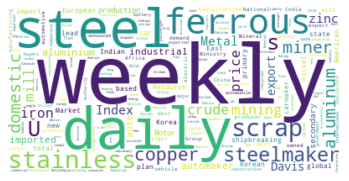

In [20]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
#Importing Dataset
df = pd.read_csv("articles.csv")
#Checking the Data
df.head()
#Checking for NaN values
df.isna().sum()
#Removing NaN Values
# df.dropna(inplace = True)
#Creating the text variable
text = " ".join(cat.split()[1] for cat in df.Content)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()